<a href="https://colab.research.google.com/github/Vinz1098/Discord_PudgyPenguins/blob/main/Step_4_Discord_Bertopic(all_phases).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Choose the Excel file from your local system to upload
uploaded = files.upload()

Saving Bertopic_Phase1.xlsx to Bertopic_Phase1.xlsx


In [ ]:
import pandas as pd

# Assuming the name of your uploaded excel file
file_name = 'Bertopic_Phase1.xlsx'

# Read the uploaded excel file
data = pd.read_excel(file_name)

# Display the contents of the excel file
print(data)


       Phase_Code       Date Announcement_Code  \
0              P1 2021-08-08             A1059   
1              P1 2021-08-08             A1059   
2              P1 2021-08-08             A1059   
3              P1 2021-08-08             A1059   
4              P1 2021-08-08             A1059   
...           ...        ...               ...   
213945         P1 2021-08-28             A1094   
213946         P1 2021-08-28             A1094   
213947         P1 2021-08-28             A1094   
213948         P1 2021-08-28             A1094   
213949         P1 2021-08-28             A1094   

                                                                                                              Content  
0                                                                                                       yeah remember  
1       surprised picked rarity rank httpsopenseaioaccountsBouncyOnion44ref0x2d2193f337a4e446c14caa5c90e7b5849203acd0  
2                                      

In [ ]:
!pip install bertopic

In [ ]:
from bertopic import BERTopic
import pandas as pd


# Load your DataFrame, replace 'your_data.csv' with the actual file path or URL
data = pd.read_excel('Bertopic_Phase1.xlsx')

# Assuming 'data' is your DataFrame
# Filter data based on 'Announcements_Code' condition
filtered_data = data[data['Announcement_Code'] == 'A1059']

filtered_data['Content'] = filtered_data['Content'].astype(str)

# Initialize BERTopic model with desired parameters
model = BERTopic(top_n_words=10, nr_topics=40, n_gram_range=(1, 1))

# Fit the model on the filtered 'Content' column
topics, _ = model.fit_transform(filtered_data['Content'])

# Add the BERTopic results to the filtered DataFrame
filtered_data['topic'] = topics

# Display the DataFrame with BERTopic results
print(filtered_data)


     Phase_Code       Date Announcement_Code  \
0            P1 2021-08-08             A1059   
1            P1 2021-08-08             A1059   
2            P1 2021-08-08             A1059   
3            P1 2021-08-08             A1059   
4            P1 2021-08-08             A1059   
...         ...        ...               ...   
5584         P1 2021-08-08             A1059   
5585         P1 2021-08-08             A1059   
5586         P1 2021-08-08             A1059   
5587         P1 2021-08-08             A1059   
5588         P1 2021-08-08             A1059   

                                                                                                            Content  \
0                                                                                                     yeah remember   
1     surprised picked rarity rank httpsopenseaioaccountsBouncyOnion44ref0x2d2193f337a4e446c14caa5c90e7b5849203acd0   
2                                                    arent looking

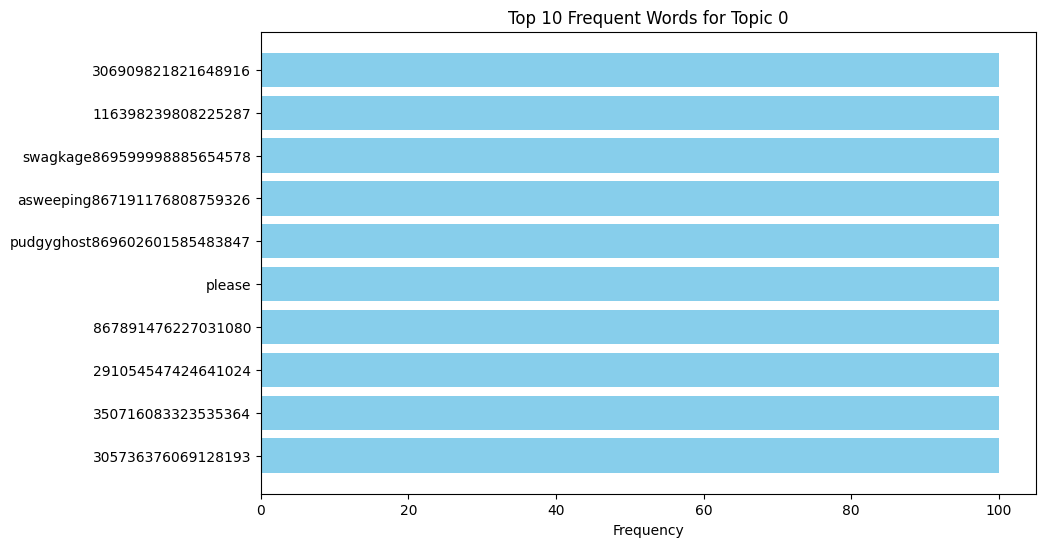

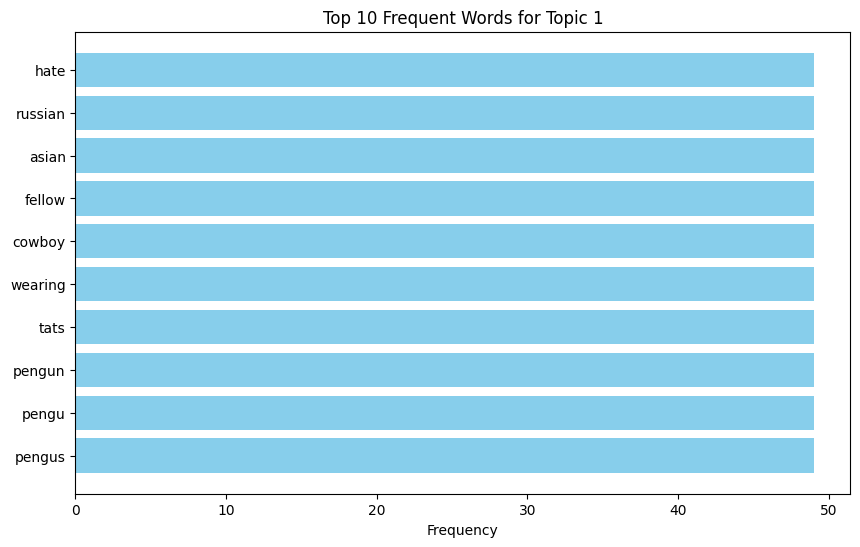

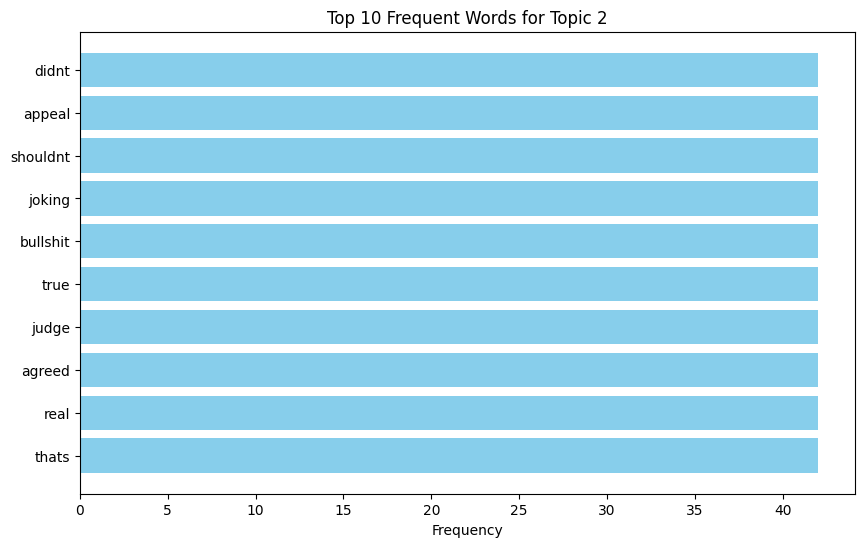

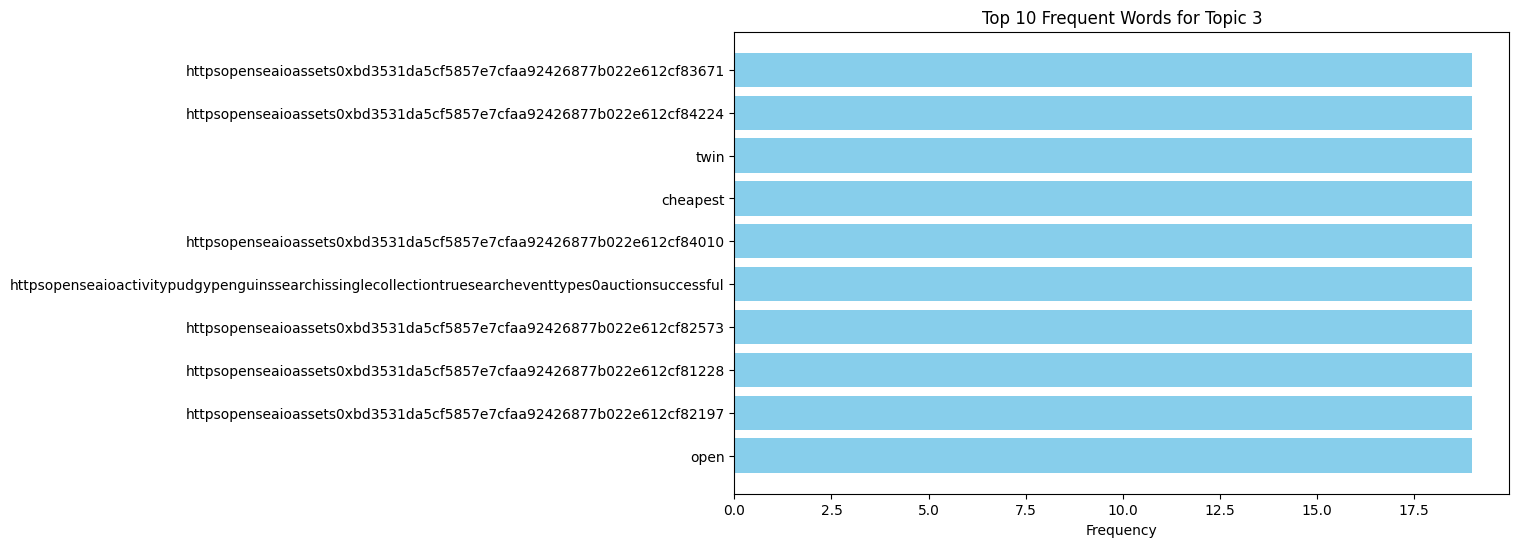

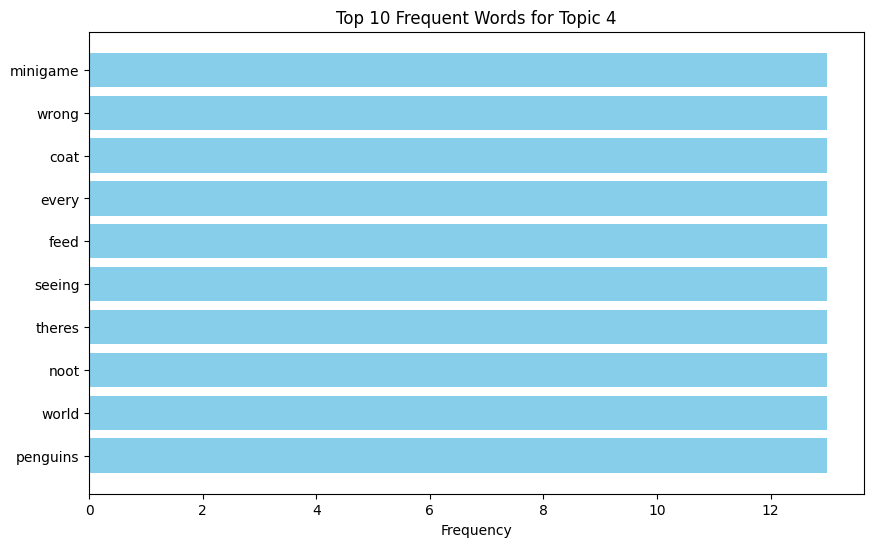

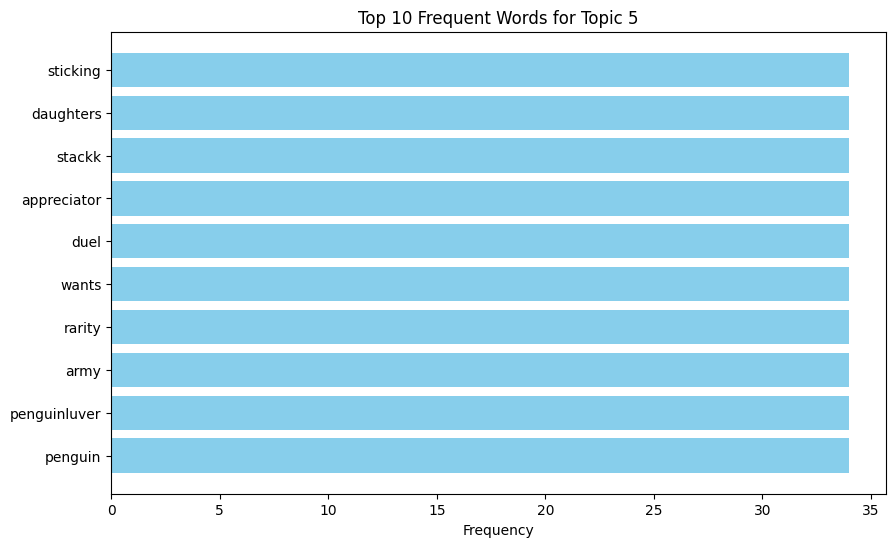

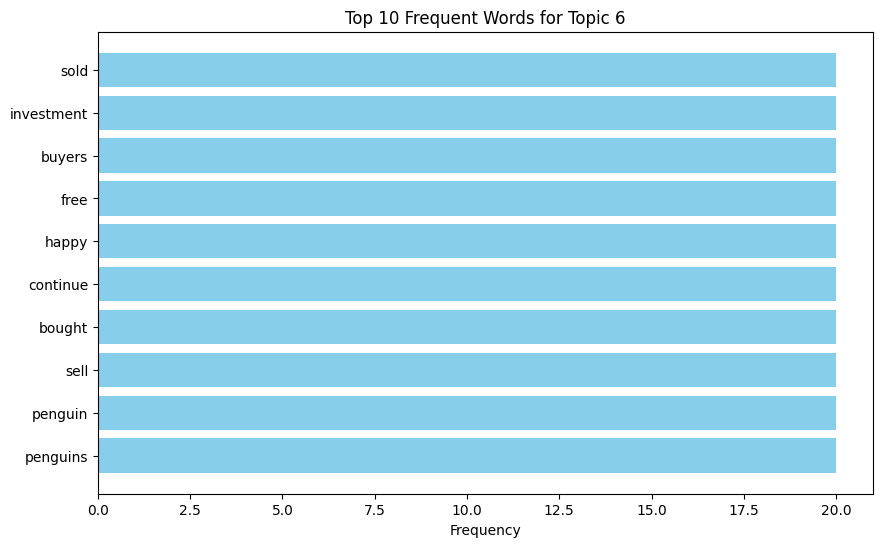

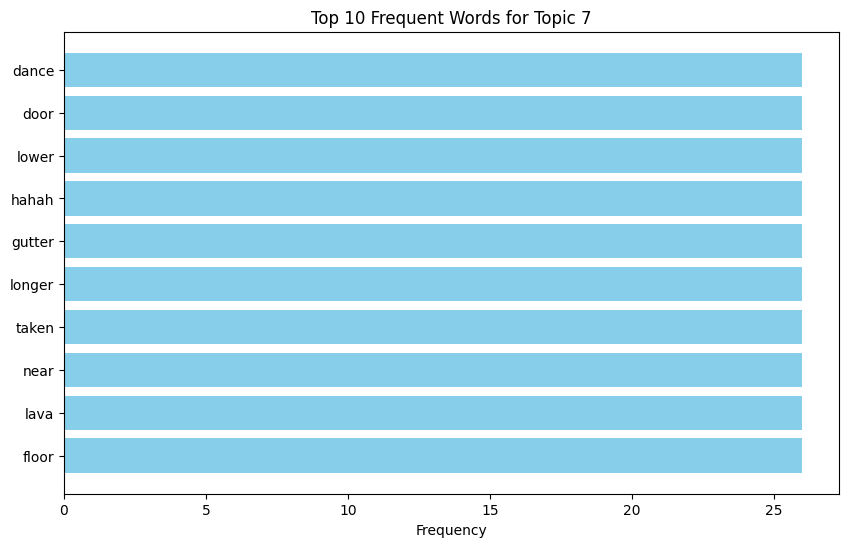

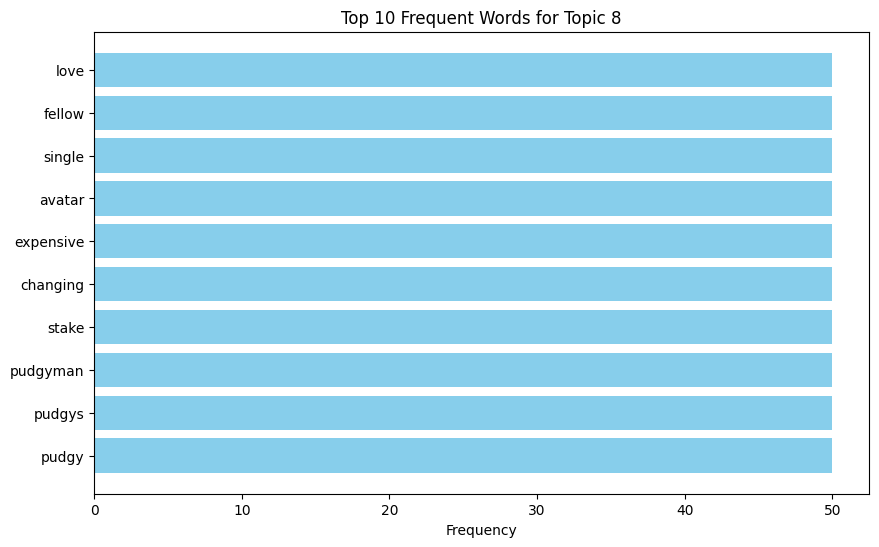

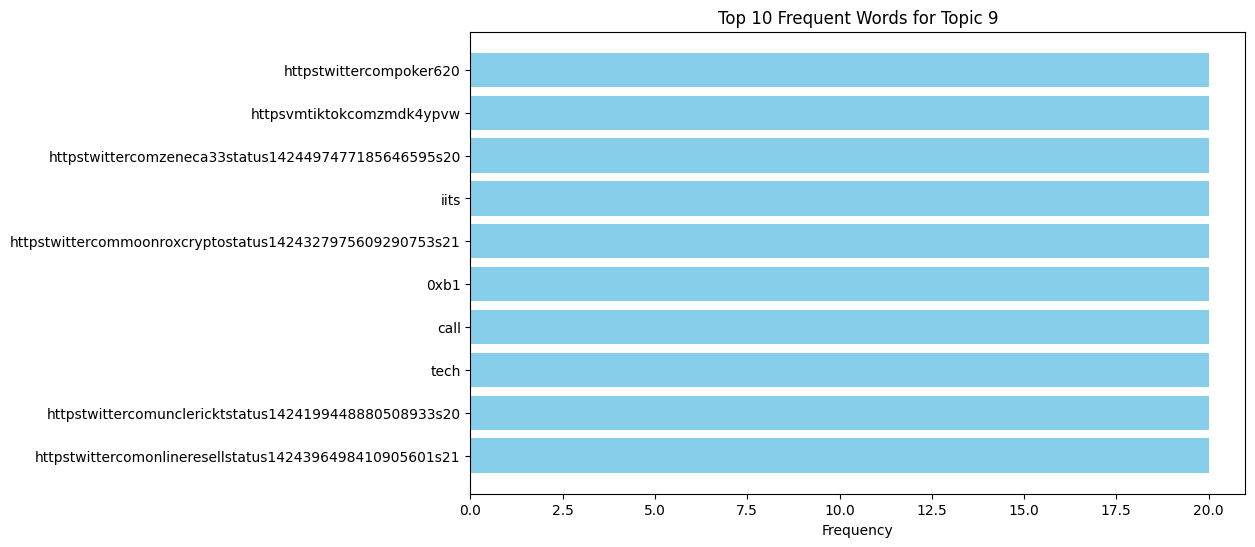

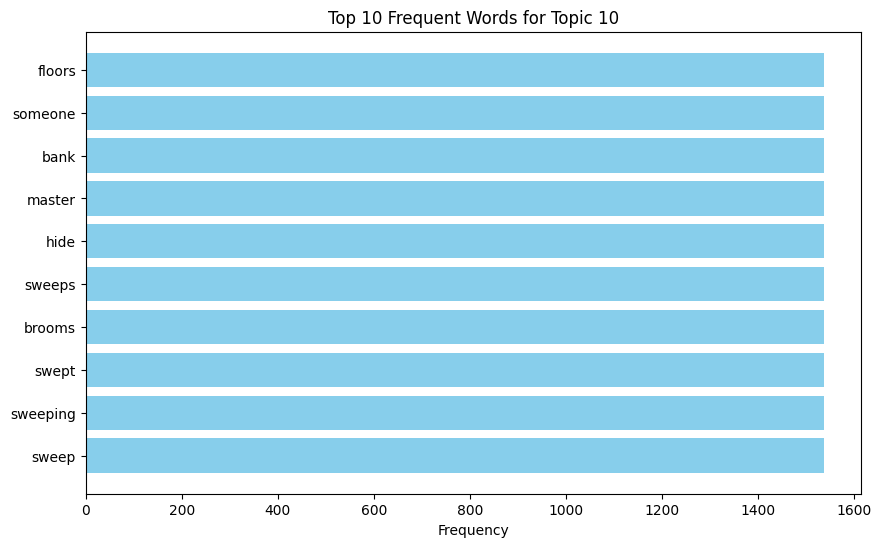

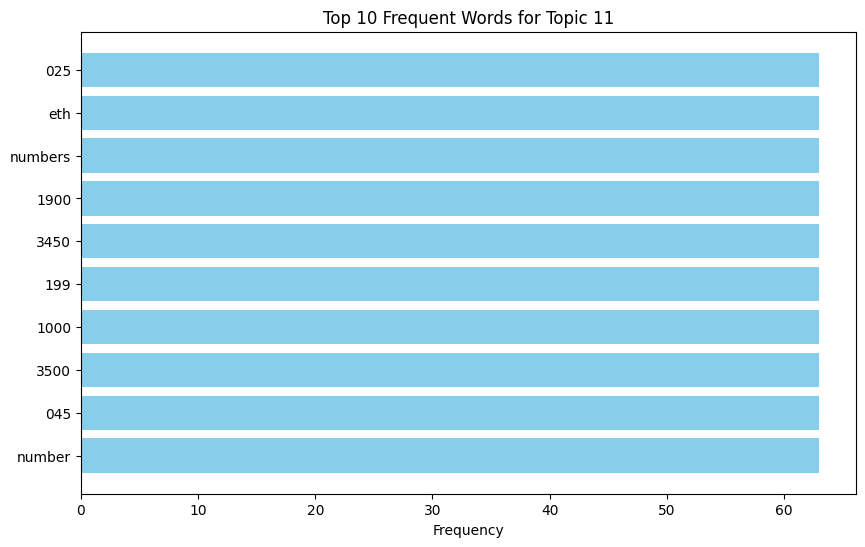

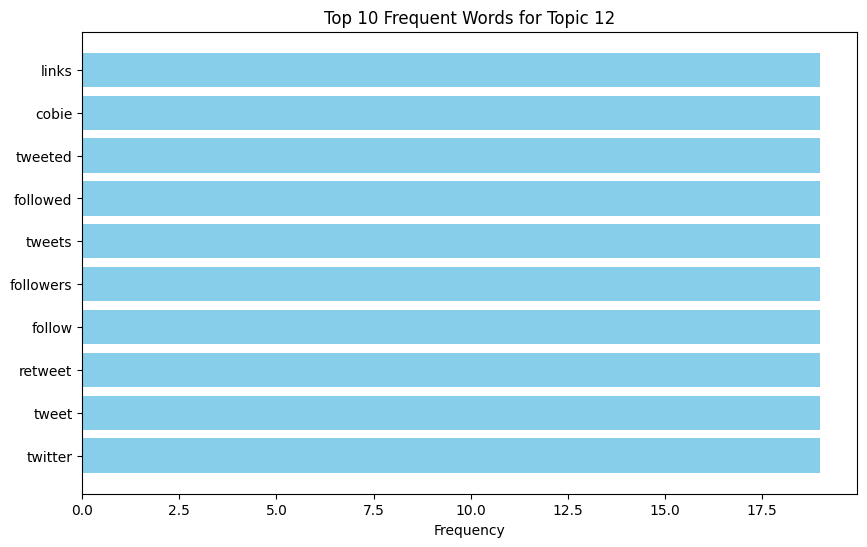

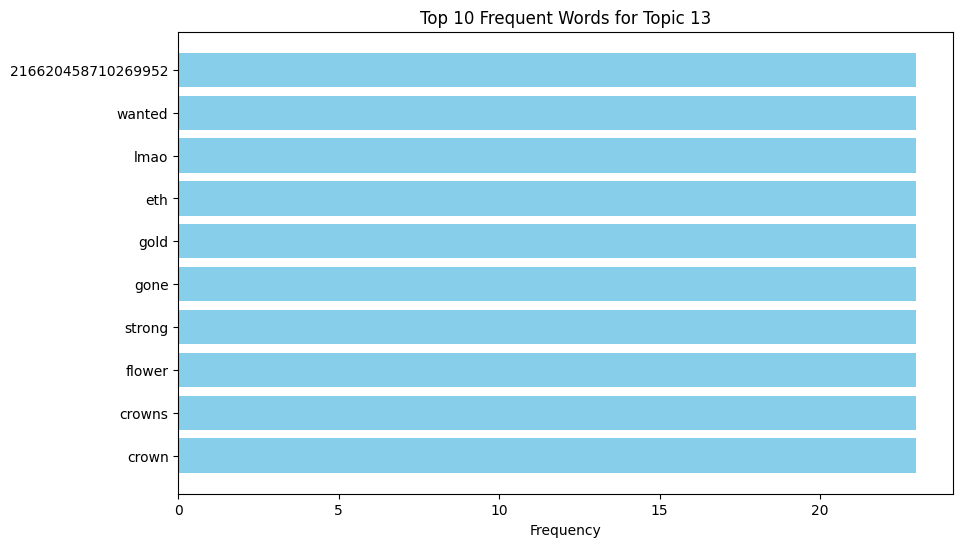

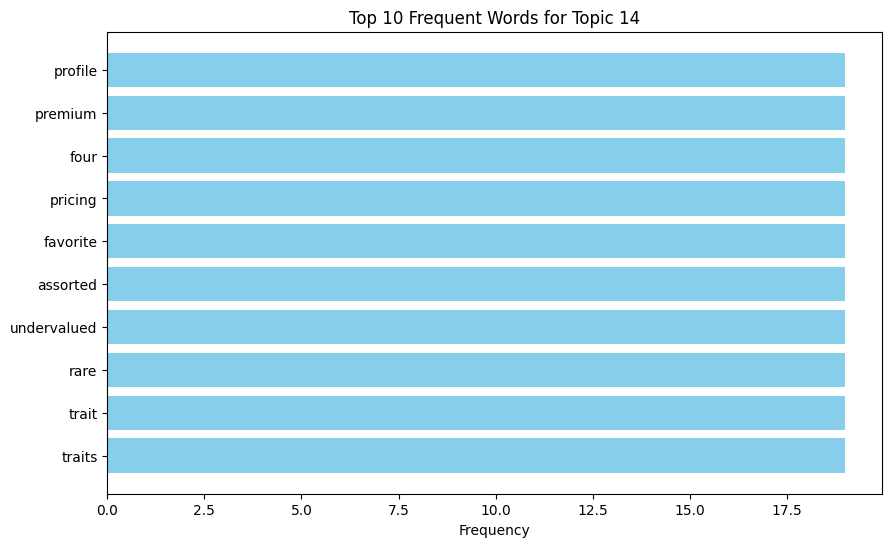

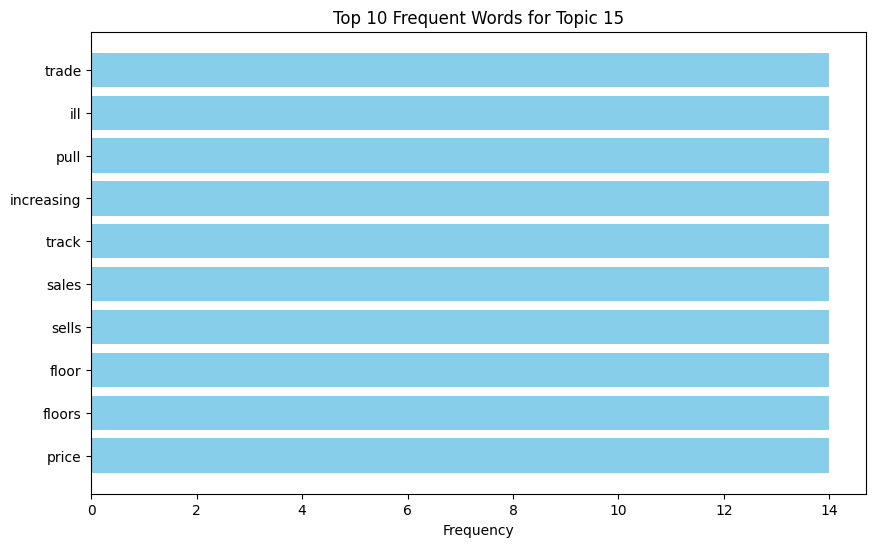

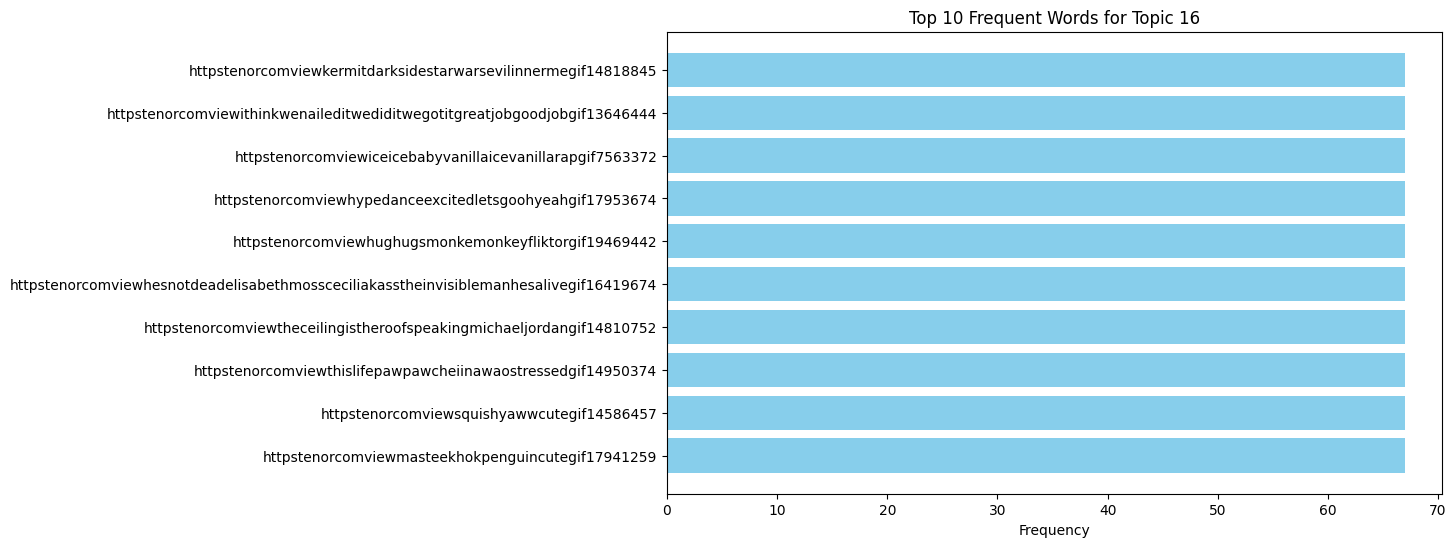

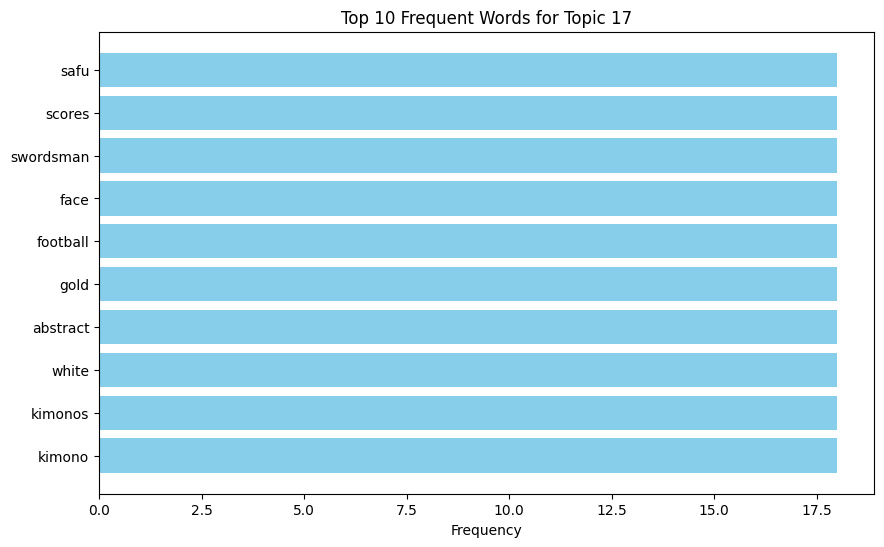

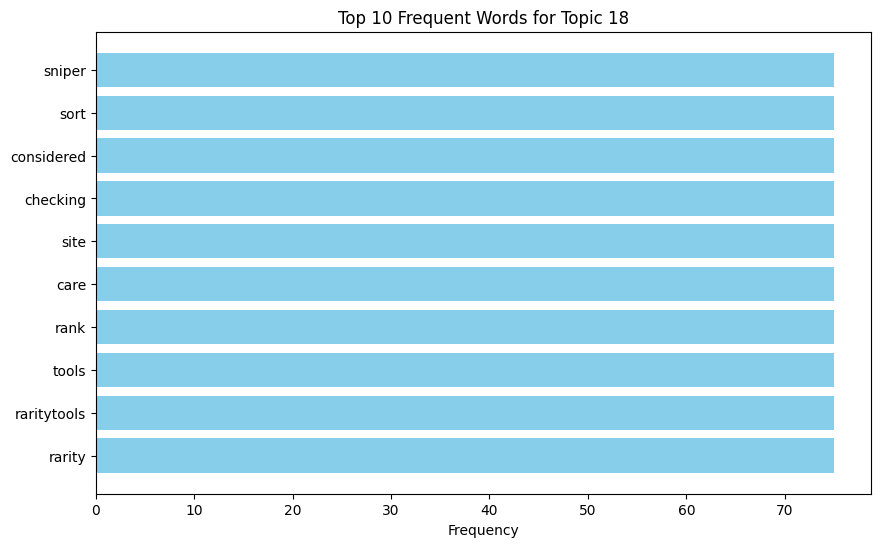

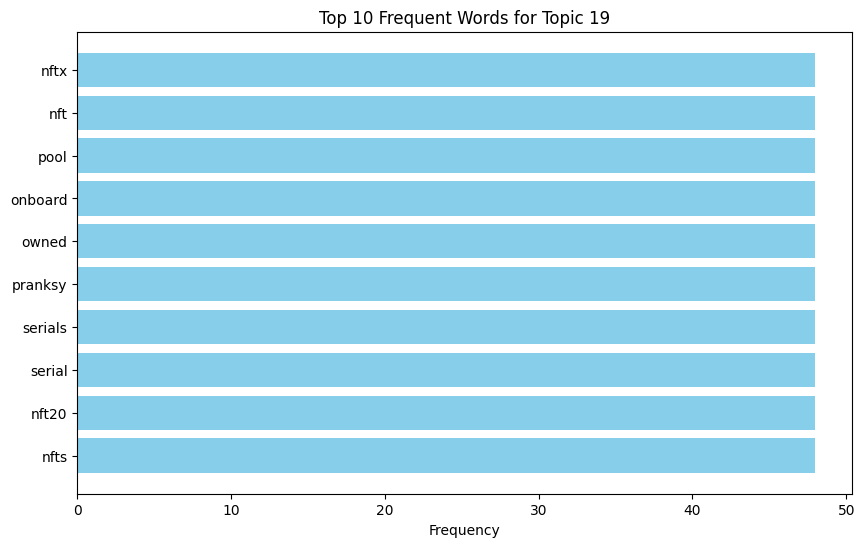

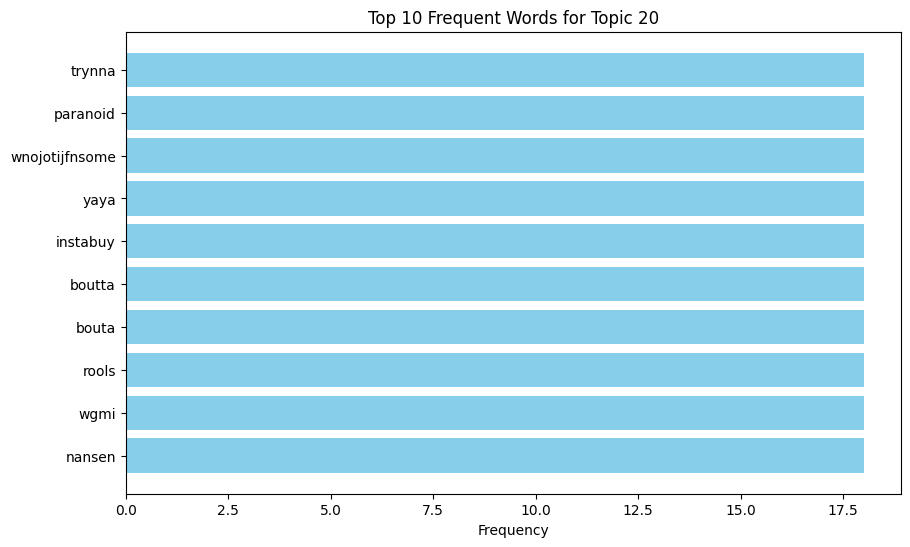

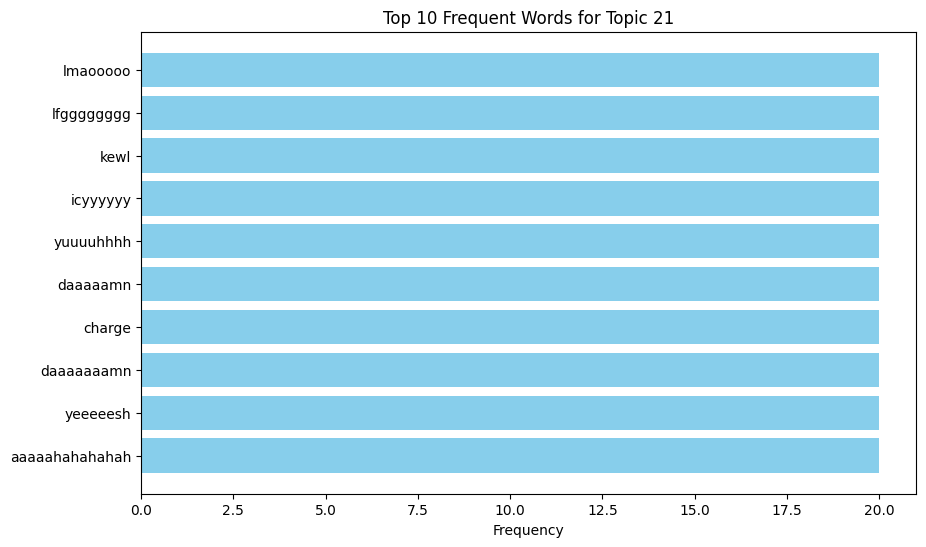

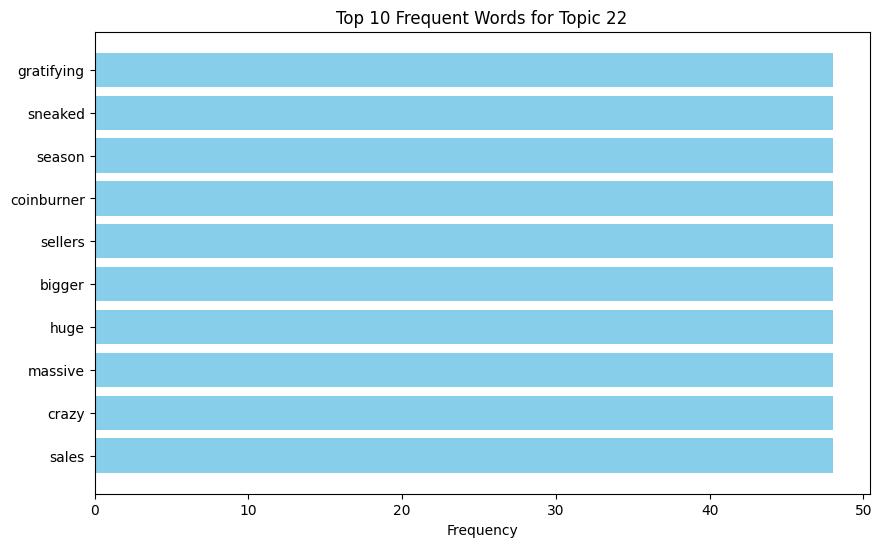

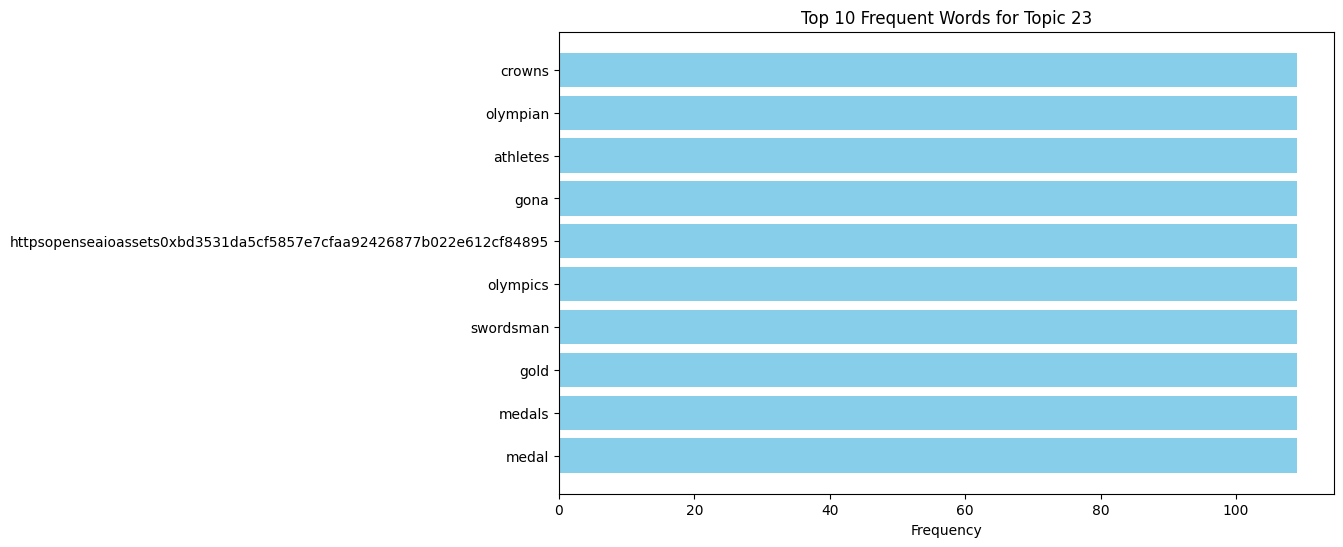

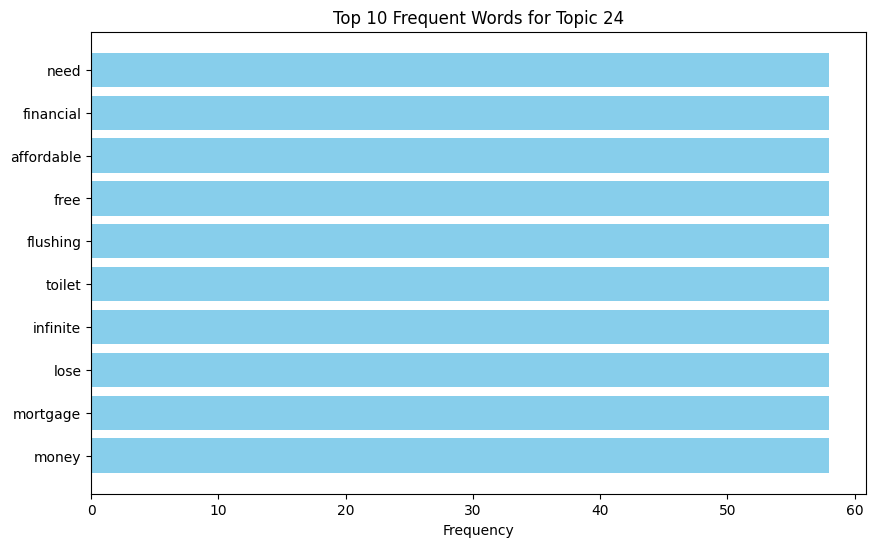

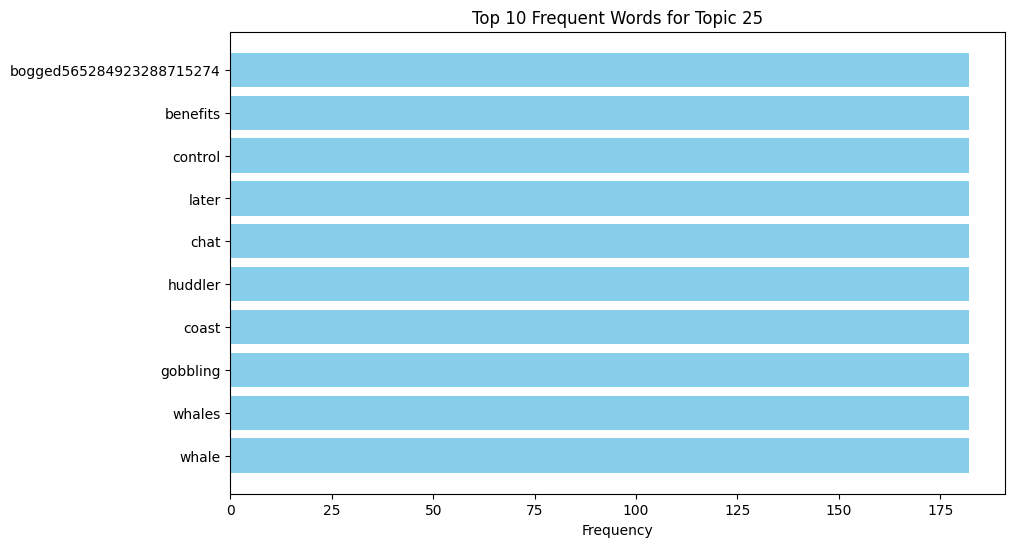

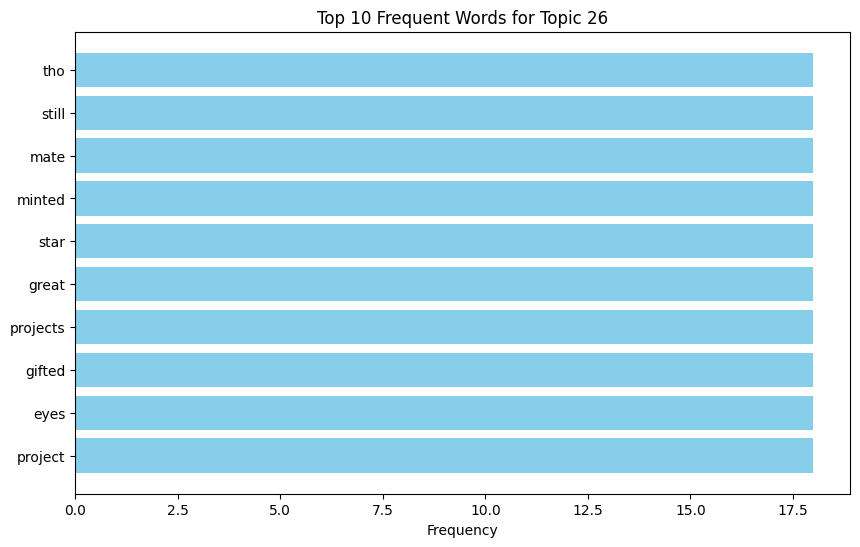

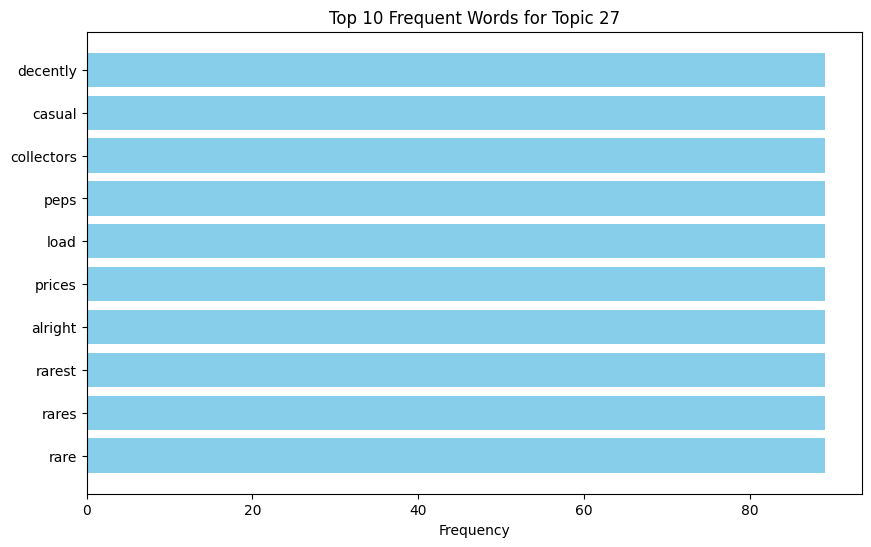

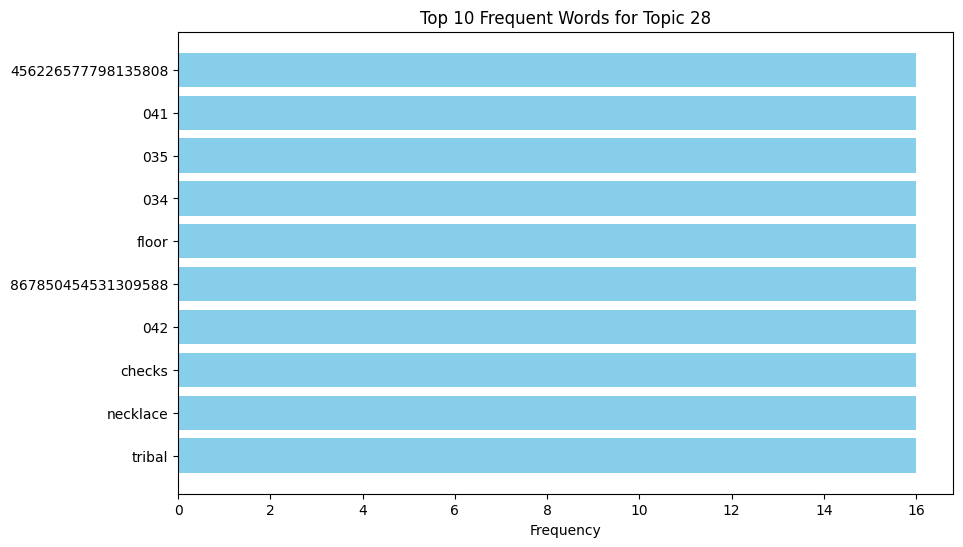

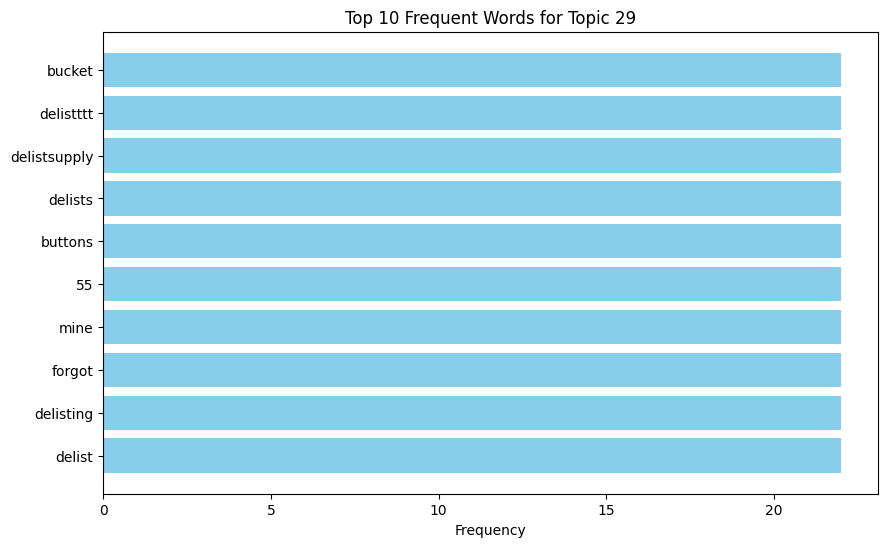

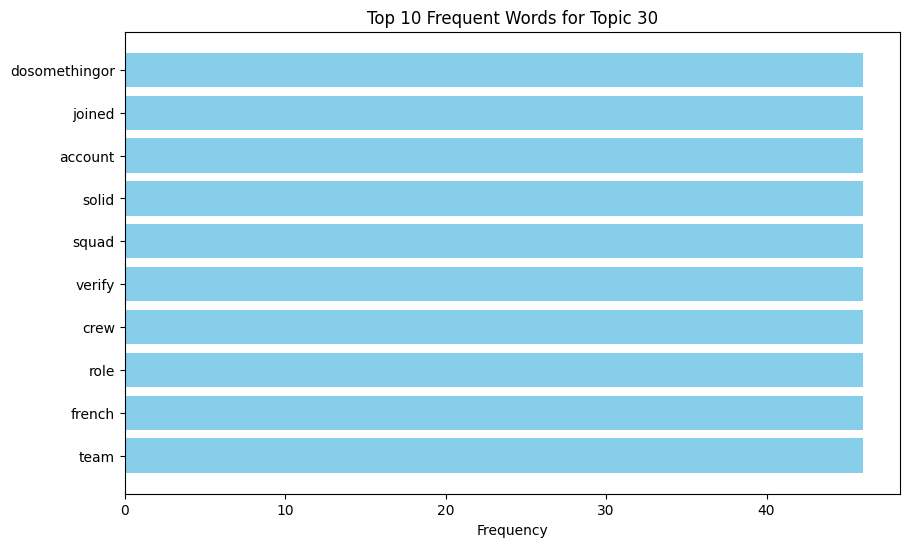

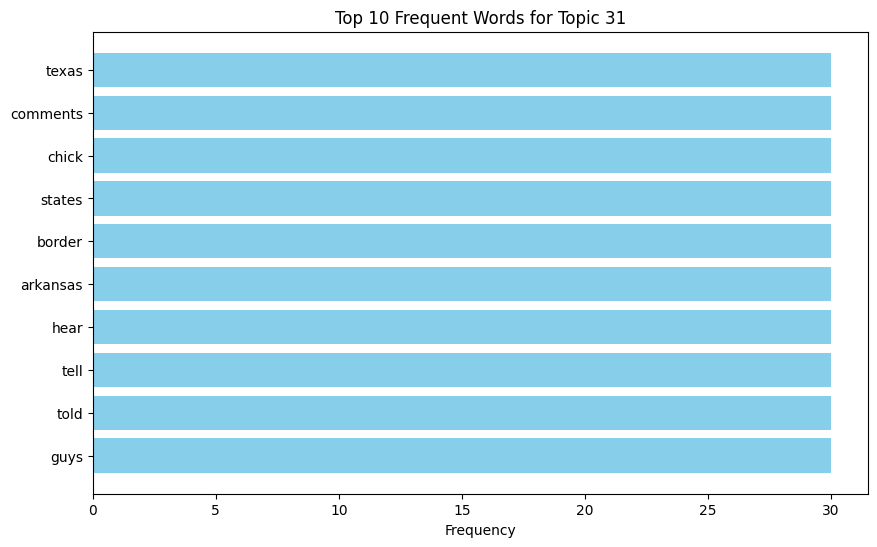

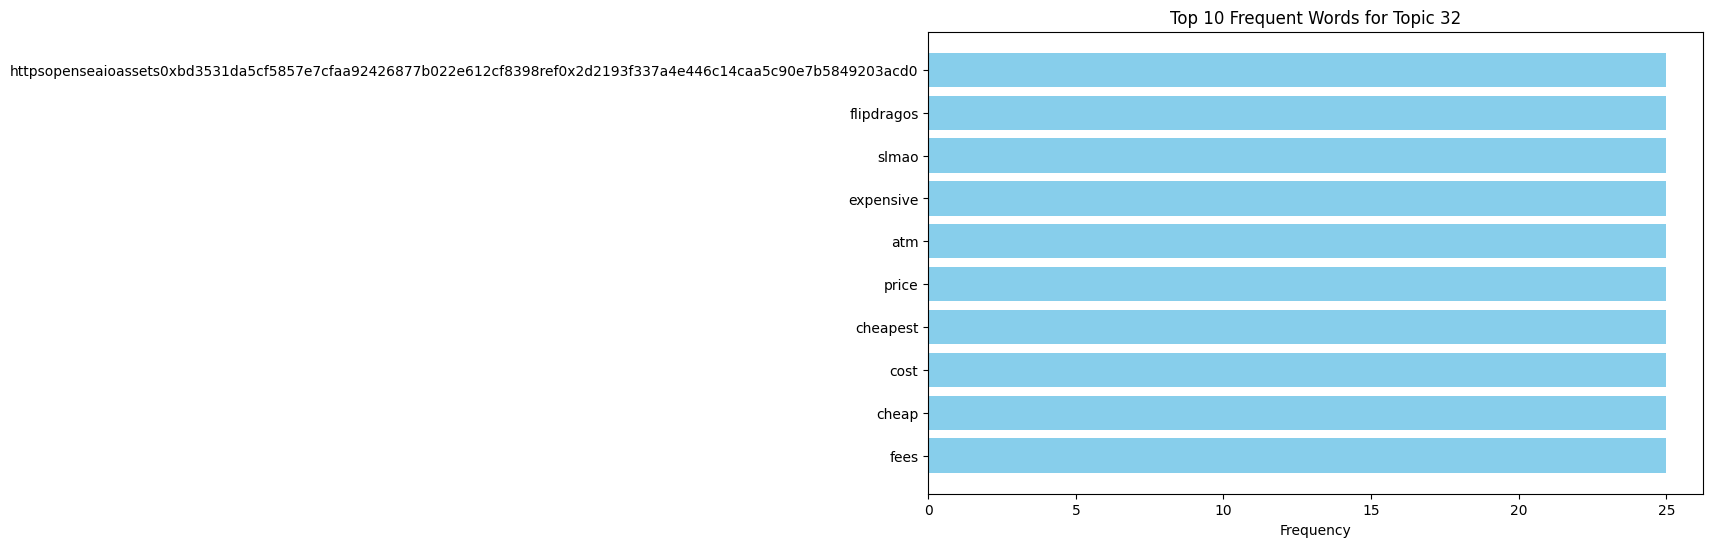

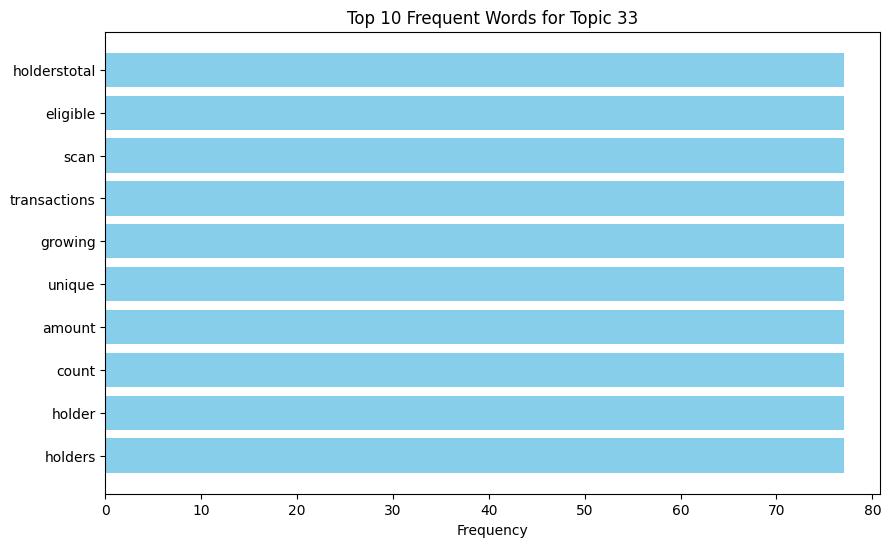

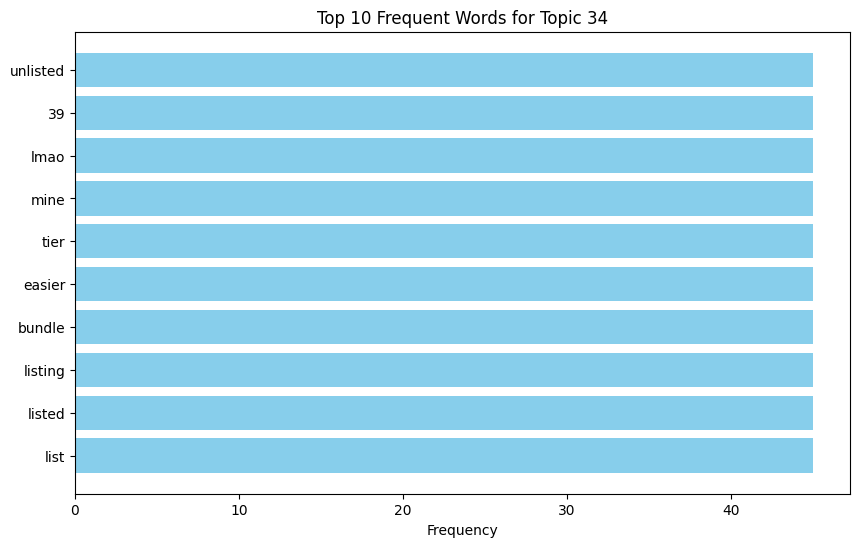

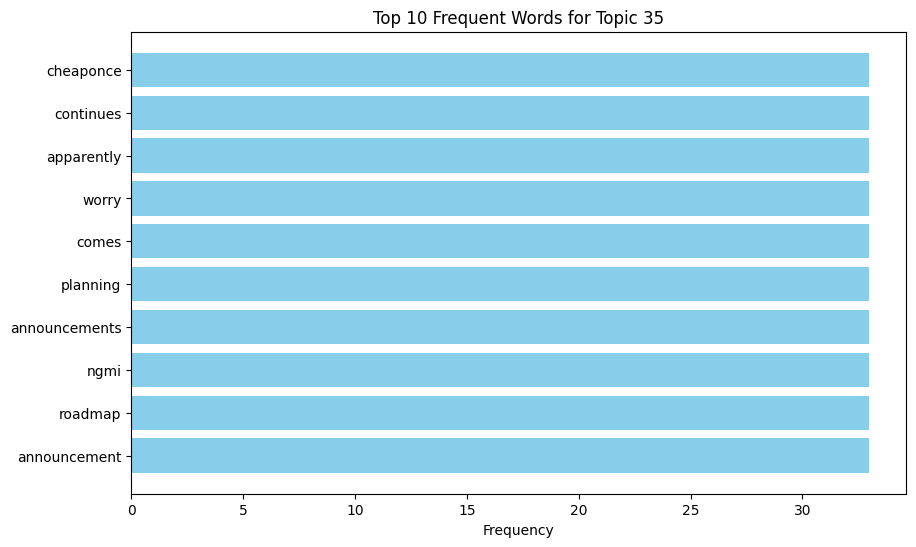

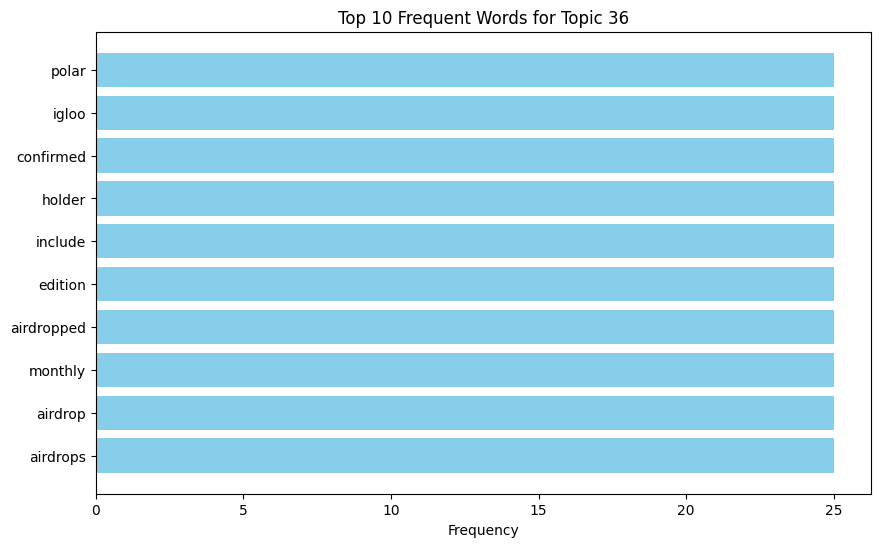

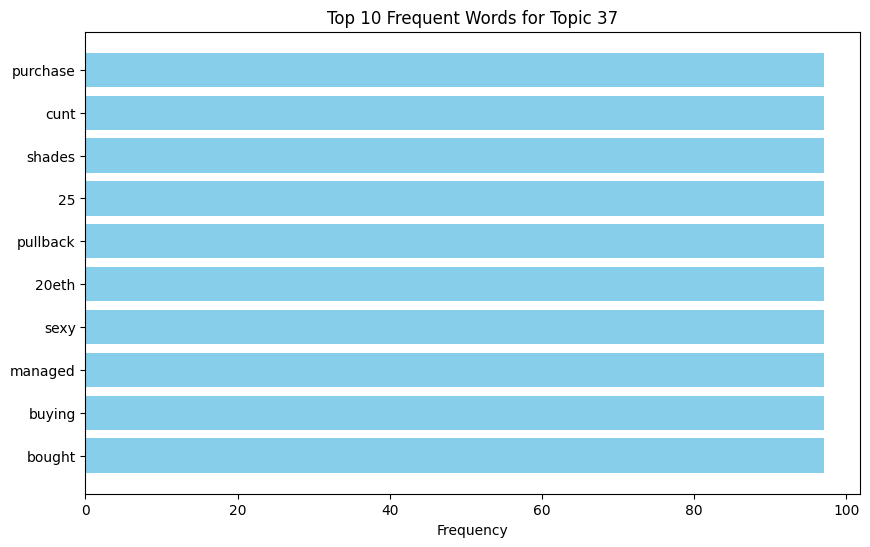

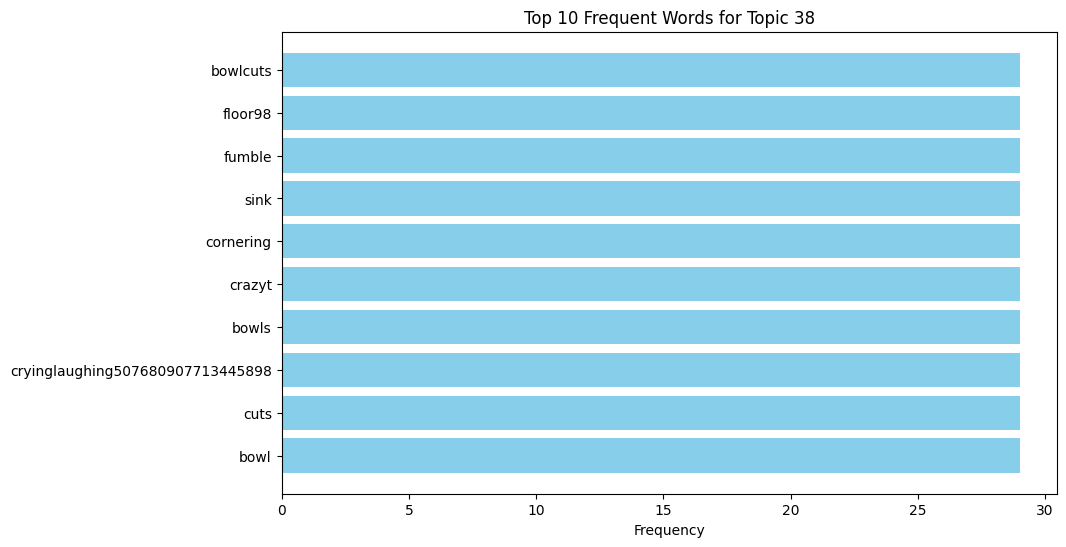

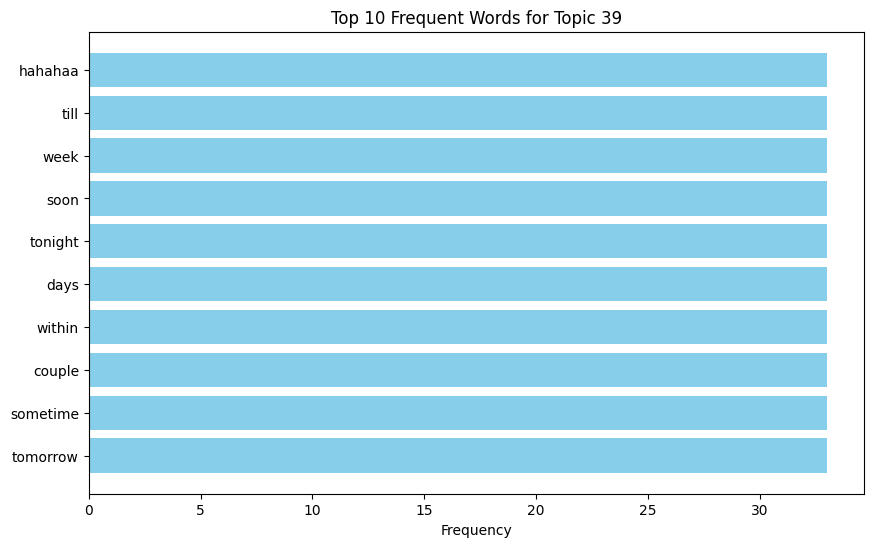

In [ ]:
import pandas as pd
from bertopic import BERTopic
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Filter data based on 'Announcements_Code' condition
filtered_data = data[data['Announcement_Code'] == 'A1059']

filtered_data['Content'] = filtered_data['Content'].astype(str)

# Assuming 'column_name' is the name of the column containing text data in 'filtered_data'
column_name = 'Content'  # Replace with the actual column name

# Extract text data
documents = filtered_data['Content'].tolist()

# Initialize BERTopic model with raw data
model = BERTopic()
topics, _ = model.fit_transform(documents)

# Retrieve and visualize top 10 words for each topic

top_n_topics = 40  # Number of topics to visualize
top_n_words = 10  # Number of top words to display for each topic

topic_freq = model.get_topic_freq()

for topic_id in range(top_n_topics):
    # Check if the topic_id exists in the topic_freq index and if the type is not an integer
    if topic_id in topic_freq.index and not isinstance(topic_freq.loc[topic_id], int):
        top_words = model.get_topic(topic_id)

        # Check if top_words is not empty and is a list of tuples
        if top_words and all(isinstance(t, tuple) for t in top_words):
            words, _ = zip(*top_words)
            words = list(words)[:top_n_words][::-1]

            frequencies = topic_freq.loc[topic_id].head(top_n_words)['Count']

            if isinstance(frequencies, pd.Series):
                frequencies = frequencies.values[::-1]  # Convert to numpy array if it's a Series

            plt.figure(figsize=(10, 6))
            plt.barh(words, frequencies, color='skyblue')
            plt.xlabel('Frequency')
            plt.title(f'Top {top_n_words} Frequent Words for Topic {topic_id}')
            plt.gca().invert_yaxis()
            plt.show()


In [ ]:
import pandas as pd
# Assuming 'model' and 'topic_freq' are already defined from your previous code
# Assuming 'top_n_topics', 'top_n_words', and 'filtered_data' are defined

# Initialize BERTopic model with desired parameters
model = BERTopic(top_n_words=10, nr_topics=40, n_gram_range=(1, 1))

# Fit the model on the 'Content' column of the filtered DataFrame
topics, _ = model.fit_transform(filtered_data['Content'].tolist())

# Add the BERTopic results to the filtered DataFrame
filtered_data['topic'] = topics

# Adjust the display settings to show more characters
pd.set_option('display.max_colwidth', None)

# Assuming 'model' and 'topic_freq' are already defined from your previous code
# Assuming 'top_n_topics', 'top_n_words', and 'filtered_data' are defined

# Initialize an empty list to store top words and content data
top_words_data = []

for topic_id in range(top_n_topics):
    if topic_id in topic_freq.index and not isinstance(topic_freq.loc[topic_id], int):
        top_words = model.get_topic(topic_id)

        # Ensure that top_words is a list of tuples before iterating
        if isinstance(top_words, list) and all(isinstance(item, tuple) for item in top_words):
            words_list = [word for word, _ in top_words]
            top_words_data.append((f"Topic {topic_id}", ", ".join(words_list[:top_n_words])))

            # Get the top 5 content subsequent to the top words for the current topic
            content_subsequent = filtered_data[filtered_data['topic'] == topic_id]['Content'].head(5).tolist()
            top_words_data[-1] += (", ".join(content_subsequent),)  # Append the content to the tuple
        else:
            top_words_data.append((f"Topic {topic_id}", "", ""))  # Add an empty string for unexpected data types

# Create a DataFrame with "Index Topic", "10 Freq Words", and "Top 5 Content" columns
top_words_df = pd.DataFrame(top_words_data, columns=["Index Topic", "10 Freq Words", "Top 5 Content"])

# Print the DataFrame
print(top_words_df)



   Index Topic  \
0      Topic 0   
1      Topic 1   
2      Topic 2   
3      Topic 3   
4      Topic 4   
5      Topic 5   
6      Topic 6   
7      Topic 7   
8      Topic 8   
9      Topic 9   
10    Topic 10   
11    Topic 11   
12    Topic 12   
13    Topic 13   
14    Topic 14   
15    Topic 15   
16    Topic 16   
17    Topic 17   
18    Topic 18   
19    Topic 19   
20    Topic 20   
21    Topic 21   
22    Topic 22   
23    Topic 23   
24    Topic 24   
25    Topic 25   
26    Topic 26   
27    Topic 27   
28    Topic 28   
29    Topic 29   
30    Topic 30   
31    Topic 31   
32    Topic 32   
33    Topic 33   
34    Topic 34   
35    Topic 35   
36    Topic 36   
37    Topic 37   
38    Topic 38   
39    Topic 39   

                                                                                                                                                                          10 Freq Words  \
0                                                                         

In [ ]:
import pandas as pd
import os
import zipfile

# Function to save top words and content for a specific announcement code
def save_top_words_and_content(announcement_code, top_n_topics, top_n_words):
    # Assuming 'model' and 'topic_freq' are already defined from your previous code
    # Assuming 'filtered_data' is defined and contains the 'Announcements_Code' column

    # Filter data based on 'Announcements_Code' condition
    filtered_data = data[data['Announcement_Code'] == announcement_code]

    # Initialize BERTopic model with desired parameters
    model = BERTopic(top_n_words=10, nr_topics=40, n_gram_range=(1, 1))

    filtered_data['Content'] = filtered_data['Content'].astype(str)

    # Fit the model on the 'Content' column of the filtered DataFrame
    topics, _ = model.fit_transform(filtered_data['Content'].tolist())

    # Add the BERTopic results to the filtered DataFrame
    filtered_data['topic'] = topics

    # Initialize an empty list to store top words and content data
    top_words_data = []

    for topic_id in range(top_n_topics):
        if topic_id in topic_freq.index and not isinstance(topic_freq.loc[topic_id], int):
            top_words = model.get_topic(topic_id)

            # Ensure that top_words is a list of tuples before iterating
            if isinstance(top_words, list) and all(isinstance(item, tuple) for item in top_words):
                words_list = [word for word, _ in top_words]
                top_words_data.append((f"Topic {topic_id}", ", ".join(words_list[:top_n_words])))

                # Get the top 5 content subsequent to the top words for the current topic
                content_subsequent = filtered_data[filtered_data['topic'] == topic_id]['Content'].head(5).tolist()
                top_words_data[-1] += (", ".join(content_subsequent),)  # Append the content to the tuple
            else:
                top_words_data.append((f"Topic {topic_id}", "", ""))  # Add an empty string for unexpected data types

    # Create a DataFrame with "Index Topic", "10 Freq Words", and "Top 5 Content" columns
    top_words_df = pd.DataFrame(top_words_data, columns=["Index Topic", "10 Freq Words", "Top 5 Content"])

    # Save the DataFrame to a CSV file
    csv_file_path = f'{announcement_code}_top_words_results.csv'
    top_words_df.to_csv(csv_file_path, index=False)

    # Display the CSV file path
    print(f'Top 10 words data saved to: {csv_file_path}')

    return csv_file_path

# Assuming 'data' is your DataFrame containing 'Announcements_Code'
announcement_codes = data['Announcement_Code'].unique()

# Create a zip folder to store all CSV files
zip_folder_path = 'announcement_codes_data.zip'
with zipfile.ZipFile(zip_folder_path, 'w') as zip_folder:
    for code in announcement_codes:
        csv_file_path = save_top_words_and_content(code, top_n_topics, top_n_words)
        zip_folder.write(csv_file_path, os.path.basename(csv_file_path))

# Display the zip folder path
print(f'All data saved to: {zip_folder_path}')


Top 10 words data saved to: A1059_top_words_results.csv
Top 10 words data saved to: A1072_top_words_results.csv
Top 10 words data saved to: A1073_top_words_results.csv
Top 10 words data saved to: A1074_top_words_results.csv
Top 10 words data saved to: A1075_top_words_results.csv
Top 10 words data saved to: A1076_top_words_results.csv
Top 10 words data saved to: A1077_top_words_results.csv
Top 10 words data saved to: A1078_top_words_results.csv
Top 10 words data saved to: A1079_top_words_results.csv
Top 10 words data saved to: A1080_top_words_results.csv
Top 10 words data saved to: A1081_top_words_results.csv
Top 10 words data saved to: A1082_top_words_results.csv
Top 10 words data saved to: A1083_top_words_results.csv
Top 10 words data saved to: A1084_top_words_results.csv
Top 10 words data saved to: A1085_top_words_results.csv
Top 10 words data saved to: A1086_top_words_results.csv
Top 10 words data saved to: A1087_top_words_results.csv
Top 10 words data saved to: A1088_top_words_resu

In [ ]:
from google.colab import files

# Choose the Excel file from your local system to upload
uploaded = files.upload()

Saving Bertopic_Phase2.xlsx to Bertopic_Phase2.xlsx


In [ ]:
import pandas as pd

# Assuming the name of your uploaded excel file
file_name = 'Bertopic_Phase2.xlsx'

# Read the uploaded excel file
data = pd.read_excel(file_name)

# Display the contents of the excel file
print(data)


       Phase_Code       Date Announcement_Code  \
0              P2 2021-09-12             A2008   
1              P2 2021-09-12             A2008   
2              P2 2021-09-12             A2008   
3              P2 2021-09-12             A2008   
4              P2 2021-09-12             A2008   
...           ...        ...               ...   
327015         P2 2021-12-27             A2107   
327016         P2 2021-12-27             A2107   
327017         P2 2021-12-27             A2107   
327018         P2 2021-12-27             A2107   
327019         P2 2021-12-27             A2107   

                                                  Content  
0                           Coinbase mentioned huddle yet  
1                                     done cringe posting  
2            Look sale floor seems theyre good scrambling  
3       nice tweet kids coinbase logo background fair ...  
4                                        Wheres code need  
...                                    

In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 16.1 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.5 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039276 sha256=7e939a8e71dd00037c8abcff40f86780c4c3cd72247030478f792028c7ab80d3
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-

In [ ]:
from bertopic import BERTopic
import pandas as pd


# Load your DataFrame, replace 'your_data.csv' with the actual file path or URL
data = pd.read_excel('Bertopic_Phase2.xlsx')

# Assuming 'data' is your DataFrame
# Filter data based on 'Announcements_Code' condition
filtered_data = data[data['Announcement_Code'] == 'A2008']

filtered_data['Content'] = filtered_data['Content'].astype(str)

# Initialize BERTopic model with desired parameters
model = BERTopic(top_n_words=10, nr_topics=30, n_gram_range=(1, 1))

# Fit the model on the filtered 'Content' column
topics, _ = model.fit_transform(filtered_data['Content'])

# Add the BERTopic results to the filtered DataFrame
filtered_data['topic'] = topics

# Display the DataFrame with BERTopic results
print(filtered_data)


     Phase_Code       Date Announcement_Code  \
0            P2 2021-09-12             A2008   
1            P2 2021-09-12             A2008   
2            P2 2021-09-12             A2008   
3            P2 2021-09-12             A2008   
4            P2 2021-09-12             A2008   
...         ...        ...               ...   
1381         P2 2021-09-12             A2008   
1382         P2 2021-09-12             A2008   
1383         P2 2021-09-12             A2008   
1384         P2 2021-09-12             A2008   
1385         P2 2021-09-12             A2008   

                                                Content  topic  
0                         Coinbase mentioned huddle yet      4  
1                                   done cringe posting     -1  
2          Look sale floor seems theyre good scrambling     -1  
3     nice tweet kids coinbase logo background fair ...     -1  
4                                      Wheres code need      4  
...                              

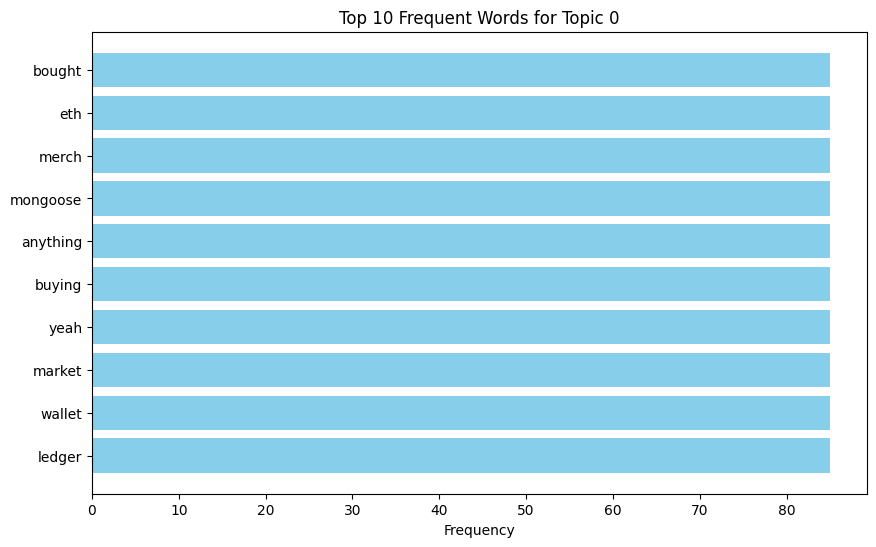

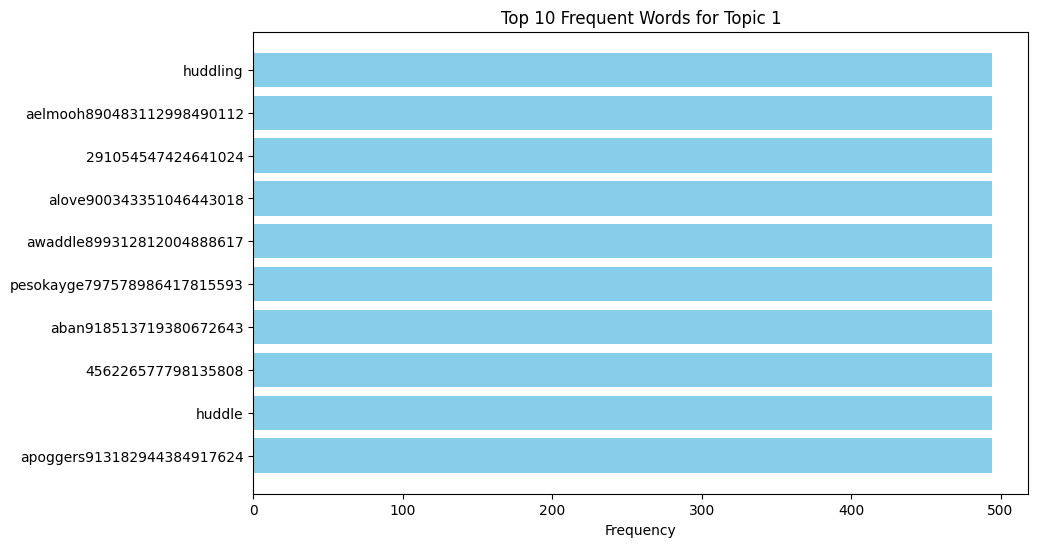

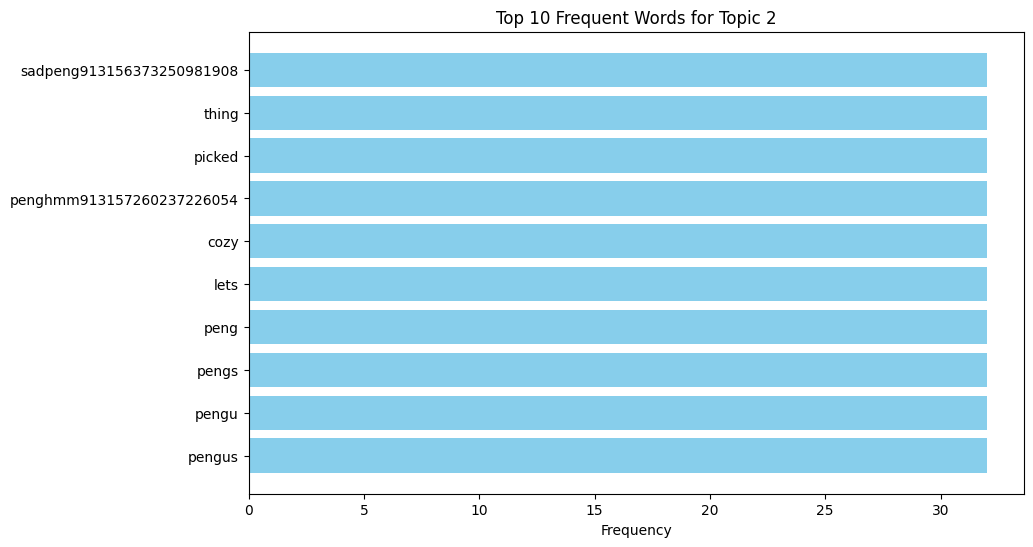

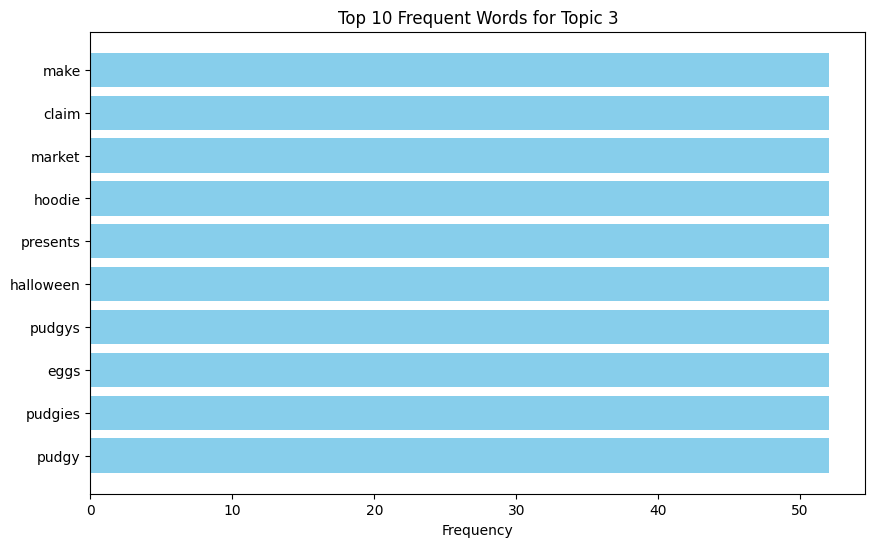

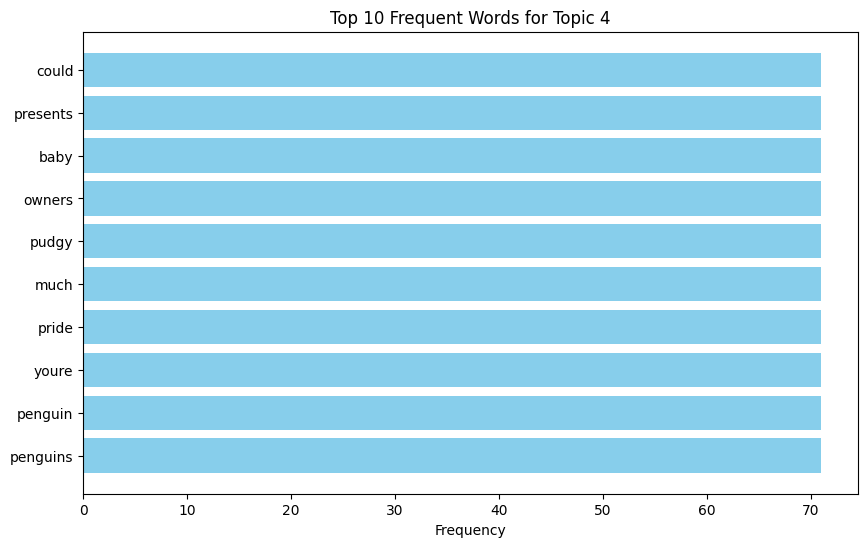

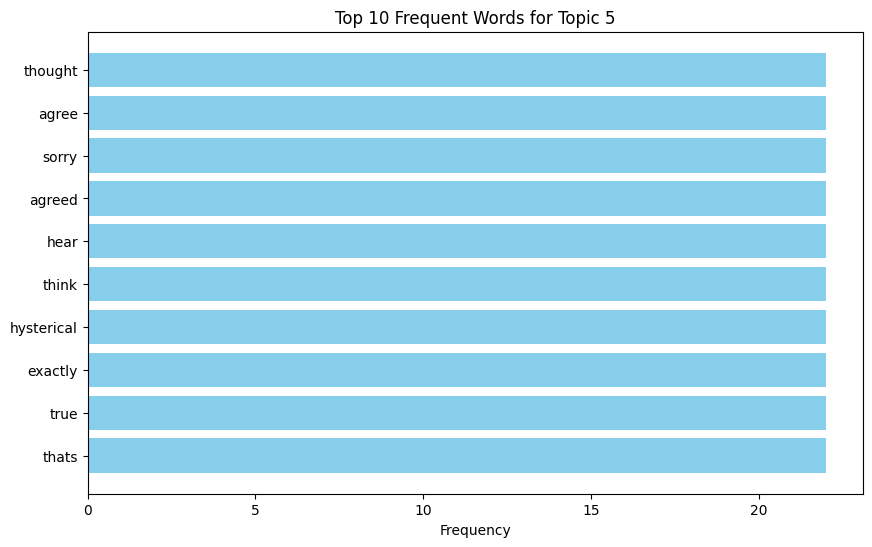

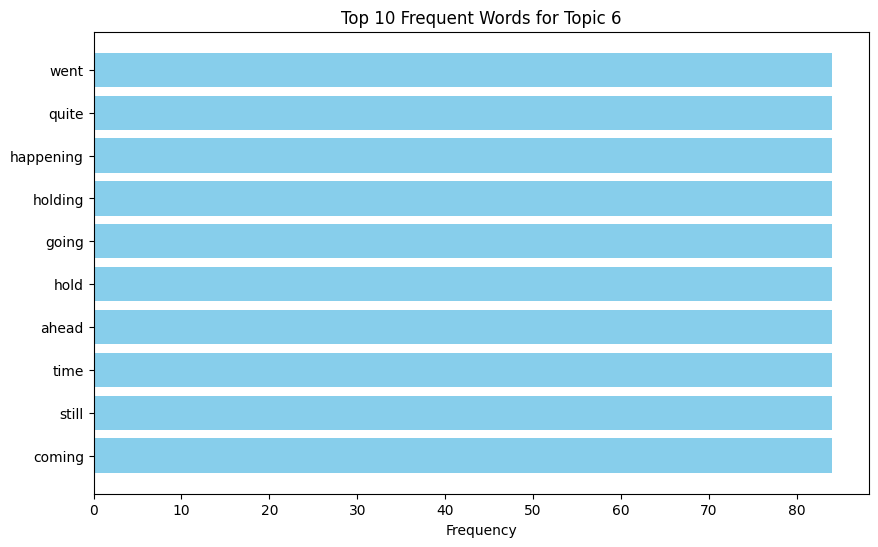

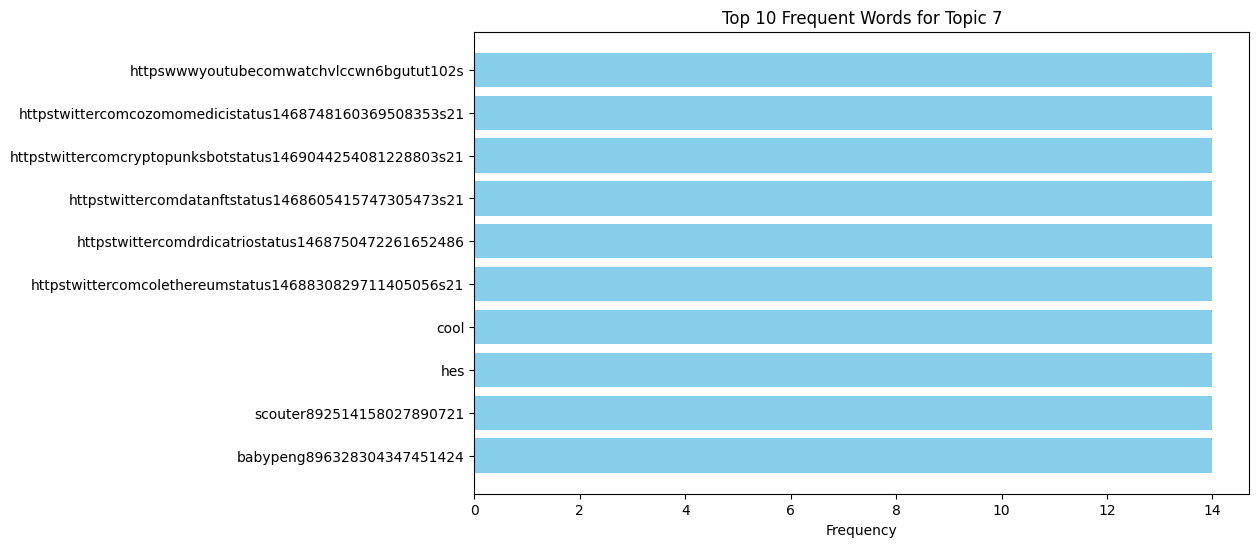

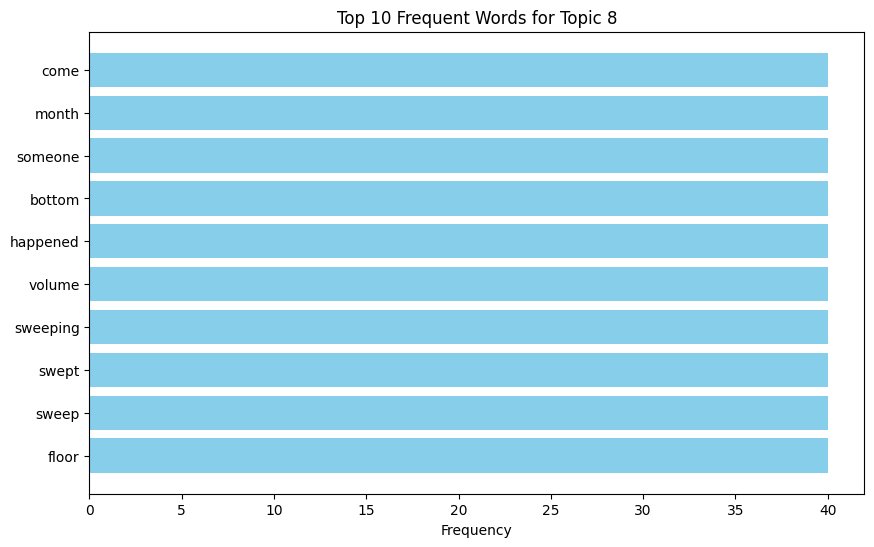

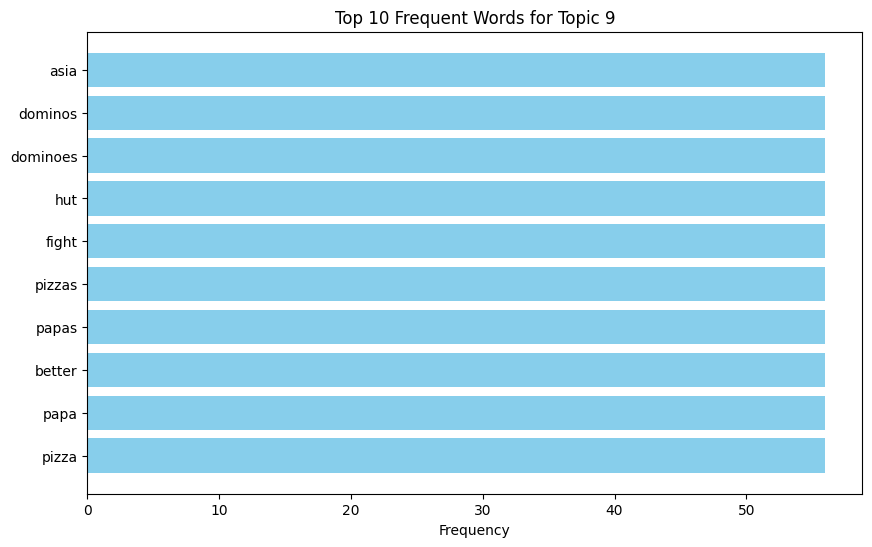

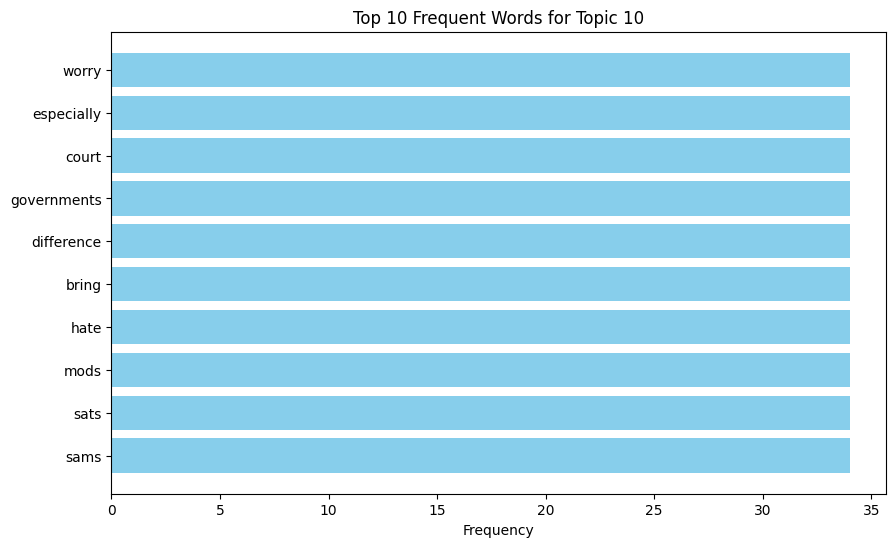

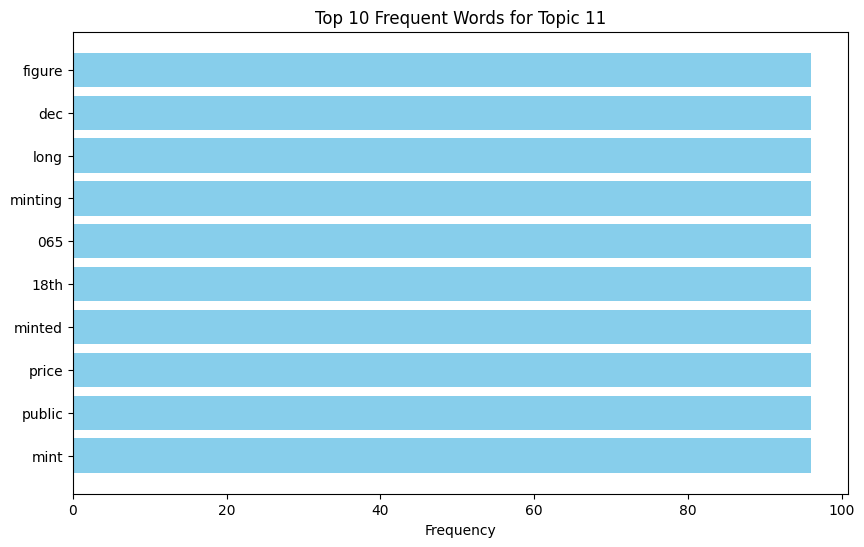

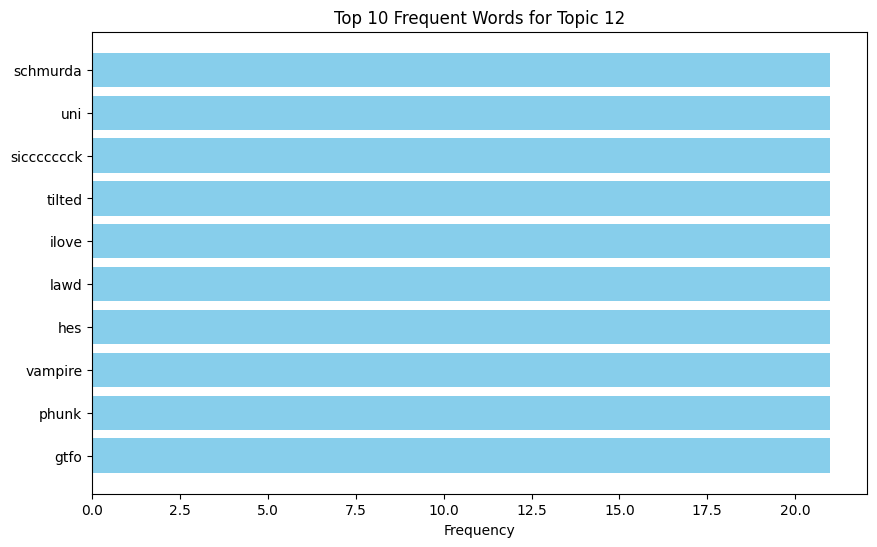

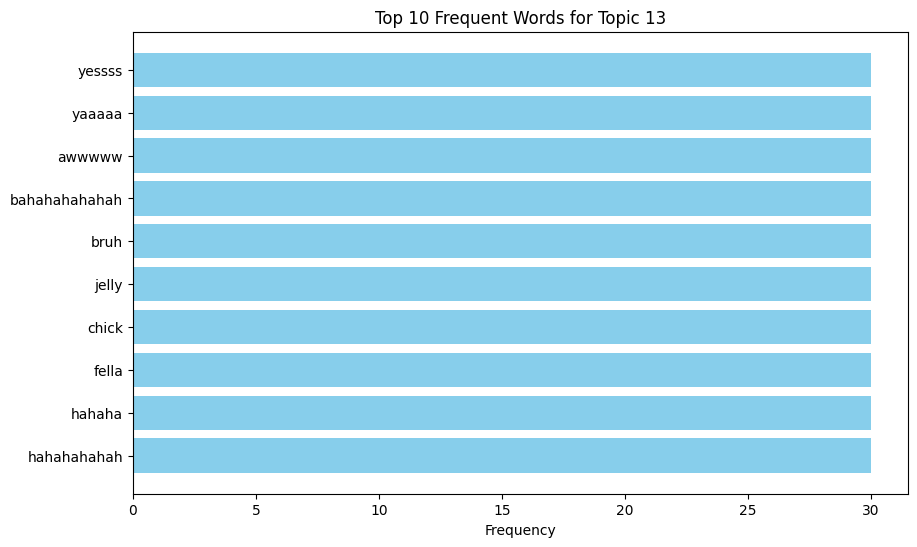

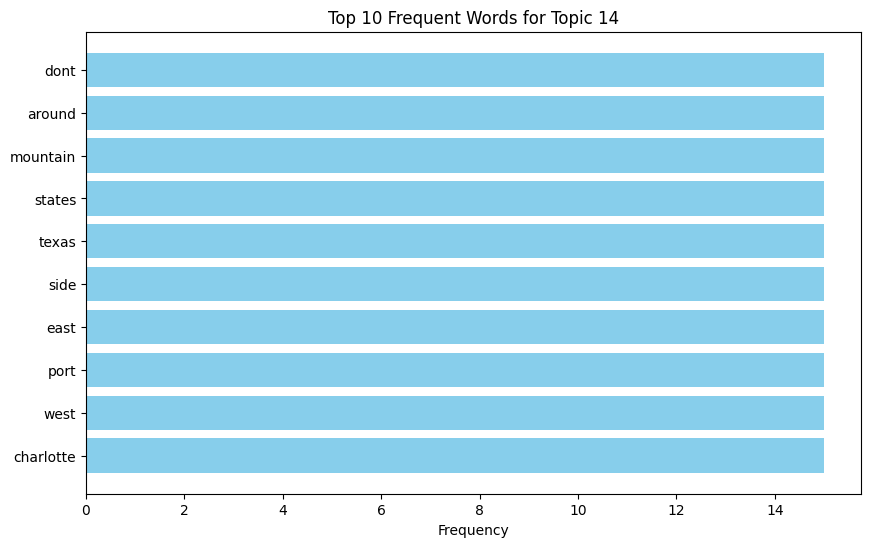

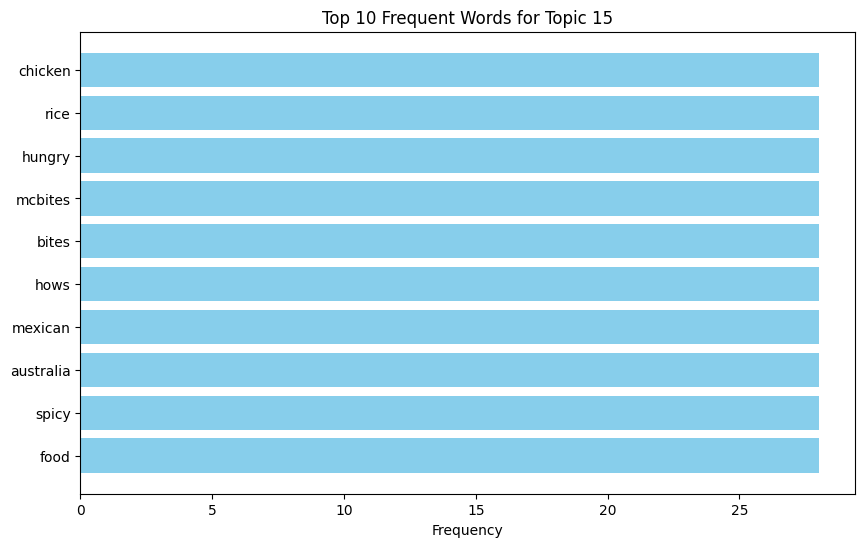

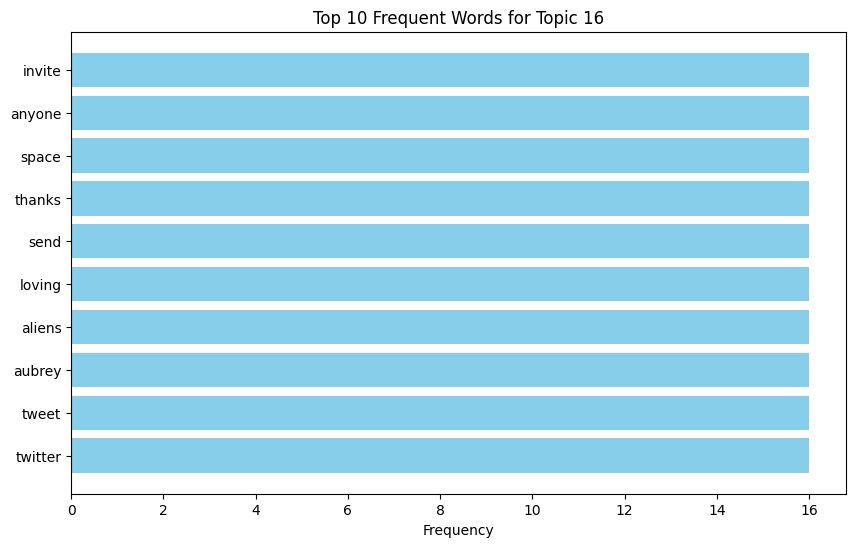

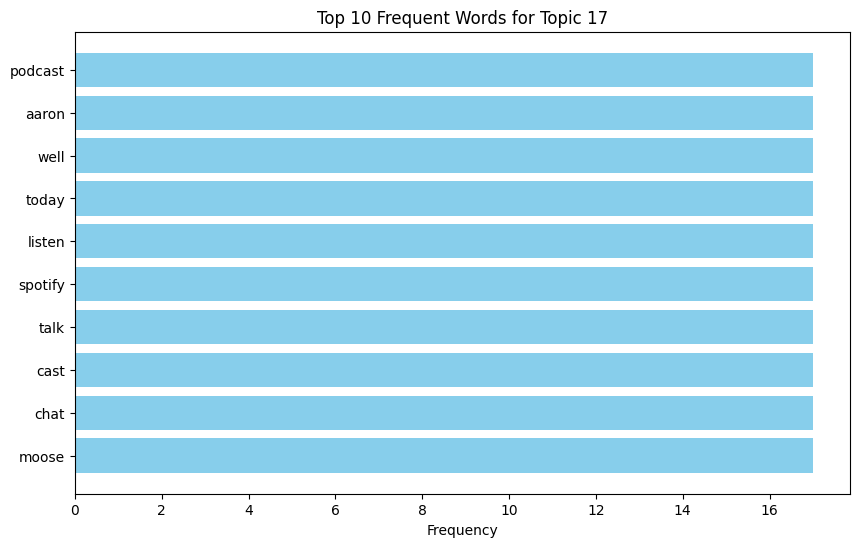

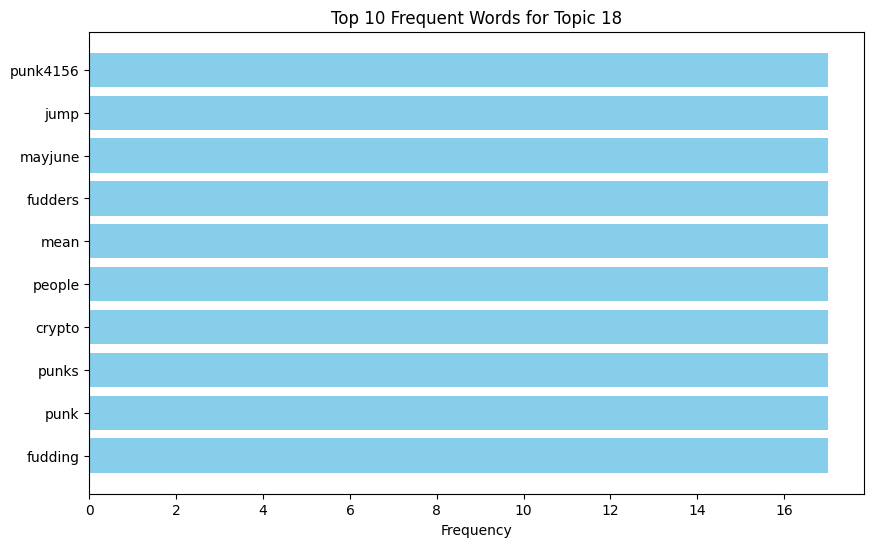

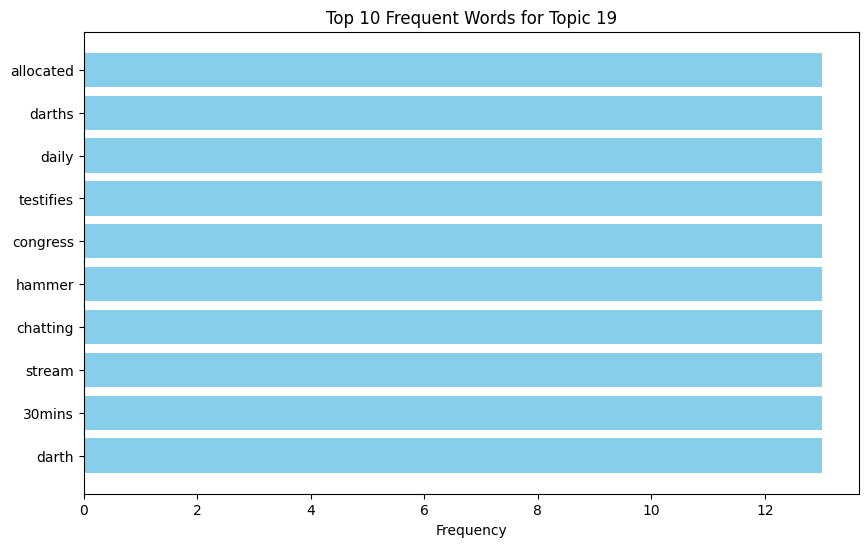

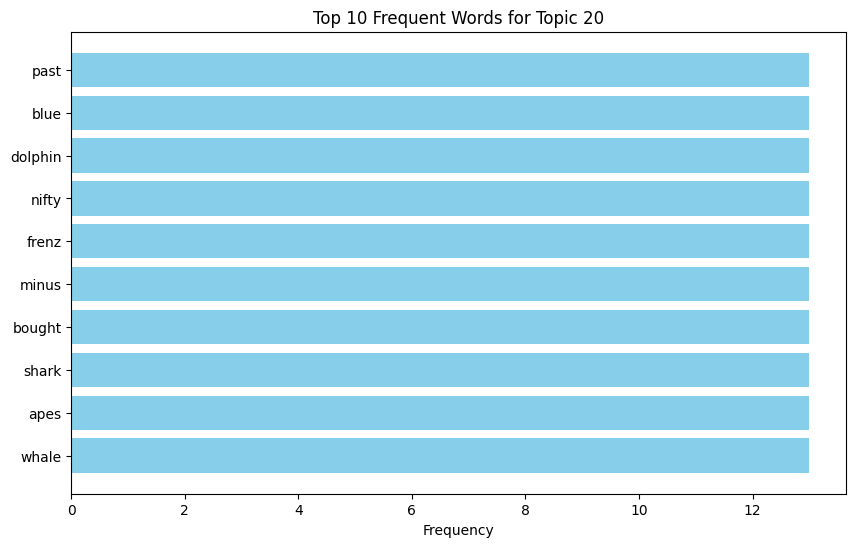

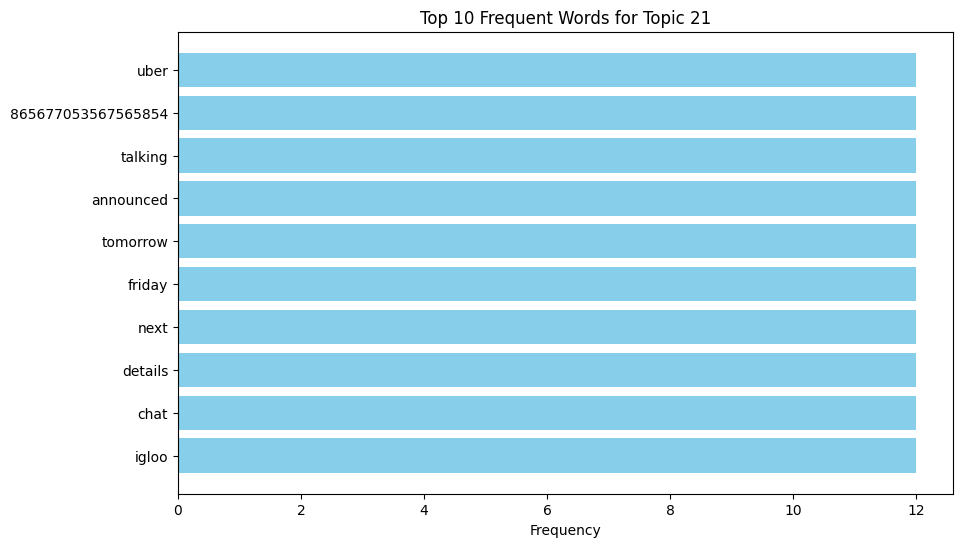

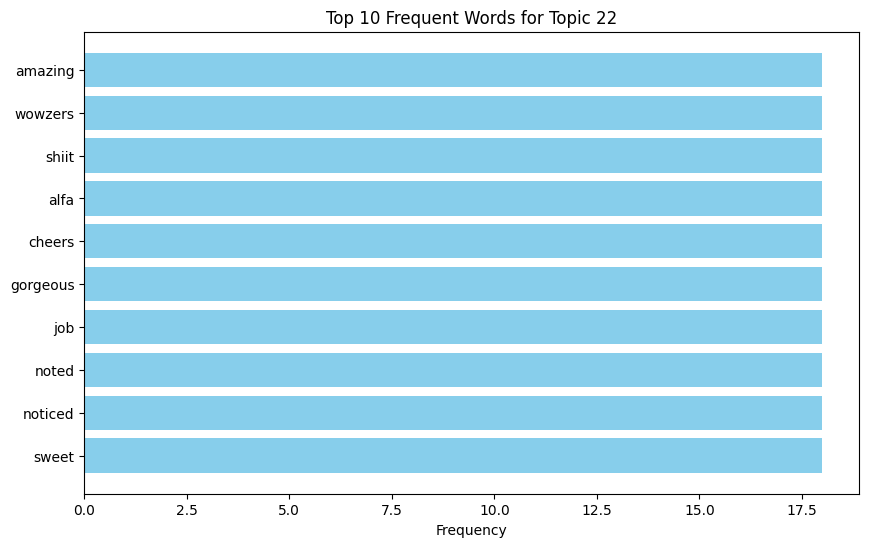

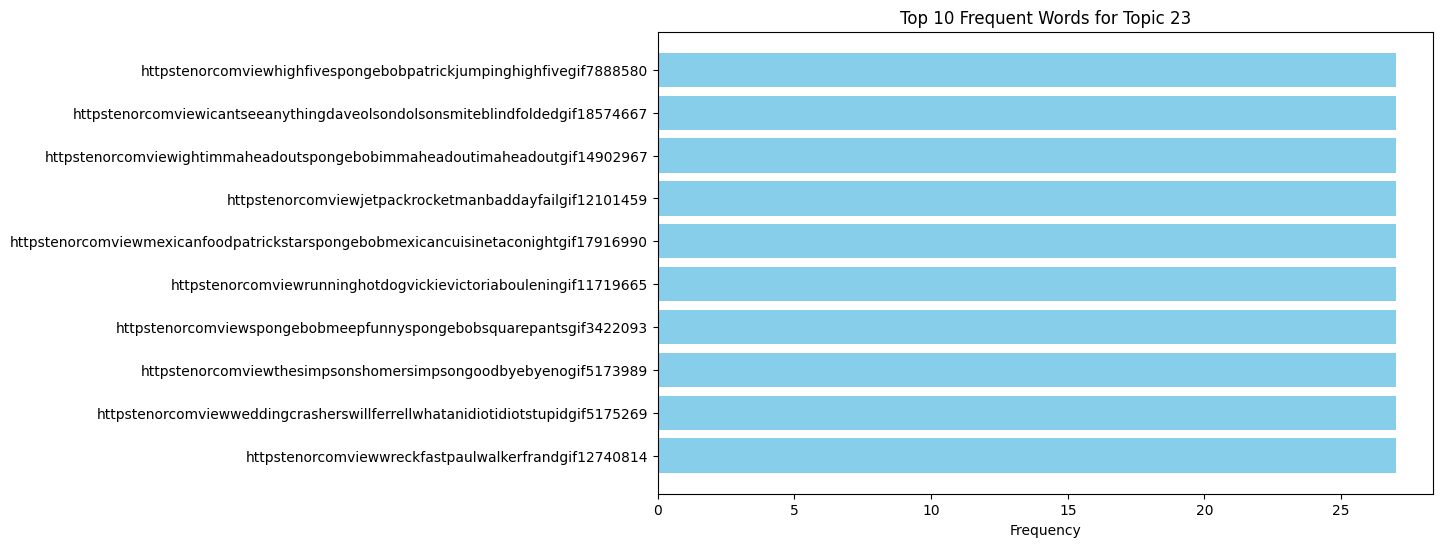

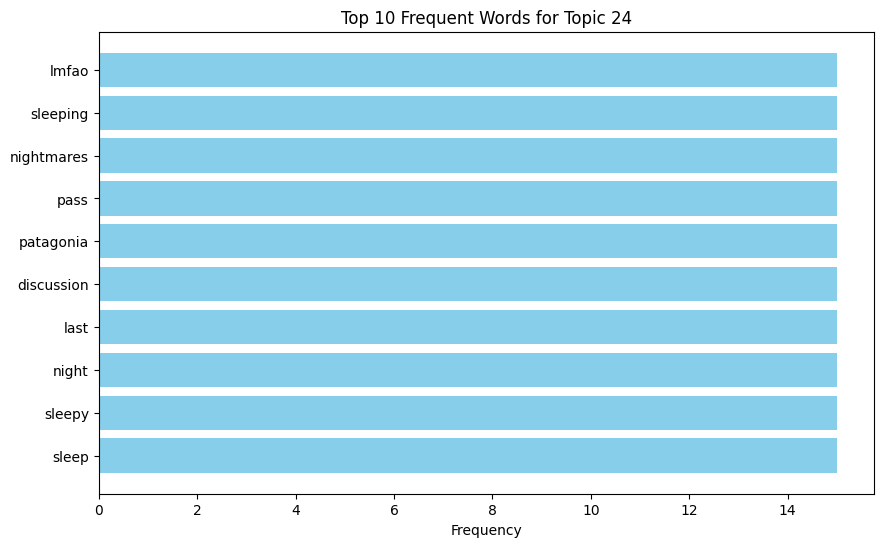

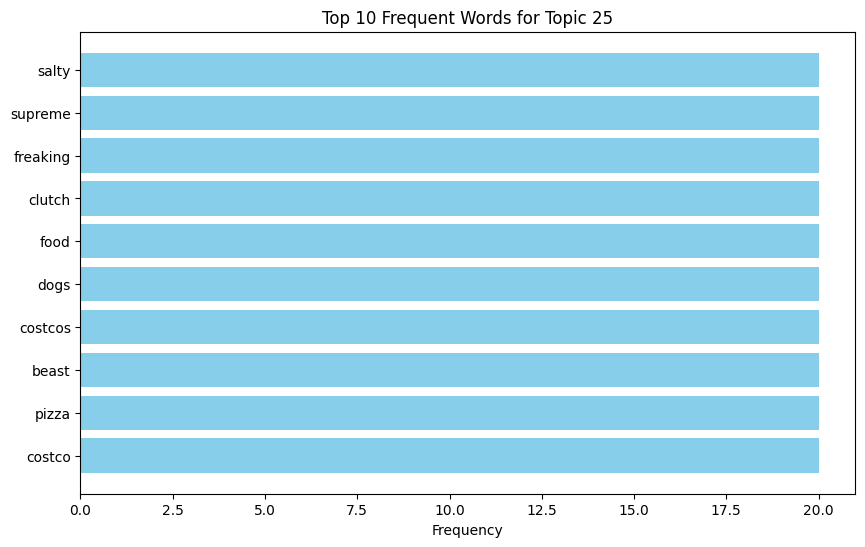

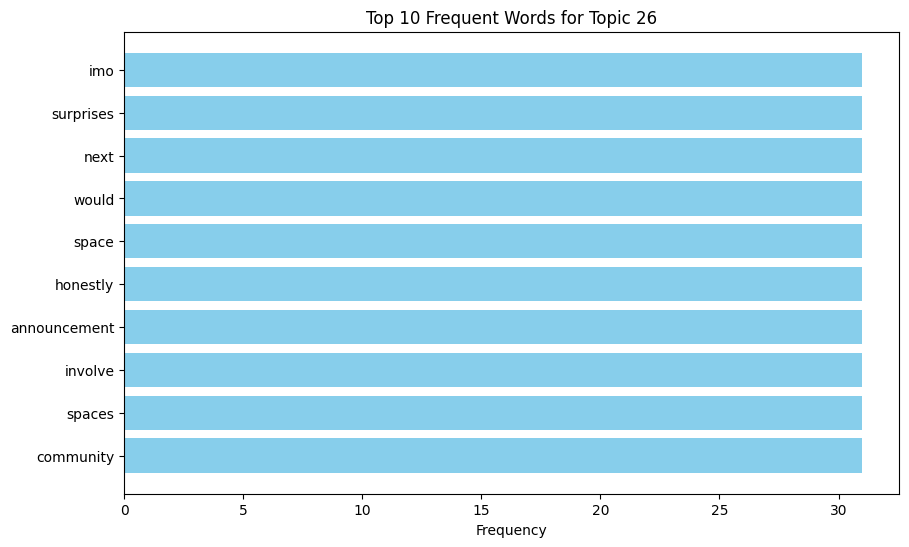

In [ ]:
import pandas as pd
from bertopic import BERTopic
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Filter data based on 'Announcements_Code' condition
filtered_data = data[data['Announcement_Code'] == 'A2008']

filtered_data['Content'] = filtered_data['Content'].astype(str)

# Assuming 'column_name' is the name of the column containing text data in 'filtered_data'
column_name = 'Content'  # Replace with the actual column name

# Extract text data
documents = filtered_data['Content'].tolist()

# Initialize BERTopic model with raw data
model = BERTopic()
topics, _ = model.fit_transform(documents)

# Retrieve and visualize top 10 words for each topic

top_n_topics = 30  # Number of topics to visualize
top_n_words = 10  # Number of top words to display for each topic

topic_freq = model.get_topic_freq()

for topic_id in range(top_n_topics):
    # Check if the topic_id exists in the topic_freq index and if the type is not an integer
    if topic_id in topic_freq.index and not isinstance(topic_freq.loc[topic_id], int):
        top_words = model.get_topic(topic_id)

        # Check if top_words is not empty and is a list of tuples
        if top_words and all(isinstance(t, tuple) for t in top_words):
            words, _ = zip(*top_words)
            words = list(words)[:top_n_words][::-1]

            frequencies = topic_freq.loc[topic_id].head(top_n_words)['Count']

            if isinstance(frequencies, pd.Series):
                frequencies = frequencies.values[::-1]  # Convert to numpy array if it's a Series

            plt.figure(figsize=(10, 6))
            plt.barh(words, frequencies, color='skyblue')
            plt.xlabel('Frequency')
            plt.title(f'Top {top_n_words} Frequent Words for Topic {topic_id}')
            plt.gca().invert_yaxis()
            plt.show()


In [ ]:
import pandas as pd
# Assuming 'model' and 'topic_freq' are already defined from your previous code
# Assuming 'top_n_topics', 'top_n_words', and 'filtered_data' are defined

# Initialize BERTopic model with desired parameters
model = BERTopic(top_n_words=10, nr_topics=30, n_gram_range=(1, 1))

# Fit the model on the 'Content' column of the filtered DataFrame
topics, _ = model.fit_transform(filtered_data['Content'].tolist())

# Add the BERTopic results to the filtered DataFrame
filtered_data['topic'] = topics

# Adjust the display settings to show more characters
pd.set_option('display.max_colwidth', None)

# Assuming 'model' and 'topic_freq' are already defined from your previous code
# Assuming 'top_n_topics', 'top_n_words', and 'filtered_data' are defined

# Initialize an empty list to store top words and content data
top_words_data = []

for topic_id in range(top_n_topics):
    if topic_id in topic_freq.index and not isinstance(topic_freq.loc[topic_id], int):
        top_words = model.get_topic(topic_id)

        # Ensure that top_words is a list of tuples before iterating
        if isinstance(top_words, list) and all(isinstance(item, tuple) for item in top_words):
            words_list = [word for word, _ in top_words]
            top_words_data.append((f"Topic {topic_id}", ", ".join(words_list[:top_n_words])))

            # Get the top 5 content subsequent to the top words for the current topic
            content_subsequent = filtered_data[filtered_data['topic'] == topic_id]['Content'].head(5).tolist()
            top_words_data[-1] += (", ".join(content_subsequent),)  # Append the content to the tuple
        else:
            top_words_data.append((f"Topic {topic_id}", "", ""))  # Add an empty string for unexpected data types

# Create a DataFrame with "Index Topic", "10 Freq Words", and "Top 5 Content" columns
top_words_df = pd.DataFrame(top_words_data, columns=["Index Topic", "10 Freq Words", "Top 5 Content"])

# Print the DataFrame
print(top_words_df)



   Index Topic  \
0      Topic 0   
1      Topic 1   
2      Topic 2   
3      Topic 3   
4      Topic 4   
5      Topic 5   
6      Topic 6   
7      Topic 7   
8      Topic 8   
9      Topic 9   
10    Topic 10   
11    Topic 11   
12    Topic 12   
13    Topic 13   
14    Topic 14   
15    Topic 15   
16    Topic 16   
17    Topic 17   
18    Topic 18   
19    Topic 19   
20    Topic 20   
21    Topic 21   
22    Topic 22   
23    Topic 23   
24    Topic 24   
25    Topic 25   
26    Topic 26   
27    Topic 27   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:
import pandas as pd
import os
import zipfile

# Function to save top words and content for a specific announcement code
def save_top_words_and_content(announcement_code, top_n_topics, top_n_words):
    # Assuming 'model' and 'topic_freq' are already defined from your previous code
    # Assuming 'filtered_data' is defined and contains the 'Announcements_Code' column

    # Filter data based on 'Announcements_Code' condition
    filtered_data = data[data['Announcement_Code'] == announcement_code]

    # Initialize BERTopic model with desired parameters
    model = BERTopic(top_n_words=10, nr_topics=30, n_gram_range=(1, 1))

    filtered_data['Content'] = filtered_data['Content'].astype(str)

    # Fit the model on the 'Content' column of the filtered DataFrame
    topics, _ = model.fit_transform(filtered_data['Content'].tolist())

    # Add the BERTopic results to the filtered DataFrame
    filtered_data['topic'] = topics

    # Initialize an empty list to store top words and content data
    top_words_data = []

    for topic_id in range(top_n_topics):
        if topic_id in topic_freq.index and not isinstance(topic_freq.loc[topic_id], int):
            top_words = model.get_topic(topic_id)

            # Ensure that top_words is a list of tuples before iterating
            if isinstance(top_words, list) and all(isinstance(item, tuple) for item in top_words):
                words_list = [word for word, _ in top_words]
                top_words_data.append((f"Topic {topic_id}", ", ".join(words_list[:top_n_words])))

                # Get the top 5 content subsequent to the top words for the current topic
                content_subsequent = filtered_data[filtered_data['topic'] == topic_id]['Content'].head(5).tolist()
                top_words_data[-1] += (", ".join(content_subsequent),)  # Append the content to the tuple
            else:
                top_words_data.append((f"Topic {topic_id}", "", ""))  # Add an empty string for unexpected data types

    # Create a DataFrame with "Index Topic", "10 Freq Words", and "Top 5 Content" columns
    top_words_df = pd.DataFrame(top_words_data, columns=["Index Topic", "10 Freq Words", "Top 5 Content"])

    # Save the DataFrame to a CSV file
    csv_file_path = f'{announcement_code}_top_words_results.csv'
    top_words_df.to_csv(csv_file_path, index=False)

    # Display the CSV file path
    print(f'Top 10 words data saved to: {csv_file_path}')

    return csv_file_path

# Assuming 'data' is your DataFrame containing 'Announcements_Code'
announcement_codes = data['Announcement_Code'].unique()

# Create a zip folder to store all CSV files
zip_folder_path = 'announcement_codes_data.zip'
with zipfile.ZipFile(zip_folder_path, 'w') as zip_folder:
    for code in announcement_codes:
        csv_file_path = save_top_words_and_content(code, top_n_topics, top_n_words)
        zip_folder.write(csv_file_path, os.path.basename(csv_file_path))

# Display the zip folder path
print(f'All data saved to: {zip_folder_path}')


Top 10 words data saved to: A2008_top_words_results.csv
Top 10 words data saved to: A2009_top_words_results.csv
Top 10 words data saved to: A2010_top_words_results.csv
Top 10 words data saved to: A2011_top_words_results.csv
Top 10 words data saved to: A2012_top_words_results.csv
Top 10 words data saved to: A2013_top_words_results.csv
Top 10 words data saved to: A2014_top_words_results.csv
Top 10 words data saved to: A2015_top_words_results.csv
Top 10 words data saved to: A2016_top_words_results.csv
Top 10 words data saved to: A2017_top_words_results.csv
Top 10 words data saved to: A2018_top_words_results.csv
Top 10 words data saved to: A2019_top_words_results.csv
Top 10 words data saved to: A2020_top_words_results.csv
Top 10 words data saved to: A2021_top_words_results.csv
Top 10 words data saved to: A2022_top_words_results.csv
Top 10 words data saved to: A2023_top_words_results.csv
Top 10 words data saved to: A2024_top_words_results.csv
Top 10 words data saved to: A2025_top_words_resu

In [ ]:
from google.colab import files

# Choose the Excel file from your local system to upload
uploaded = files.upload()

Saving Bertopic_Phase3.xlsx to Bertopic_Phase3.xlsx


In [ ]:
import pandas as pd

# Assuming the name of your uploaded excel file
file_name = 'Bertopic_Phase3.xlsx'

# Read the uploaded excel file
data = pd.read_excel(file_name)

# Display the contents of the excel file
print(data)


       Phase_Code       Date Announcement_Code  \
0              P3 2022-01-02             A3001   
1              P3 2022-01-02             A3001   
2              P3 2022-01-02             A3001   
3              P3 2022-01-02             A3001   
4              P3 2022-01-02             A3001   
...           ...        ...               ...   
106435         P3 2022-04-30             A3034   
106436         P3 2022-04-30             A3034   
106437         P3 2022-04-30             A3034   
106438         P3 2022-04-30             A3034   
106439         P3 2022-04-30             A3034   

                                                                                           Content  
0                                                                      would like flower crown 125  
1                                                                                       Hail pudge  
2                                                                   Maybe peng epic fishing anyw

In [ ]:
!pip install bertopic

In [ ]:
from bertopic import BERTopic
import pandas as pd


# Load your DataFrame, replace 'your_data.csv' with the actual file path or URL
data = pd.read_excel('Bertopic_Phase3.xlsx')

# Assuming 'data' is your DataFrame
# Filter data based on 'Announcements_Code' condition
filtered_data = data[data['Announcement_Code'] == 'A3012']

filtered_data['Content'] = filtered_data['Content'].astype(str)

# Initialize BERTopic model with desired parameters
model = BERTopic(top_n_words=10, nr_topics=30, n_gram_range=(1, 1))

# Fit the model on the filtered 'Content' column
topics, _ = model.fit_transform(filtered_data['Content'])

# Add the BERTopic results to the filtered DataFrame
filtered_data['topic'] = topics

# Display the DataFrame with BERTopic results
print(filtered_data)


      Phase_Code       Date Announcement_Code  \
29447         P3 2022-02-20             A3012   
29448         P3 2022-02-20             A3012   
29449         P3 2022-02-20             A3012   
29450         P3 2022-02-20             A3012   
29451         P3 2022-02-20             A3012   
...          ...        ...               ...   
30076         P3 2022-02-20             A3012   
30077         P3 2022-02-20             A3012   
30078         P3 2022-02-20             A3012   
30079         P3 2022-02-20             A3012   
30080         P3 2022-02-20             A3012   

                                                        Content  topic  
29447                      might probably gonna watch star game     -1  
29448                                         hoppin digi later      3  
29449                                           Carrrroooottttt      8  
29450  httpstenorcomviewmooddanceoffmexicodrunkgoalsgif16529601      7  
29451                               symbol bou

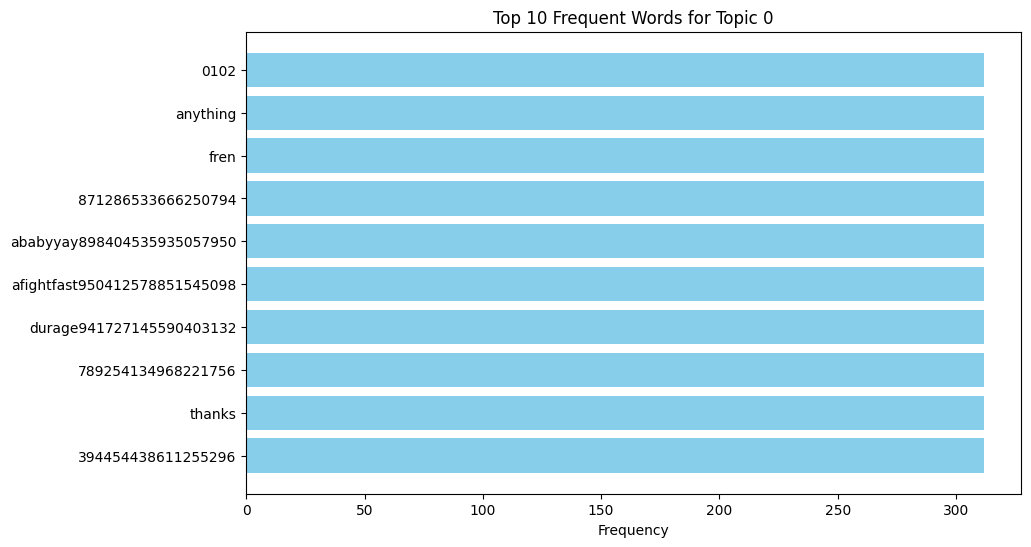

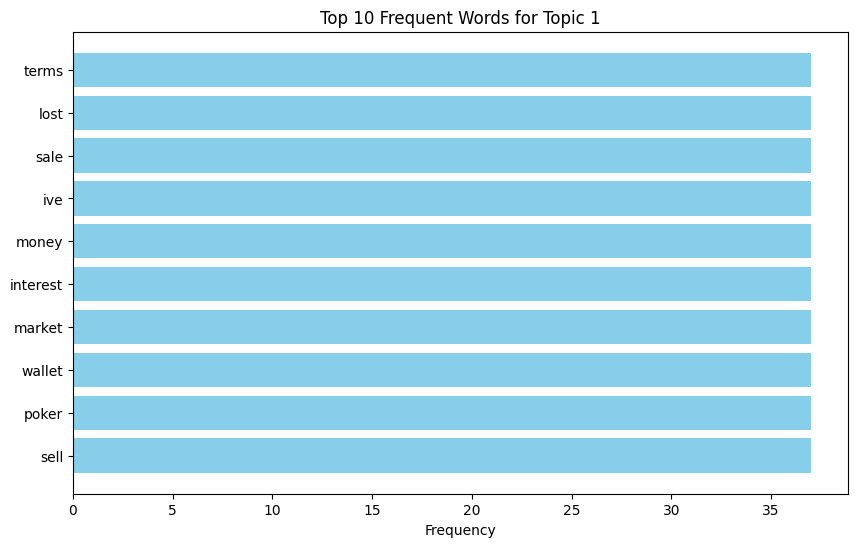

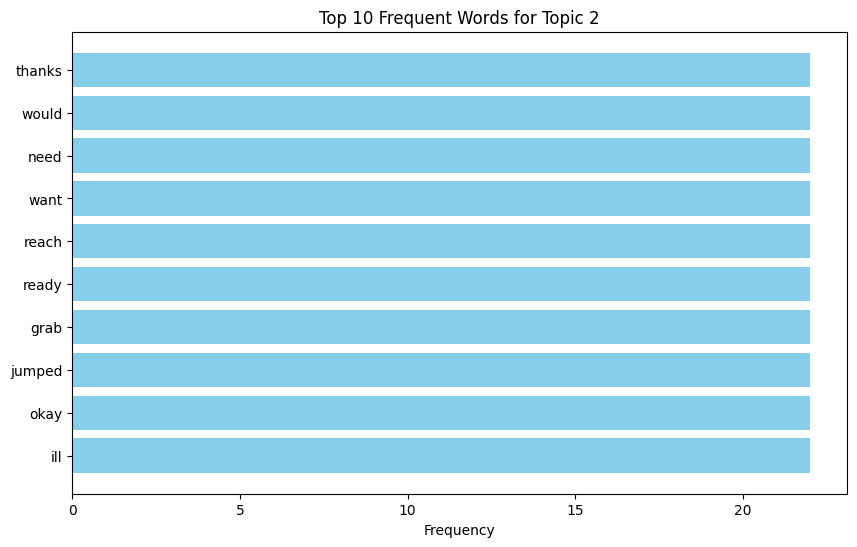

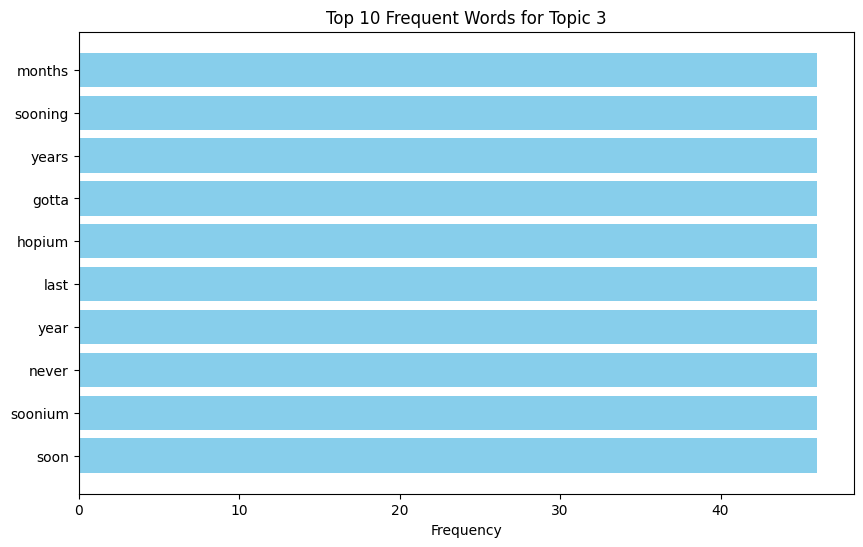

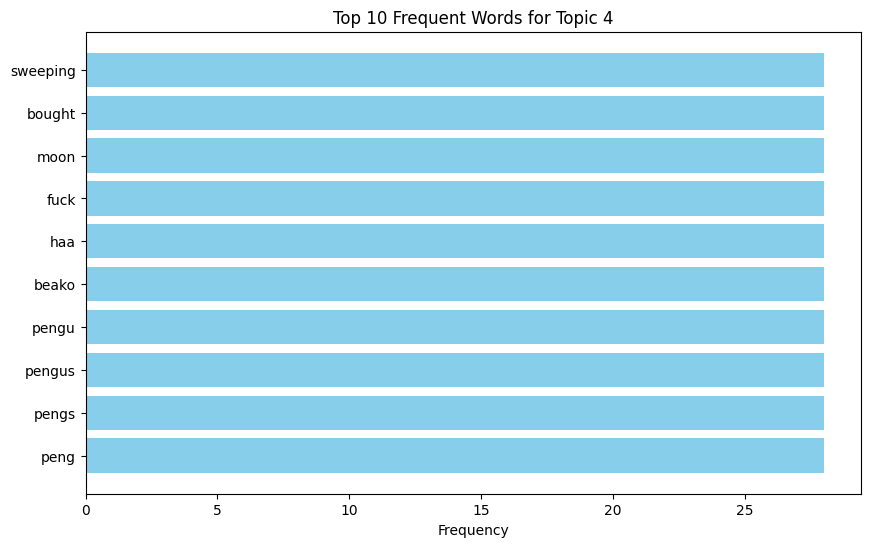

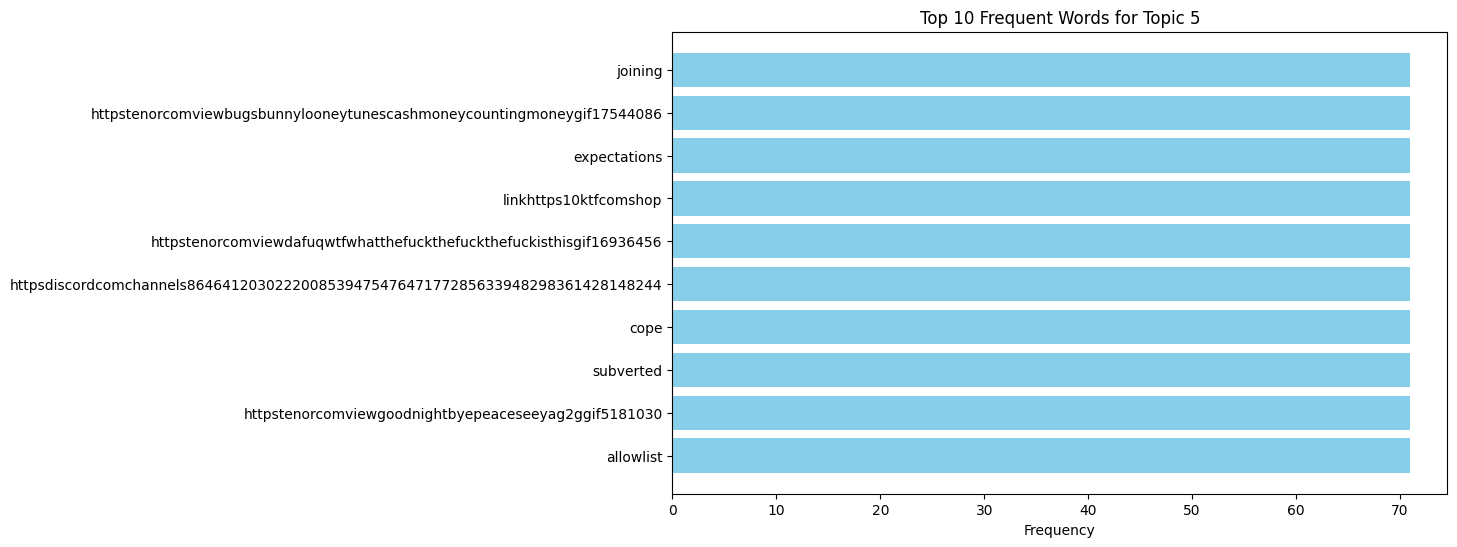

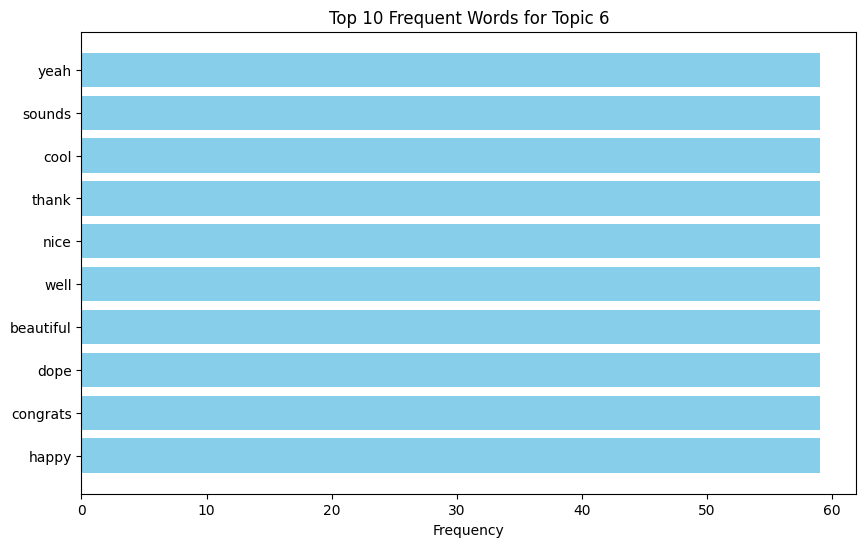

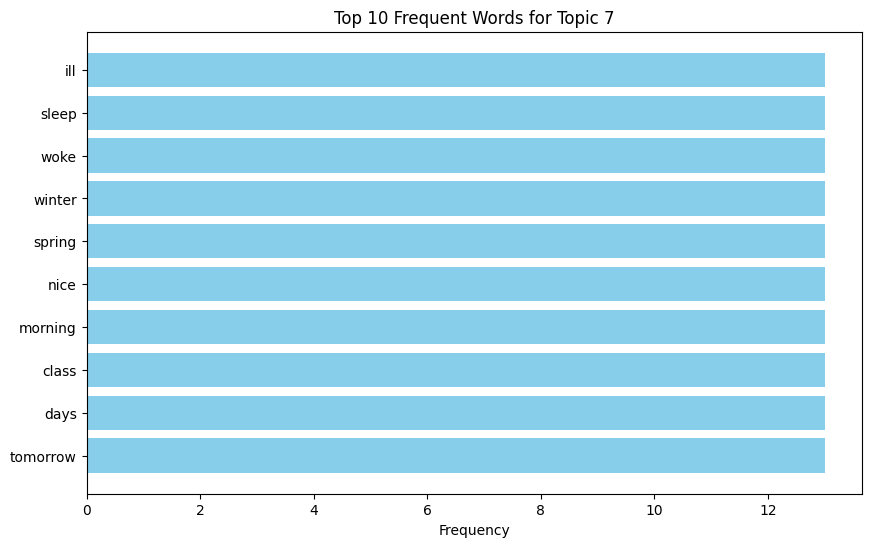

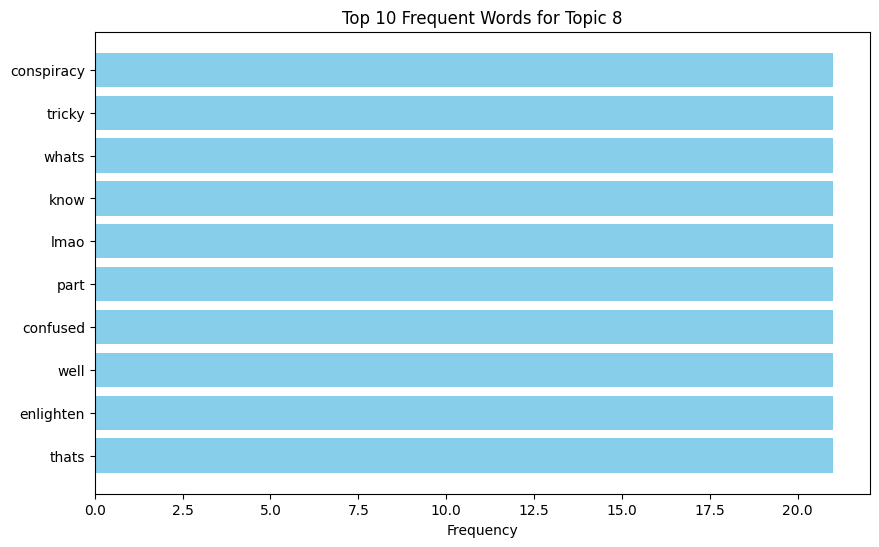

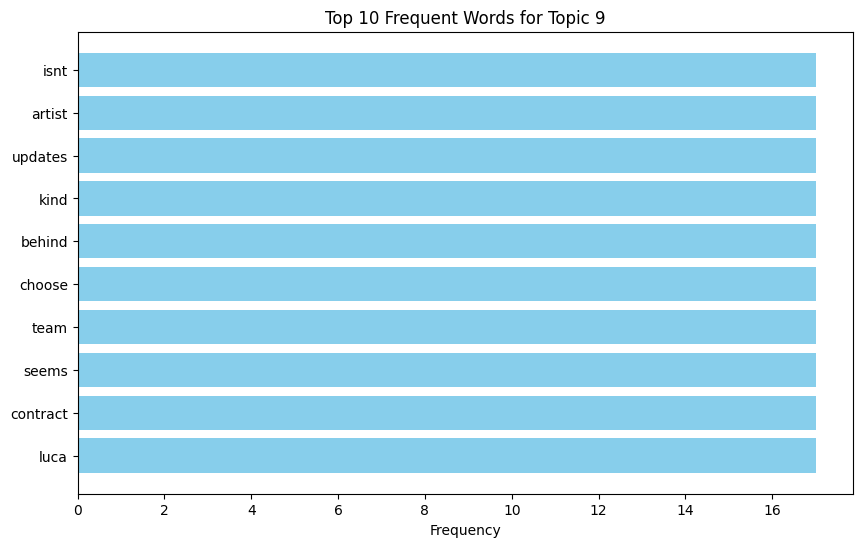

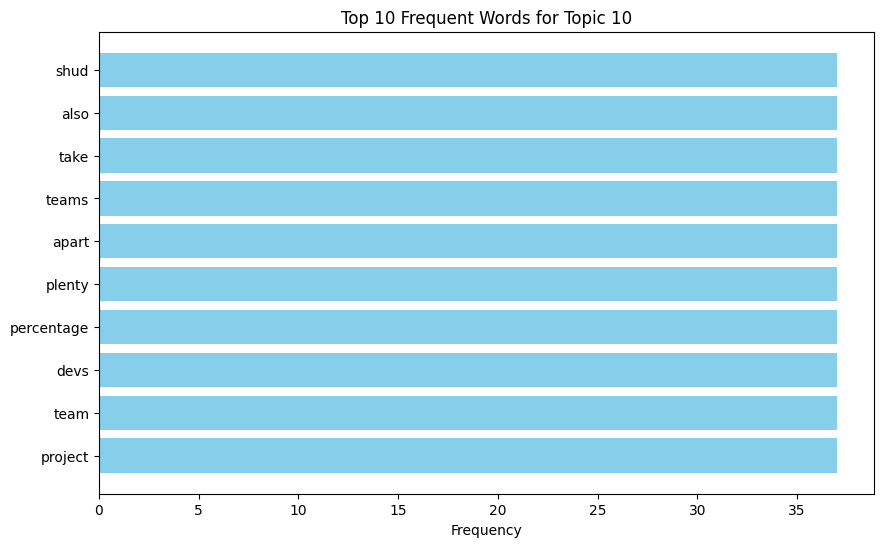

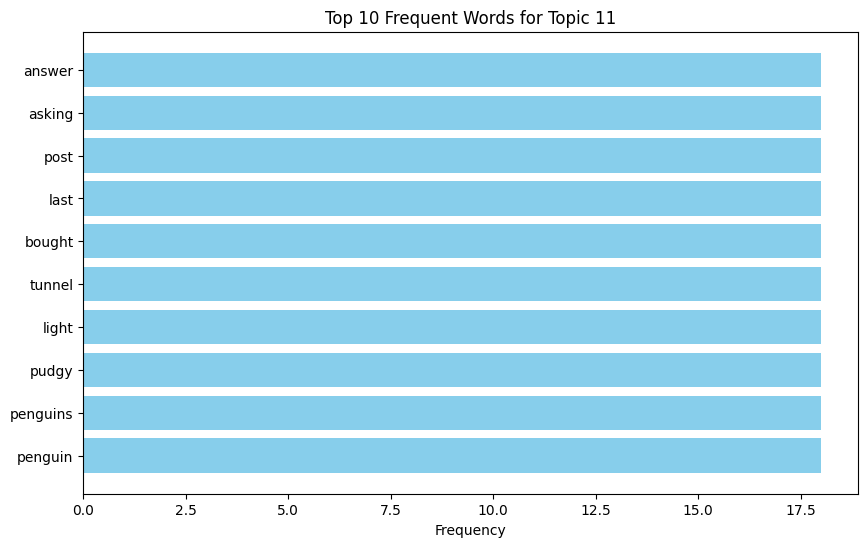

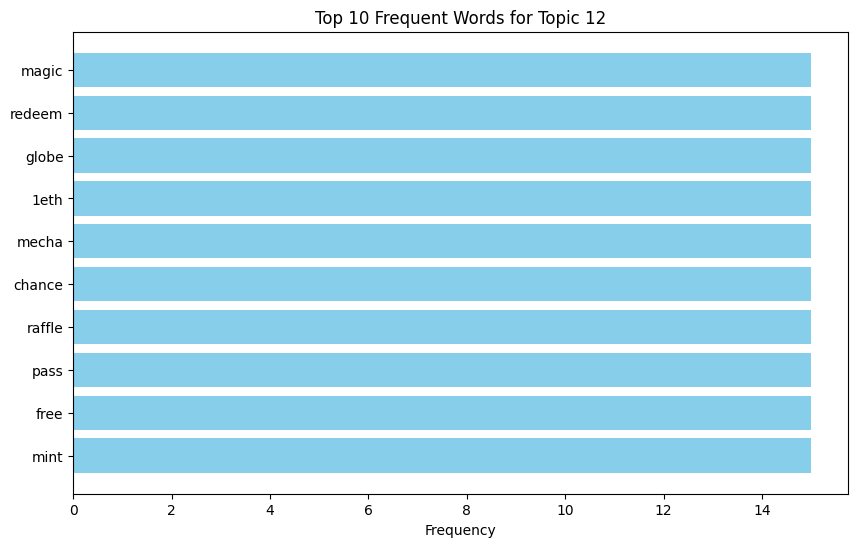

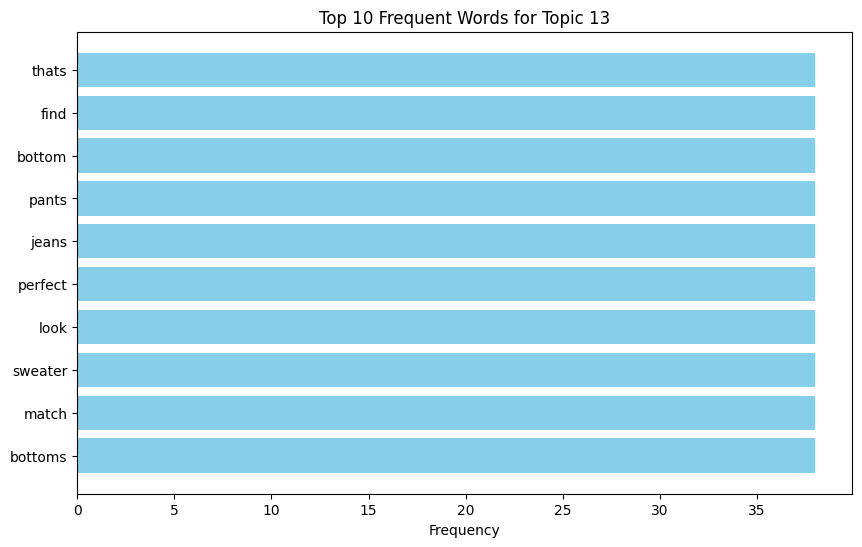

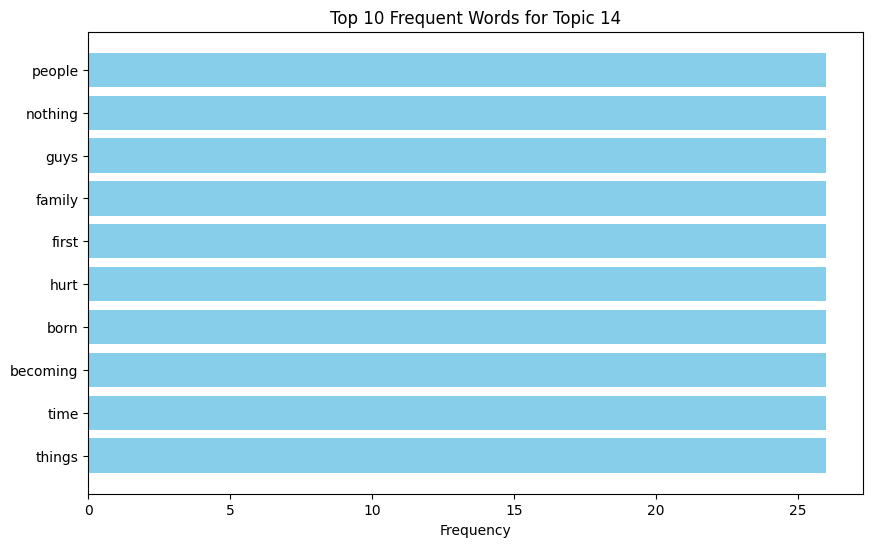

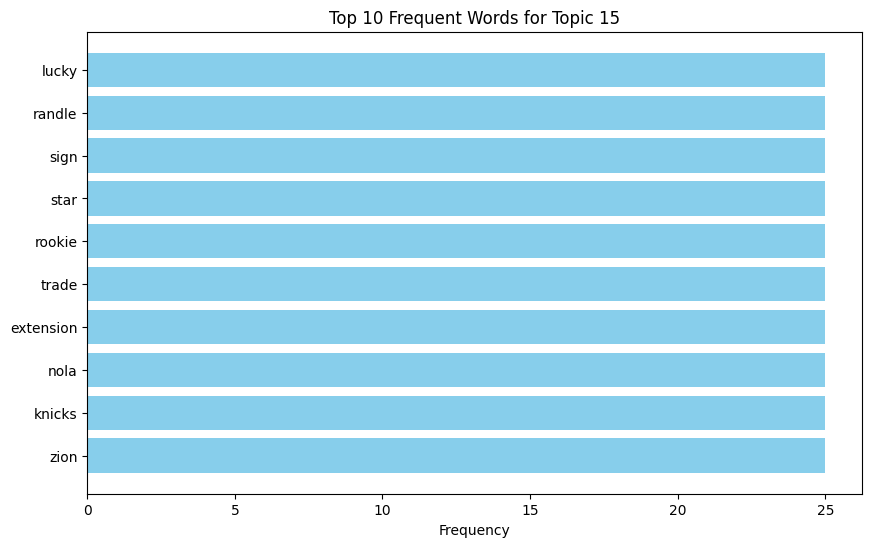

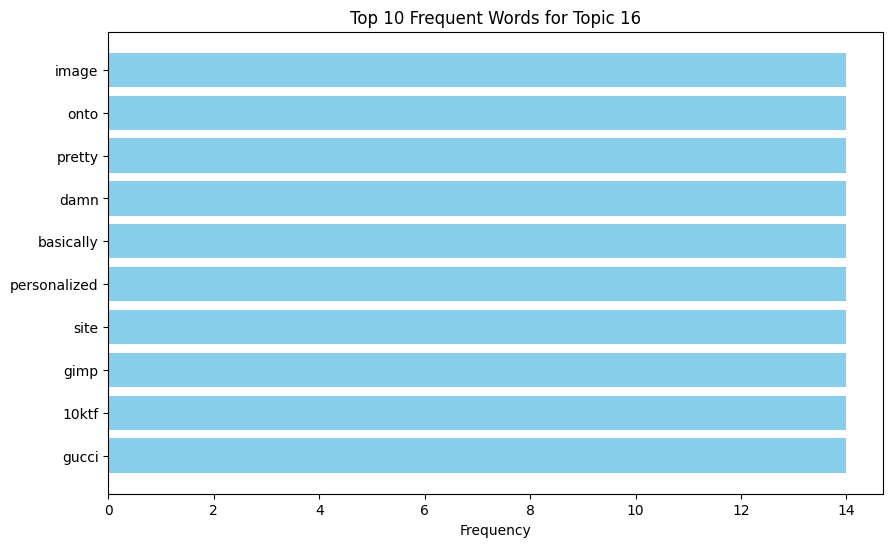

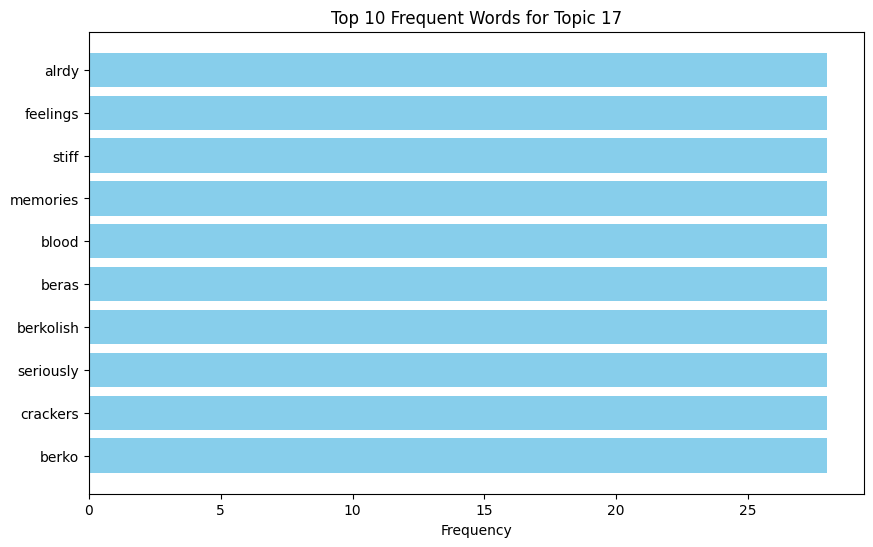

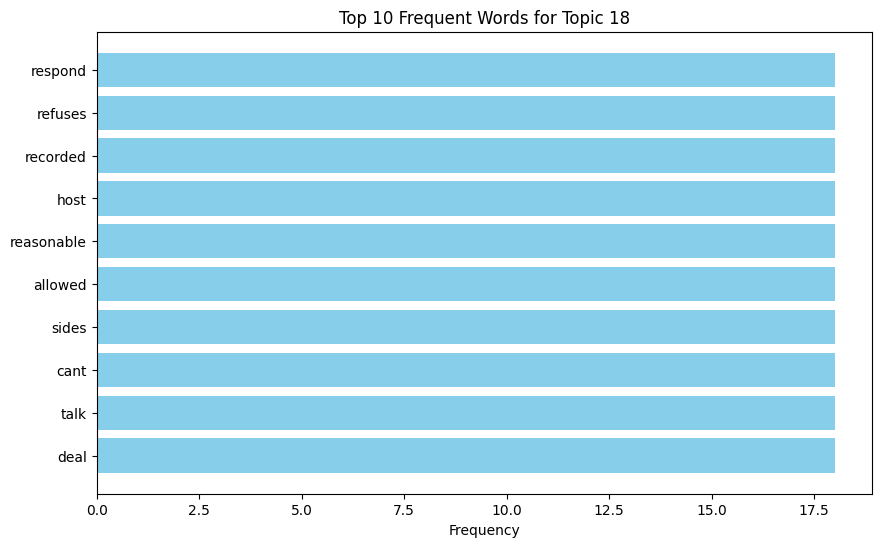

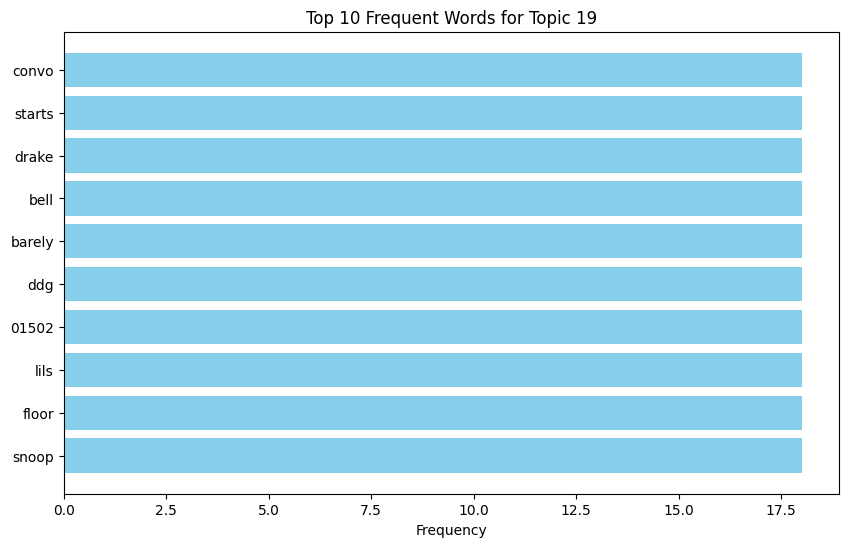

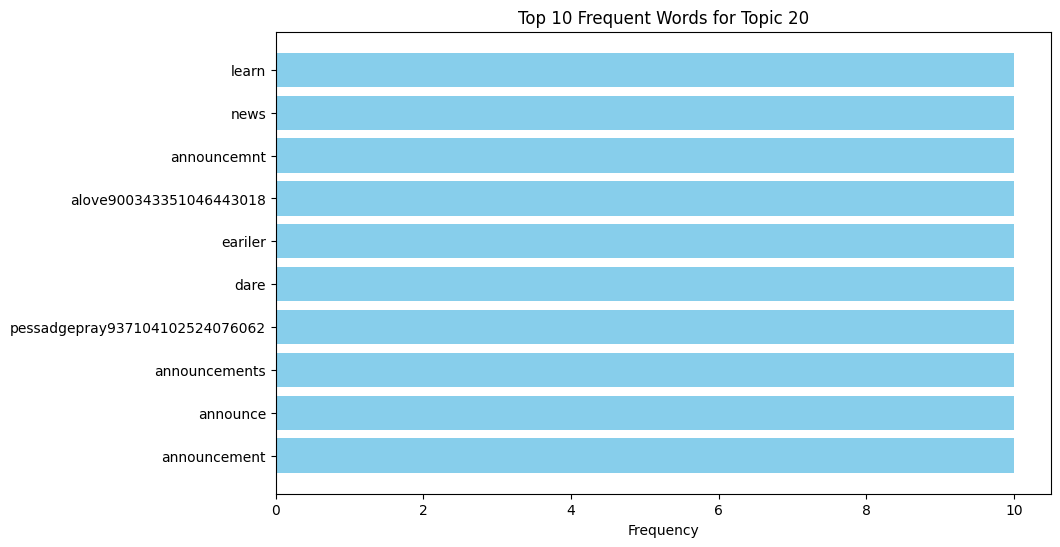

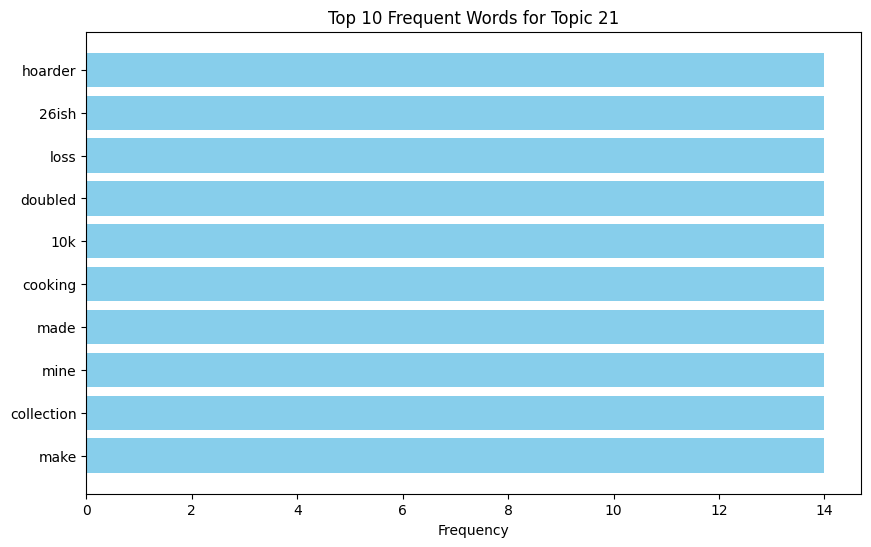

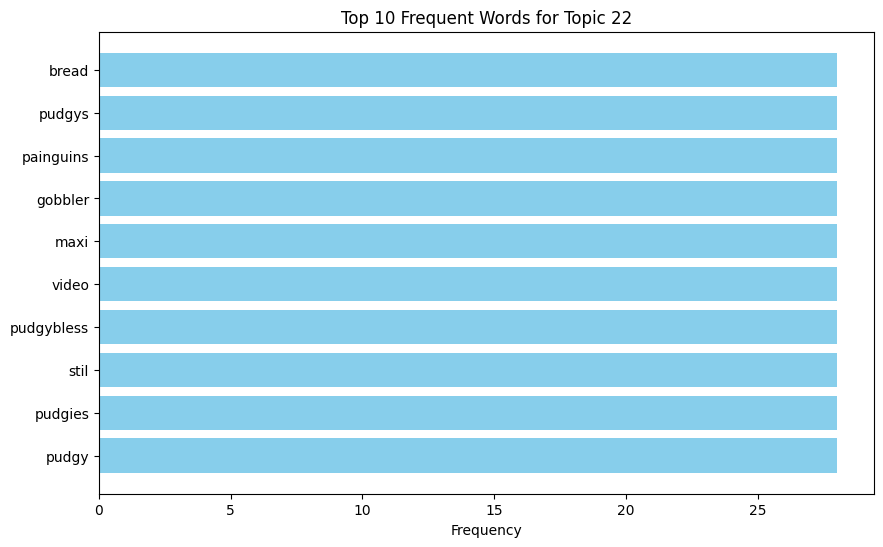

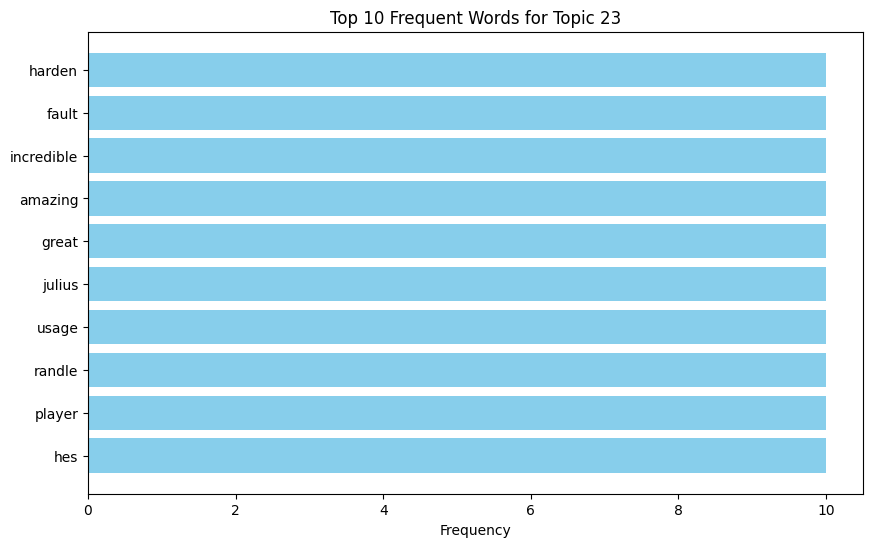

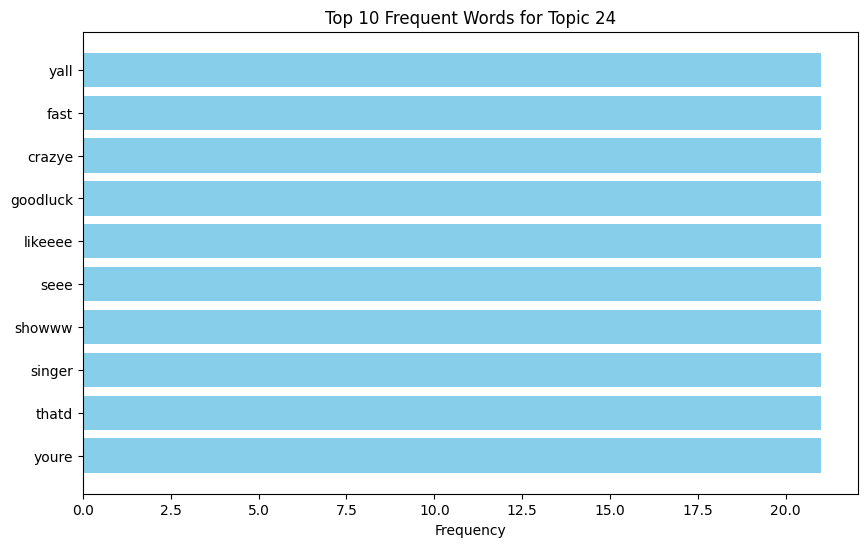

In [ ]:
import pandas as pd
from bertopic import BERTopic
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Filter data based on 'Announcements_Code' condition
filtered_data = data[data['Announcement_Code'] == 'A3013']

filtered_data['Content'] = filtered_data['Content'].astype(str)

# Assuming 'column_name' is the name of the column containing text data in 'filtered_data'
column_name = 'Content'  # Replace with the actual column name

# Extract text data
documents = filtered_data['Content'].tolist()

# Initialize BERTopic model with raw data
model = BERTopic()
topics, _ = model.fit_transform(documents)

# Retrieve and visualize top 10 words for each topic

top_n_topics = 30  # Number of topics to visualize
top_n_words = 10  # Number of top words to display for each topic

topic_freq = model.get_topic_freq()

for topic_id in range(top_n_topics):
    # Check if the topic_id exists in the topic_freq index and if the type is not an integer
    if topic_id in topic_freq.index and not isinstance(topic_freq.loc[topic_id], int):
        top_words = model.get_topic(topic_id)

        # Check if top_words is not empty and is a list of tuples
        if top_words and all(isinstance(t, tuple) for t in top_words):
            words, _ = zip(*top_words)
            words = list(words)[:top_n_words][::-1]

            frequencies = topic_freq.loc[topic_id].head(top_n_words)['Count']

            if isinstance(frequencies, pd.Series):
                frequencies = frequencies.values[::-1]  # Convert to numpy array if it's a Series

            plt.figure(figsize=(10, 6))
            plt.barh(words, frequencies, color='skyblue')
            plt.xlabel('Frequency')
            plt.title(f'Top {top_n_words} Frequent Words for Topic {topic_id}')
            plt.gca().invert_yaxis()
            plt.show()


In [ ]:
import pandas as pd
# Assuming 'model' and 'topic_freq' are already defined from your previous code
# Assuming 'top_n_topics', 'top_n_words', and 'filtered_data' are defined

# Initialize BERTopic model with desired parameters
model = BERTopic(top_n_words=10, nr_topics=30, n_gram_range=(1, 1))

# Fit the model on the 'Content' column of the filtered DataFrame
topics, _ = model.fit_transform(filtered_data['Content'].tolist())

# Add the BERTopic results to the filtered DataFrame
filtered_data['topic'] = topics

# Adjust the display settings to show more characters
pd.set_option('display.max_colwidth', None)

# Assuming 'model' and 'topic_freq' are already defined from your previous code
# Assuming 'top_n_topics', 'top_n_words', and 'filtered_data' are defined

# Initialize an empty list to store top words and content data
top_words_data = []

for topic_id in range(top_n_topics):
    if topic_id in topic_freq.index and not isinstance(topic_freq.loc[topic_id], int):
        top_words = model.get_topic(topic_id)

        # Ensure that top_words is a list of tuples before iterating
        if isinstance(top_words, list) and all(isinstance(item, tuple) for item in top_words):
            words_list = [word for word, _ in top_words]
            top_words_data.append((f"Topic {topic_id}", ", ".join(words_list[:top_n_words])))

            # Get the top 5 content subsequent to the top words for the current topic
            content_subsequent = filtered_data[filtered_data['topic'] == topic_id]['Content'].head(5).tolist()
            top_words_data[-1] += (", ".join(content_subsequent),)  # Append the content to the tuple
        else:
            top_words_data.append((f"Topic {topic_id}", "", ""))  # Add an empty string for unexpected data types

# Create a DataFrame with "Index Topic", "10 Freq Words", and "Top 5 Content" columns
top_words_df = pd.DataFrame(top_words_data, columns=["Index Topic", "10 Freq Words", "Top 5 Content"])

# Print the DataFrame
print(top_words_df)



   Index Topic  \
0      Topic 0   
1      Topic 1   
2      Topic 2   
3      Topic 3   
4      Topic 4   
5      Topic 5   
6      Topic 6   
7      Topic 7   
8      Topic 8   
9      Topic 9   
10    Topic 10   
11    Topic 11   
12    Topic 12   
13    Topic 13   
14    Topic 14   
15    Topic 15   
16    Topic 16   
17    Topic 17   
18    Topic 18   
19    Topic 19   
20    Topic 20   
21    Topic 21   
22    Topic 22   
23    Topic 23   
24    Topic 24   
25    Topic 25   

                                                                                                                                                                                                                                                                                                                              10 Freq Words  \
0                                                                                                                                                                                 

In [ ]:
import pandas as pd
import os
import zipfile

# Function to save top words and content for a specific announcement code
def save_top_words_and_content(announcement_code, top_n_topics, top_n_words):
    # Assuming 'model' and 'topic_freq' are already defined from your previous code
    # Assuming 'filtered_data' is defined and contains the 'Announcements_Code' column

    # Filter data based on 'Announcements_Code' condition
    filtered_data = data[data['Announcement_Code'] == announcement_code]

    # Initialize BERTopic model with desired parameters
    model = BERTopic(top_n_words=10, nr_topics=30, n_gram_range=(1, 1))

    filtered_data['Content'] = filtered_data['Content'].astype(str)

    # Fit the model on the 'Content' column of the filtered DataFrame
    topics, _ = model.fit_transform(filtered_data['Content'].tolist())

    # Add the BERTopic results to the filtered DataFrame
    filtered_data['topic'] = topics

    # Initialize an empty list to store top words and content data
    top_words_data = []

    for topic_id in range(top_n_topics):
        if topic_id in topic_freq.index and not isinstance(topic_freq.loc[topic_id], int):
            top_words = model.get_topic(topic_id)

            # Ensure that top_words is a list of tuples before iterating
            if isinstance(top_words, list) and all(isinstance(item, tuple) for item in top_words):
                words_list = [word for word, _ in top_words]
                top_words_data.append((f"Topic {topic_id}", ", ".join(words_list[:top_n_words])))

                # Get the top 5 content subsequent to the top words for the current topic
                content_subsequent = filtered_data[filtered_data['topic'] == topic_id]['Content'].head(5).tolist()
                top_words_data[-1] += (", ".join(content_subsequent),)  # Append the content to the tuple
            else:
                top_words_data.append((f"Topic {topic_id}", "", ""))  # Add an empty string for unexpected data types

    # Create a DataFrame with "Index Topic", "10 Freq Words", and "Top 5 Content" columns
    top_words_df = pd.DataFrame(top_words_data, columns=["Index Topic", "10 Freq Words", "Top 5 Content"])

    # Save the DataFrame to a CSV file
    csv_file_path = f'{announcement_code}_top_words_results.csv'
    top_words_df.to_csv(csv_file_path, index=False)

    # Display the CSV file path
    print(f'Top 10 words data saved to: {csv_file_path}')

    return csv_file_path

# Assuming 'data' is your DataFrame containing 'Announcements_Code'
announcement_codes = data['Announcement_Code'].unique()

# Create a zip folder to store all CSV files
zip_folder_path = 'announcement_codes_data_3.zip'
with zipfile.ZipFile(zip_folder_path, 'w') as zip_folder:
    for code in announcement_codes:
        csv_file_path = save_top_words_and_content(code, top_n_topics, top_n_words)
        zip_folder.write(csv_file_path, os.path.basename(csv_file_path))

# Display the zip folder path
print(f'All data saved to: {zip_folder_path}')


Top 10 words data saved to: A3001_top_words_results.csv
Top 10 words data saved to: A3002_top_words_results.csv
Top 10 words data saved to: A3003_top_words_results.csv
Top 10 words data saved to: A3004_top_words_results.csv
Top 10 words data saved to: A3005_top_words_results.csv
Top 10 words data saved to: A3006_top_words_results.csv
Top 10 words data saved to: A3007_top_words_results.csv
Top 10 words data saved to: A3008_top_words_results.csv
Top 10 words data saved to: A3009_top_words_results.csv
Top 10 words data saved to: A3010_top_words_results.csv
Top 10 words data saved to: A3011_top_words_results.csv
Top 10 words data saved to: A3012_top_words_results.csv
Top 10 words data saved to: A3013_top_words_results.csv
Top 10 words data saved to: A3014_top_words_results.csv
Top 10 words data saved to: A3015_top_words_results.csv
Top 10 words data saved to: A3016_top_words_results.csv
Top 10 words data saved to: A3017_top_words_results.csv
Top 10 words data saved to: A3018_top_words_resu

In [ ]:
from google.colab import files

# Choose the Excel file from your local system to upload
uploaded = files.upload()

Saving Bertopic_Phase4.xlsx to Bertopic_Phase4.xlsx


In [ ]:
import pandas as pd

# Assuming the name of your uploaded excel file
file_name = 'Bertopic_Phase4.xlsx'

# Read the uploaded excel file
data = pd.read_excel(file_name)

# Display the contents of the excel file
print(data)


      Phase_Code       Date Announcement_Code  \
0             P4 2022-05-26             A4001   
1             P4 2022-05-26             A4001   
2             P4 2022-05-26             A4001   
3             P4 2022-05-26             A4001   
4             P4 2022-05-26             A4001   
...          ...        ...               ...   
29526         P4 2023-01-25             A4026   
29527         P4 2023-01-25             A4026   
29528         P4 2023-01-25             A4026   
29529         P4 2023-01-25             A4026   
29530         P4 2023-01-25             A4026   

                                                                                            Content  
0                                                               httpswwwyoutubecomwatchvxYGEfdZ9F6U  
1                                                                                         spin well  
2                                                                               ascend reach Heaven  
3  

In [ ]:
!pip install bertopic

In [ ]:
from bertopic import BERTopic
import pandas as pd

# Load your DataFrame, replace 'your_data.csv' with the actual file path or URL
data = pd.read_excel('Bertopic_Phase4.xlsx')

# Assuming 'data' is your DataFrame
# Filter data based on 'Announcements_Code' condition
filtered_data = data[data['Announcement_Code'] == 'A4001']

filtered_data['Content'] = filtered_data['Content'].astype(str)

# Initialize BERTopic model with desired parameters
model = BERTopic(top_n_words=10, nr_topics=20, n_gram_range=(1, 1))

# Fit the model on the filtered 'Content' column
topics, _ = model.fit_transform(filtered_data['Content'])

# Add the BERTopic results to the filtered DataFrame
filtered_data['topic'] = topics

# Display the DataFrame with BERTopic results
print(filtered_data)


    Phase_Code       Date Announcement_Code  \
0           P4 2022-05-26             A4001   
1           P4 2022-05-26             A4001   
2           P4 2022-05-26             A4001   
3           P4 2022-05-26             A4001   
4           P4 2022-05-26             A4001   
..         ...        ...               ...   
485         P4 2022-05-26             A4001   
486         P4 2022-05-26             A4001   
487         P4 2022-05-26             A4001   
488         P4 2022-05-26             A4001   
489         P4 2022-05-26             A4001   

                                 Content  topic  
0    httpswwwyoutubecomwatchvxYGEfdZ9F6U      1  
1                              spin well     -1  
2                    ascend reach Heaven     -1  
3                        fill empty part     -1  
4                      moment feel alone     -1  
..                                   ...    ...  
485                           Adventures      9  
486                 took adventure 

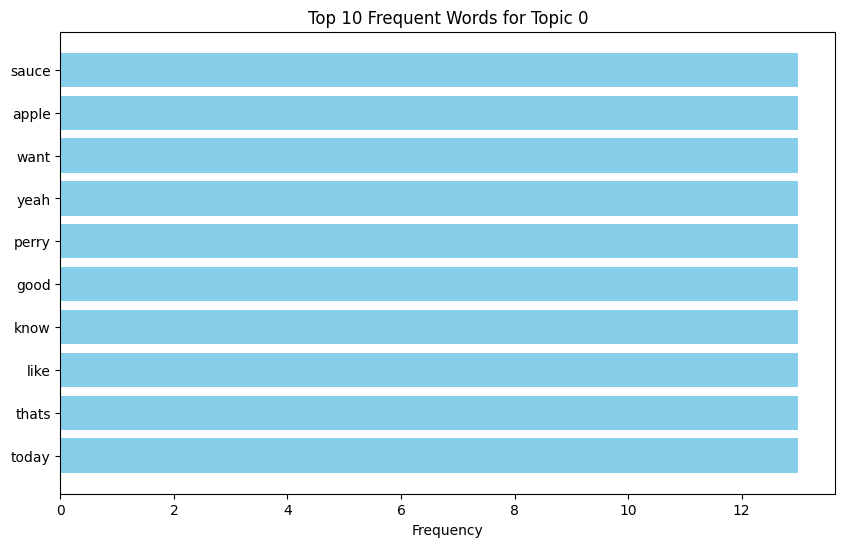

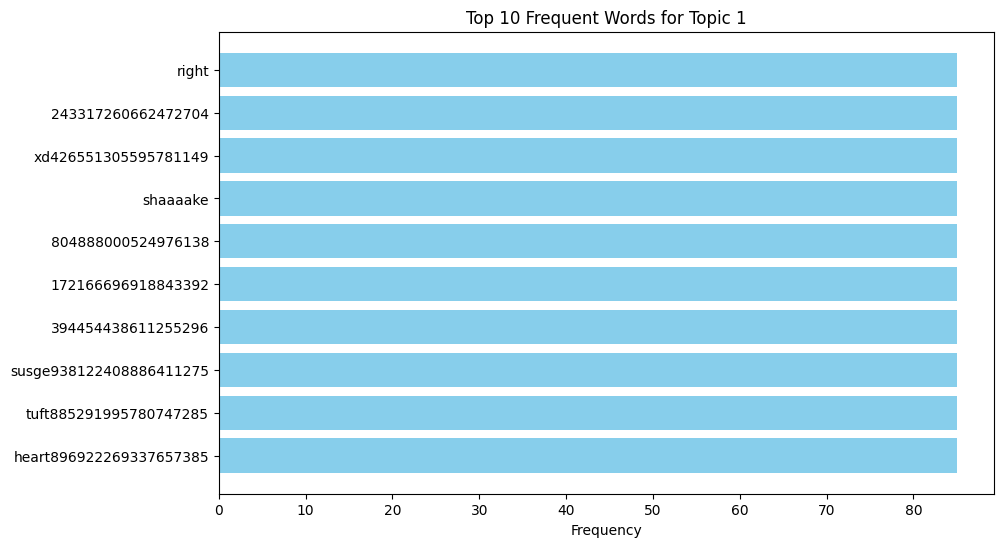

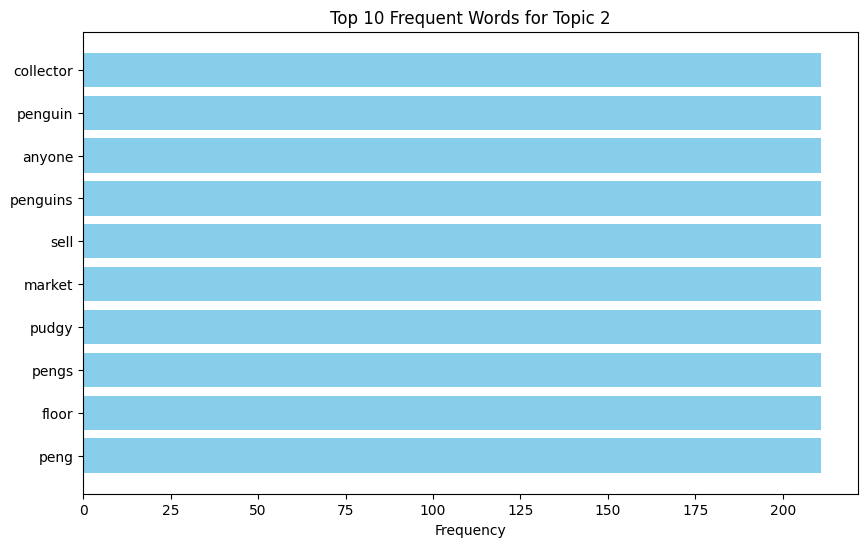

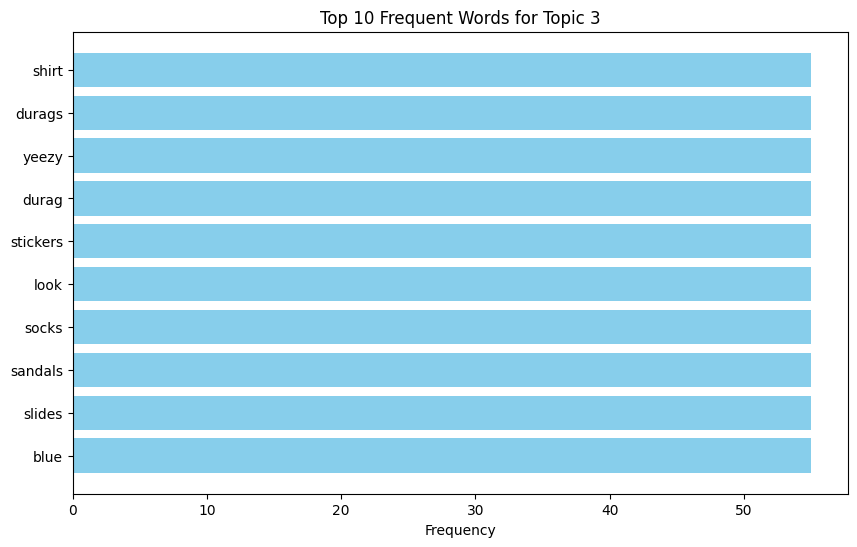

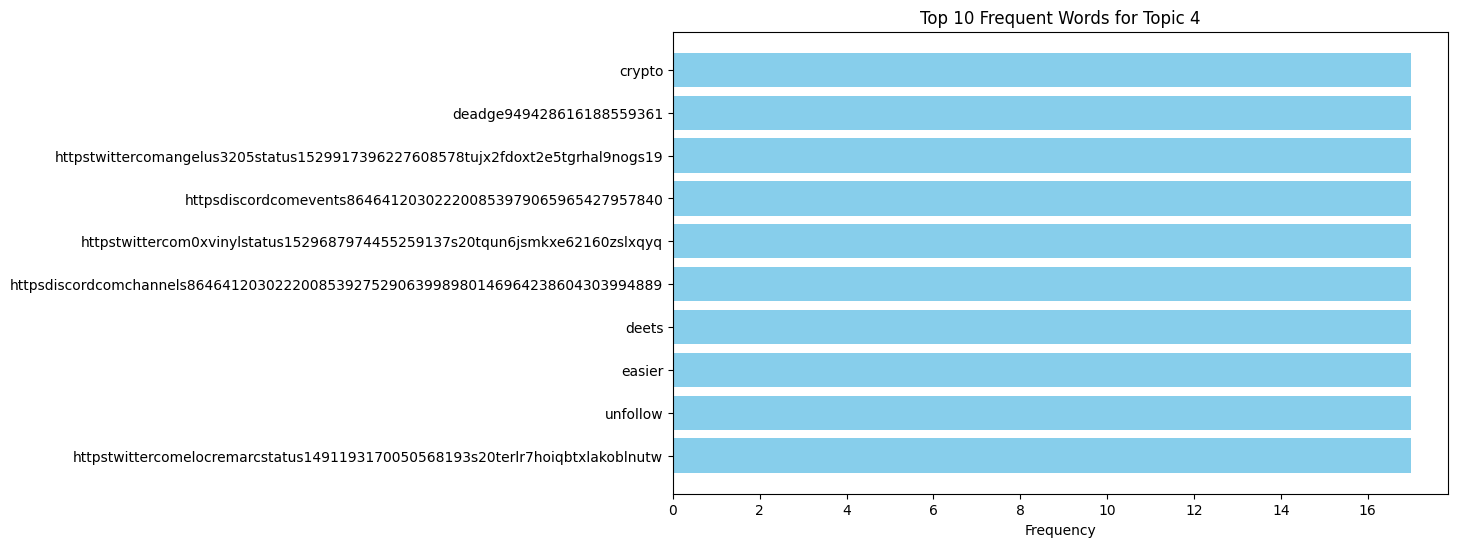

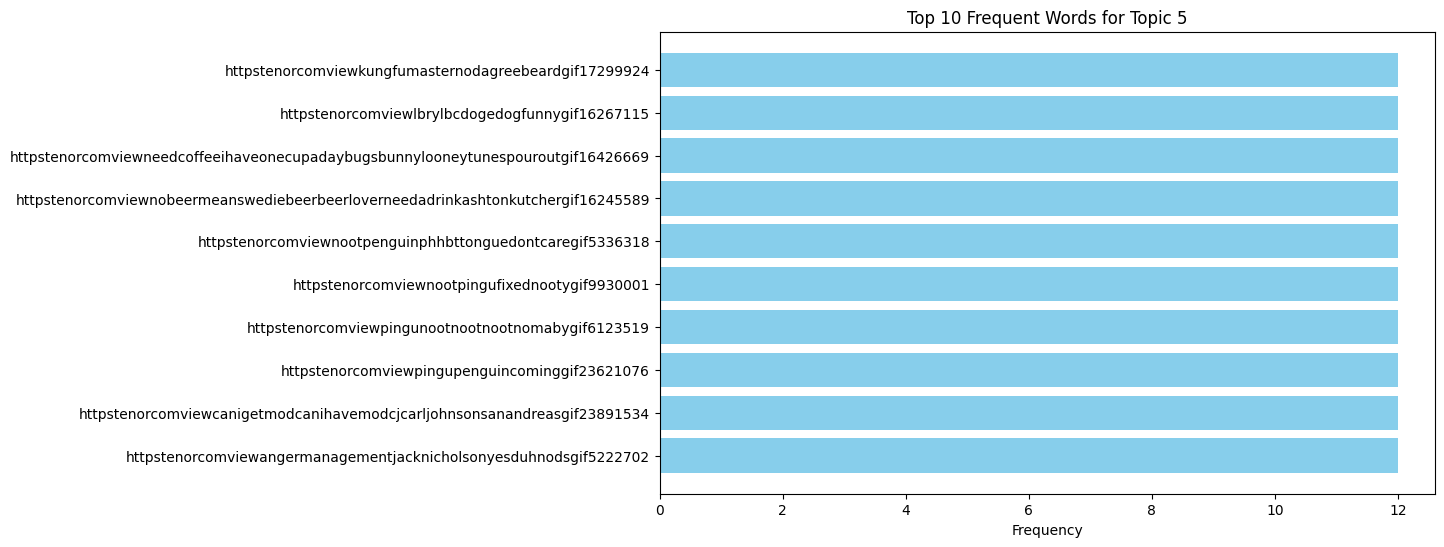

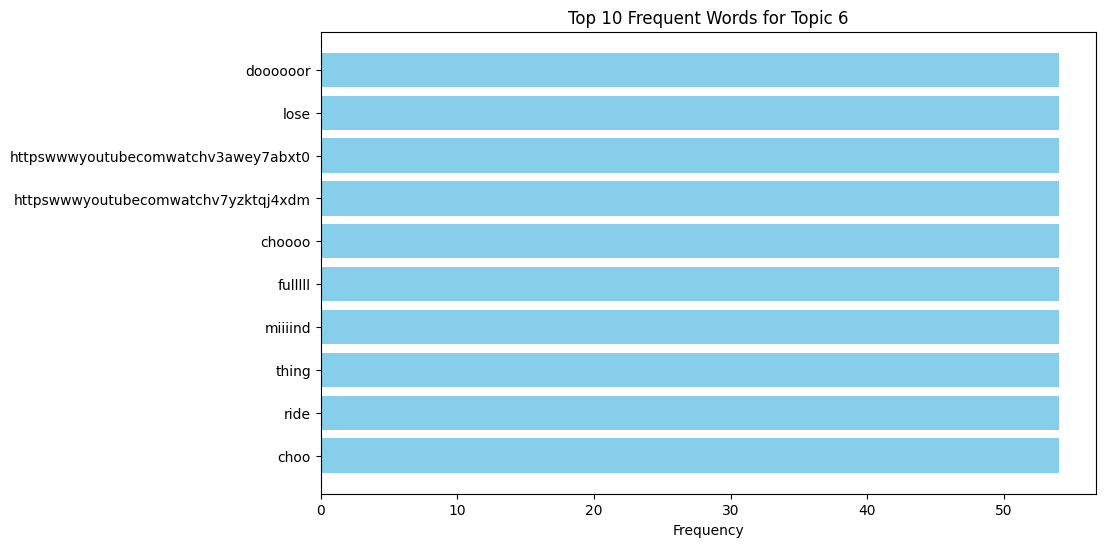

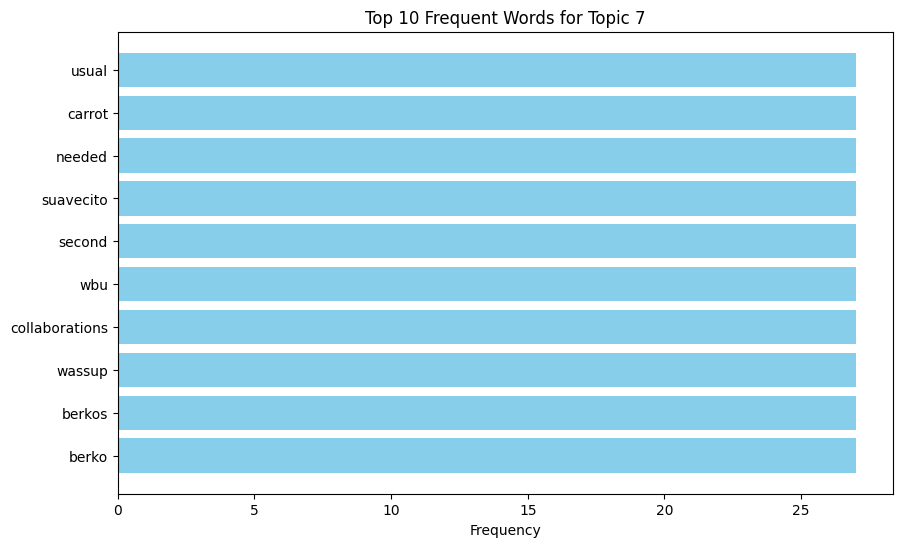

In [ ]:
import pandas as pd
from bertopic import BERTopic
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Filter data based on 'Announcements_Code' condition
filtered_data = data[data['Announcement_Code'] == 'A4001']

filtered_data['Content'] = filtered_data['Content'].astype(str)

# Assuming 'column_name' is the name of the column containing text data in 'filtered_data'
column_name = 'Content'  # Replace with the actual column name

# Extract text data
documents = filtered_data['Content'].tolist()

# Initialize BERTopic model with raw data
model = BERTopic()
topics, _ = model.fit_transform(documents)

# Retrieve and visualize top 10 words for each topic

top_n_topics = 20  # Number of topics to visualize
top_n_words = 10  # Number of top words to display for each topic

topic_freq = model.get_topic_freq()

for topic_id in range(top_n_topics):
    # Check if the topic_id exists in the topic_freq index and if the type is not an integer
    if topic_id in topic_freq.index and not isinstance(topic_freq.loc[topic_id], int):
        top_words = model.get_topic(topic_id)

        # Check if top_words is not empty and is a list of tuples
        if top_words and all(isinstance(t, tuple) for t in top_words):
            words, _ = zip(*top_words)
            words = list(words)[:top_n_words][::-1]

            frequencies = topic_freq.loc[topic_id].head(top_n_words)['Count']

            if isinstance(frequencies, pd.Series):
                frequencies = frequencies.values[::-1]  # Convert to numpy array if it's a Series

            plt.figure(figsize=(10, 6))
            plt.barh(words, frequencies, color='skyblue')
            plt.xlabel('Frequency')
            plt.title(f'Top {top_n_words} Frequent Words for Topic {topic_id}')
            plt.gca().invert_yaxis()
            plt.show()


In [ ]:
import pandas as pd
# Assuming 'model' and 'topic_freq' are already defined from your previous code
# Assuming 'top_n_topics', 'top_n_words', and 'filtered_data' are defined

# Initialize BERTopic model with desired parameters
model = BERTopic(top_n_words=10, nr_topics=20, n_gram_range=(1, 1))

# Fit the model on the 'Content' column of the filtered DataFrame
topics, _ = model.fit_transform(filtered_data['Content'].tolist())

# Add the BERTopic results to the filtered DataFrame
filtered_data['topic'] = topics

# Adjust the display settings to show more characters
pd.set_option('display.max_colwidth', None)

# Assuming 'model' and 'topic_freq' are already defined from your previous code
# Assuming 'top_n_topics', 'top_n_words', and 'filtered_data' are defined

# Initialize an empty list to store top words and content data
top_words_data = []

for topic_id in range(top_n_topics):
    if topic_id in topic_freq.index and not isinstance(topic_freq.loc[topic_id], int):
        top_words = model.get_topic(topic_id)

        # Ensure that top_words is a list of tuples before iterating
        if isinstance(top_words, list) and all(isinstance(item, tuple) for item in top_words):
            words_list = [word for word, _ in top_words]
            top_words_data.append((f"Topic {topic_id}", ", ".join(words_list[:top_n_words])))

            # Get the top 5 content subsequent to the top words for the current topic
            content_subsequent = filtered_data[filtered_data['topic'] == topic_id]['Content'].head(5).tolist()
            top_words_data[-1] += (", ".join(content_subsequent),)  # Append the content to the tuple
        else:
            top_words_data.append((f"Topic {topic_id}", "", ""))  # Add an empty string for unexpected data types

# Create a DataFrame with "Index Topic", "10 Freq Words", and "Top 5 Content" columns
top_words_df = pd.DataFrame(top_words_data, columns=["Index Topic", "10 Freq Words", "Top 5 Content"])

# Print the DataFrame
print(top_words_df)



  Index Topic  \
0     Topic 0   
1     Topic 1   
2     Topic 2   
3     Topic 3   
4     Topic 4   
5     Topic 5   
6     Topic 6   
7     Topic 7   
8     Topic 8   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            10 Freq Words  \
0                                                                                                                                                                                                               

In [ ]:
import pandas as pd
import os
import zipfile

# Function to save top words and content for a specific announcement code
def save_top_words_and_content(announcement_code, top_n_topics, top_n_words):
    # Assuming 'model' and 'topic_freq' are already defined from your previous code
    # Assuming 'filtered_data' is defined and contains the 'Announcements_Code' column

    # Filter data based on 'Announcements_Code' condition
    filtered_data = data[data['Announcement_Code'] == announcement_code]

    # Initialize BERTopic model with desired parameters
    model = BERTopic(top_n_words=10, nr_topics=20, n_gram_range=(1, 1))

    filtered_data['Content'] = filtered_data['Content'].astype(str)

    # Fit the model on the 'Content' column of the filtered DataFrame
    topics, _ = model.fit_transform(filtered_data['Content'].tolist())

    # Add the BERTopic results to the filtered DataFrame
    filtered_data['topic'] = topics

    # Initialize an empty list to store top words and content data
    top_words_data = []

    for topic_id in range(top_n_topics):
        if topic_id in topic_freq.index and not isinstance(topic_freq.loc[topic_id], int):
            top_words = model.get_topic(topic_id)

            # Ensure that top_words is a list of tuples before iterating
            if isinstance(top_words, list) and all(isinstance(item, tuple) for item in top_words):
                words_list = [word for word, _ in top_words]
                top_words_data.append((f"Topic {topic_id}", ", ".join(words_list[:top_n_words])))

                # Get the top 5 content subsequent to the top words for the current topic
                content_subsequent = filtered_data[filtered_data['topic'] == topic_id]['Content'].head(5).tolist()
                top_words_data[-1] += (", ".join(content_subsequent),)  # Append the content to the tuple
            else:
                top_words_data.append((f"Topic {topic_id}", "", ""))  # Add an empty string for unexpected data types

    # Create a DataFrame with "Index Topic", "10 Freq Words", and "Top 5 Content" columns
    top_words_df = pd.DataFrame(top_words_data, columns=["Index Topic", "10 Freq Words", "Top 5 Content"])

    # Save the DataFrame to a CSV file
    csv_file_path = f'{announcement_code}_top_words_results.csv'
    top_words_df.to_csv(csv_file_path, index=False)

    # Display the CSV file path
    print(f'Top 10 words data saved to: {csv_file_path}')

    return csv_file_path

# Assuming 'data' is your DataFrame containing 'Announcements_Code'
announcement_codes = data['Announcement_Code'].unique()

# Create a zip folder to store all CSV files
zip_folder_path = 'announcement_codes_data_4.zip'
with zipfile.ZipFile(zip_folder_path, 'w') as zip_folder:
    for code in announcement_codes:
        csv_file_path = save_top_words_and_content(code, top_n_topics, top_n_words)
        zip_folder.write(csv_file_path, os.path.basename(csv_file_path))

# Display the zip folder path
print(f'All data saved to: {zip_folder_path}')


Top 10 words data saved to: A4001_top_words_results.csv
Top 10 words data saved to: A4002_top_words_results.csv
Top 10 words data saved to: A4004_top_words_results.csv
Top 10 words data saved to: A4005_top_words_results.csv
Top 10 words data saved to: A4006_top_words_results.csv
Top 10 words data saved to: A4007_top_words_results.csv
Top 10 words data saved to: A4008_top_words_results.csv
Top 10 words data saved to: A4009_top_words_results.csv
Top 10 words data saved to: A4010_top_words_results.csv
Top 10 words data saved to: A4011_top_words_results.csv
Top 10 words data saved to: A4012_top_words_results.csv
Top 10 words data saved to: A4013_top_words_results.csv
Top 10 words data saved to: A4014_top_words_results.csv
Top 10 words data saved to: A4015_top_words_results.csv
Top 10 words data saved to: A4016_top_words_results.csv
Top 10 words data saved to: A4017_top_words_results.csv
Top 10 words data saved to: A4018_top_words_results.csv
Top 10 words data saved to: A4019_top_words_resu

In [ ]:
from google.colab import files

# Choose the Excel file from your local system to upload
uploaded = files.upload()

Saving Bertopic_Phase5.xlsx to Bertopic_Phase5.xlsx


In [ ]:
import pandas as pd

# Assuming the name of your uploaded excel file
file_name = 'Bertopic_Phase5.xlsx'

# Read the uploaded excel file
data = pd.read_excel(file_name)

# Display the contents of the excel file
print(data)


      Phase_Code       Date Announcement_Code  \
0             P5 2023-02-08             A5001   
1             P5 2023-02-08             A5001   
2             P5 2023-02-08             A5001   
3             P5 2023-02-08             A5001   
4             P5 2023-02-08             A5001   
...          ...        ...               ...   
21157         P5 2024-01-27             A5037   
21158         P5 2024-01-27             A5037   
21159         P5 2024-01-27             A5037   
21160         P5 2024-01-27             A5037   
21161         P5 2024-01-27             A5037   

                                                                                              Content  
0                                                                                                pudg  
1                                                                                    live dangerously  
2                                                                               like forbidden thin

In [ ]:
from bertopic import BERTopic
import pandas as pd

# Load your DataFrame, replace 'your_data.csv' with the actual file path or URL
data = pd.read_excel('Bertopic_Phase5.xlsx')

# Assuming 'data' is your DataFrame
# Filter data based on 'Announcements_Code' condition
filtered_data = data[data['Announcement_Code'] == 'A5001']

filtered_data['Content'] = filtered_data['Content'].astype(str)

# Initialize BERTopic model with desired parameters
model = BERTopic(top_n_words=5, nr_topics=10, n_gram_range=(1, 1))

# Fit the model on the filtered 'Content' column
topics, _ = model.fit_transform(filtered_data['Content'])

# Add the BERTopic results to the filtered DataFrame
filtered_data['topic'] = topics

# Display the DataFrame with BERTopic results
print(filtered_data)


    Phase_Code       Date Announcement_Code  \
0           P5 2023-02-08             A5001   
1           P5 2023-02-08             A5001   
2           P5 2023-02-08             A5001   
3           P5 2023-02-08             A5001   
4           P5 2023-02-08             A5001   
..         ...        ...               ...   
292         P5 2023-02-08             A5001   
293         P5 2023-02-08             A5001   
294         P5 2023-02-08             A5001   
295         P5 2023-02-08             A5001   
296         P5 2023-02-08             A5001   

                                                               Content  topic  
0                                                                 pudg     -1  
1                                                     live dangerously      1  
2                                                like forbidden things      1  
3                                                      forbidden fruit      1  
4    PinguBusiness11017967106882273

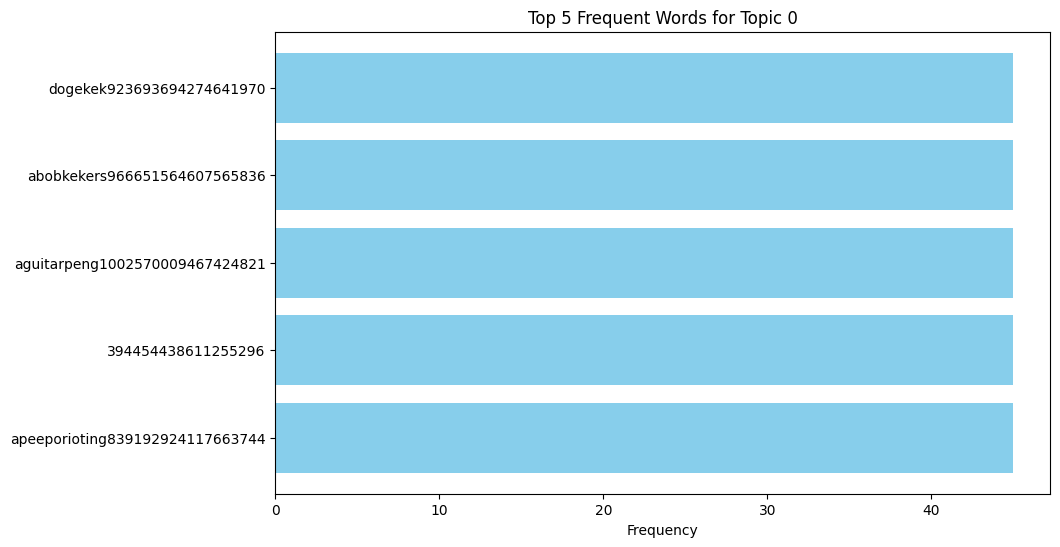

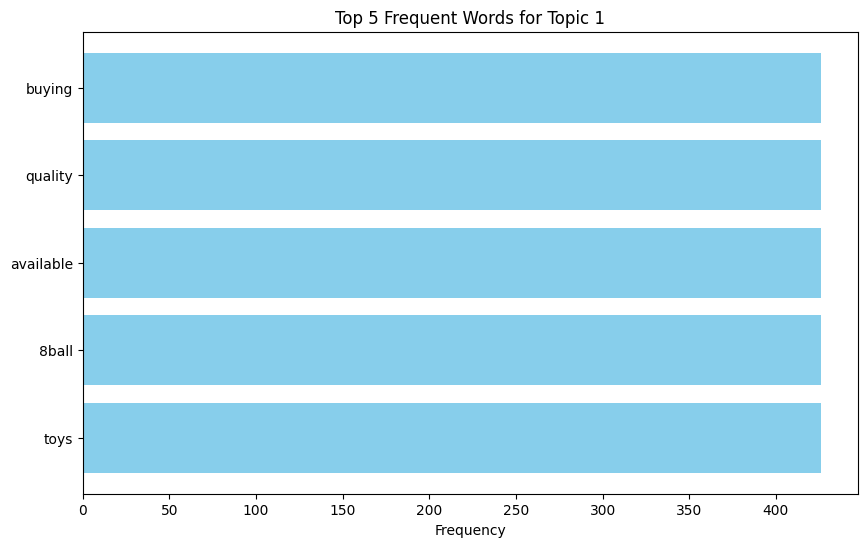

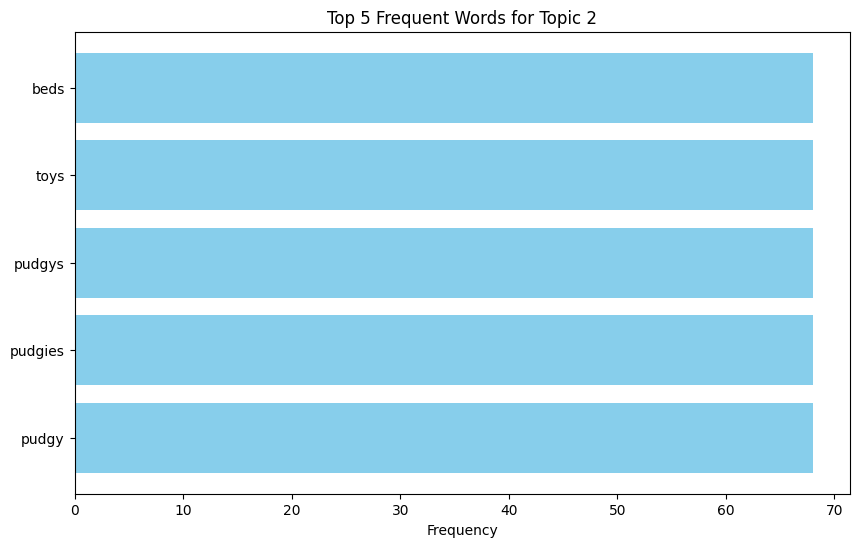

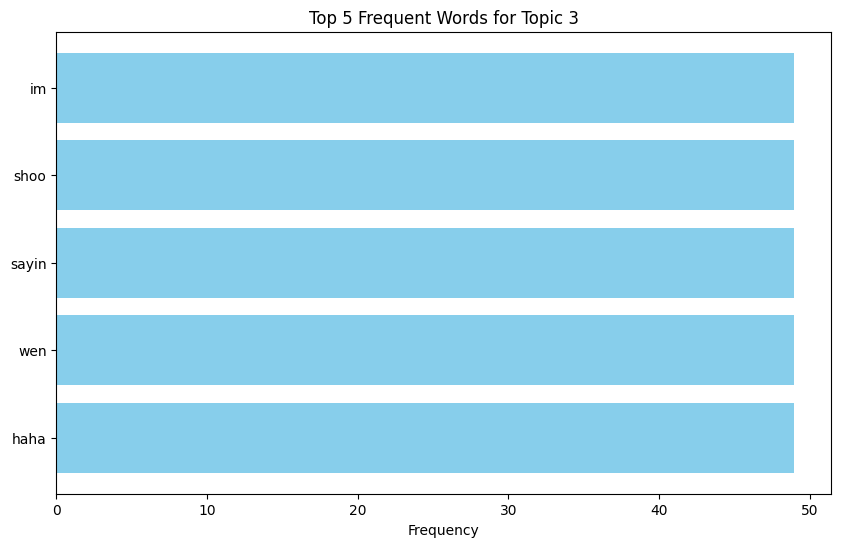

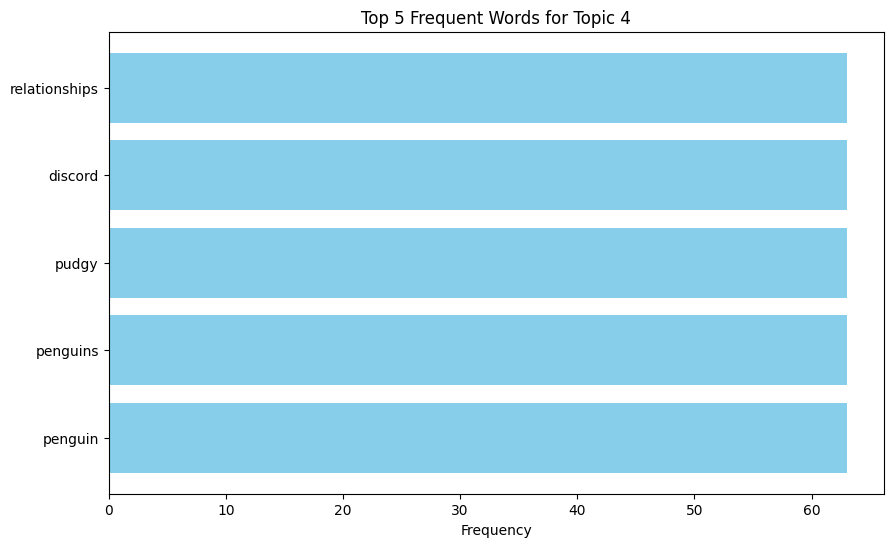

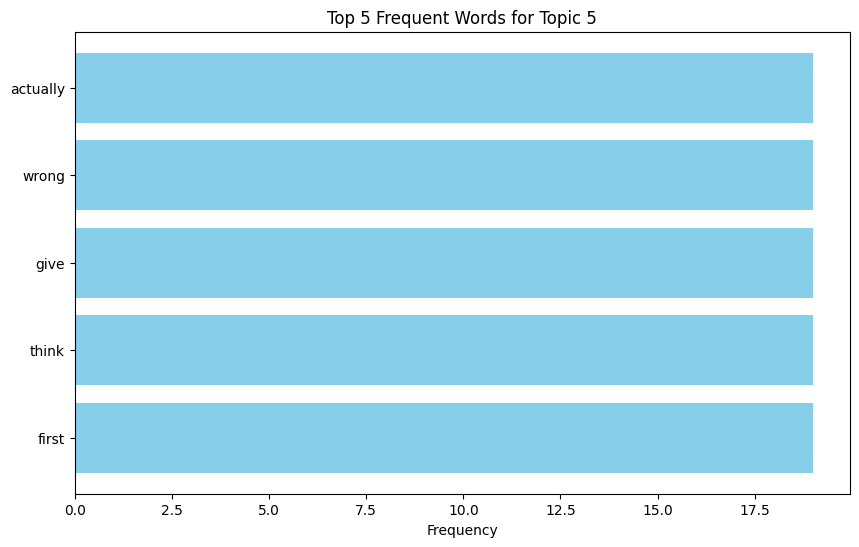

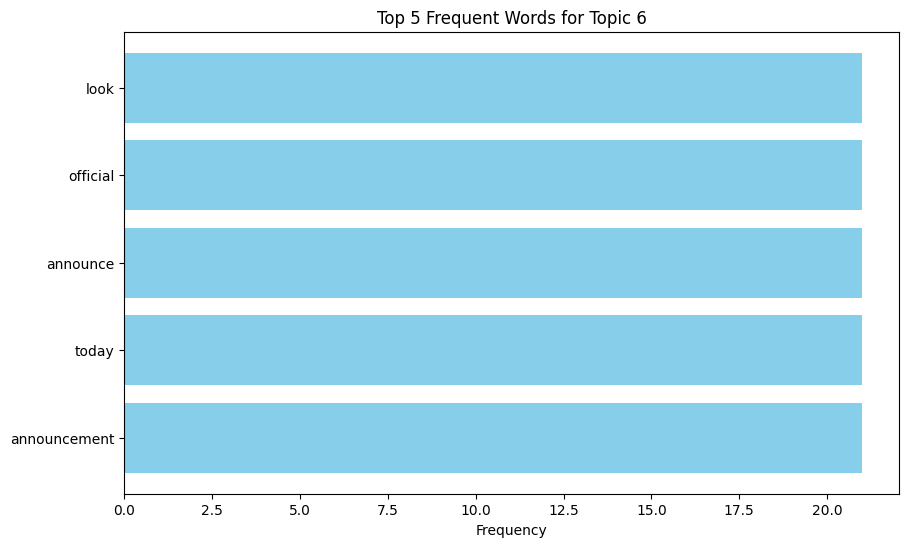

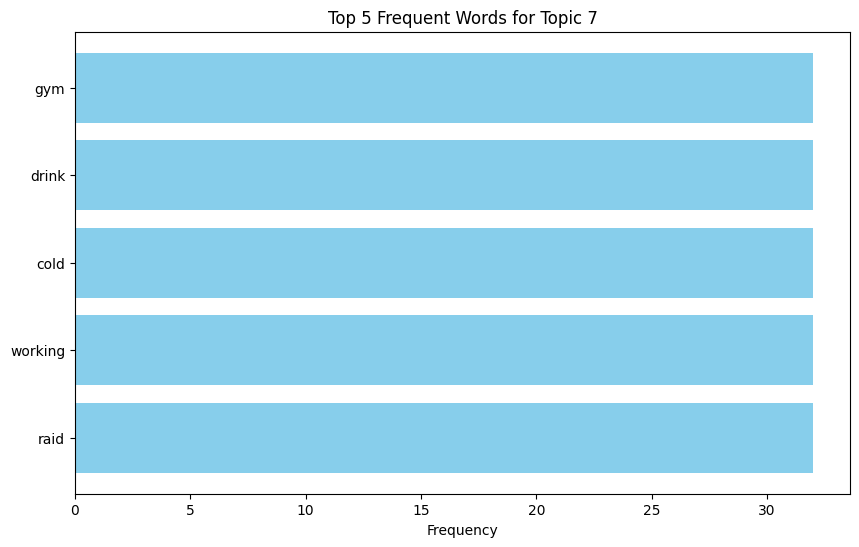

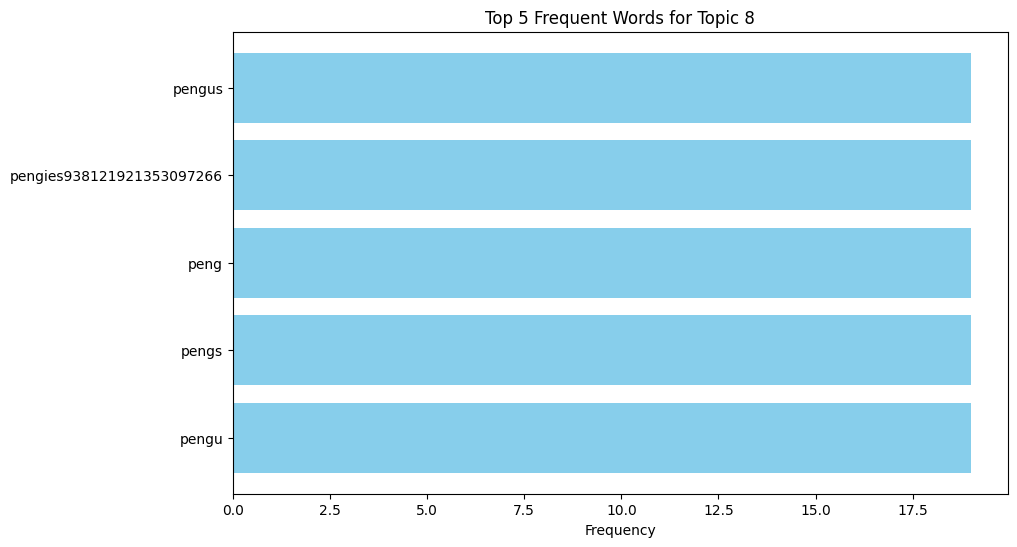

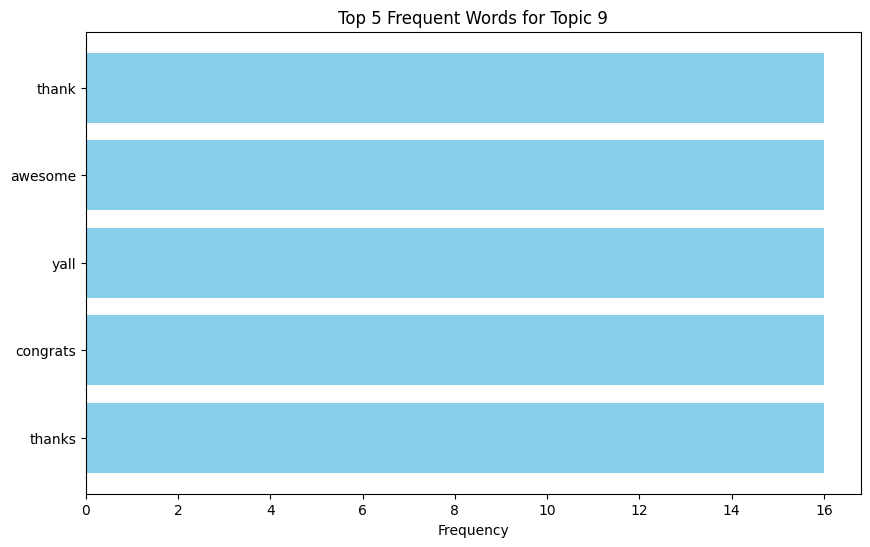

In [ ]:
import pandas as pd
from bertopic import BERTopic
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Filter data based on 'Announcements_Code' condition
filtered_data = data[data['Announcement_Code'] == 'A5017']

filtered_data['Content'] = filtered_data['Content'].astype(str)

# Assuming 'column_name' is the name of the column containing text data in 'filtered_data'
column_name = 'Content'  # Replace with the actual column name

# Extract text data
documents = filtered_data['Content'].tolist()

# Initialize BERTopic model with raw data
model = BERTopic()
topics, _ = model.fit_transform(documents)

# Retrieve and visualize top 10 words for each topic

top_n_topics = 10  # Number of topics to visualize
top_n_words = 5  # Number of top words to display for each topic

topic_freq = model.get_topic_freq()

for topic_id in range(top_n_topics):
    # Check if the topic_id exists in the topic_freq index and if the type is not an integer
    if topic_id in topic_freq.index and not isinstance(topic_freq.loc[topic_id], int):
        top_words = model.get_topic(topic_id)

        # Check if top_words is not empty and is a list of tuples
        if top_words and all(isinstance(t, tuple) for t in top_words):
            words, _ = zip(*top_words)
            words = list(words)[:top_n_words][::-1]

            frequencies = topic_freq.loc[topic_id].head(top_n_words)['Count']

            if isinstance(frequencies, pd.Series):
                frequencies = frequencies.values[::-1]  # Convert to numpy array if it's a Series

            plt.figure(figsize=(10, 6))
            plt.barh(words, frequencies, color='skyblue')
            plt.xlabel('Frequency')
            plt.title(f'Top {top_n_words} Frequent Words for Topic {topic_id}')
            plt.gca().invert_yaxis()
            plt.show()


In [ ]:
import pandas as pd
# Assuming 'model' and 'topic_freq' are already defined from your previous code
# Assuming 'top_n_topics', 'top_n_words', and 'filtered_data' are defined

# Initialize BERTopic model with desired parameters
model = BERTopic(top_n_words=5, nr_topics=10, n_gram_range=(1, 1))

# Fit the model on the 'Content' column of the filtered DataFrame
topics, _ = model.fit_transform(filtered_data['Content'].tolist())

# Add the BERTopic results to the filtered DataFrame
filtered_data['topic'] = topics

# Adjust the display settings to show more characters
pd.set_option('display.max_colwidth', None)

# Assuming 'model' and 'topic_freq' are already defined from your previous code
# Assuming 'top_n_topics', 'top_n_words', and 'filtered_data' are defined

# Initialize an empty list to store top words and content data
top_words_data = []

for topic_id in range(top_n_topics):
    if topic_id in topic_freq.index and not isinstance(topic_freq.loc[topic_id], int):
        top_words = model.get_topic(topic_id)

        # Ensure that top_words is a list of tuples before iterating
        if isinstance(top_words, list) and all(isinstance(item, tuple) for item in top_words):
            words_list = [word for word, _ in top_words]
            top_words_data.append((f"Topic {topic_id}", ", ".join(words_list[:top_n_words])))

            # Get the top 5 content subsequent to the top words for the current topic
            content_subsequent = filtered_data[filtered_data['topic'] == topic_id]['Content'].head(5).tolist()
            top_words_data[-1] += (", ".join(content_subsequent),)  # Append the content to the tuple
        else:
            top_words_data.append((f"Topic {topic_id}", "", ""))  # Add an empty string for unexpected data types

# Create a DataFrame with "Index Topic", "5 Freq Words", and "Top 5 Content" columns
top_words_df = pd.DataFrame(top_words_data, columns=["Index Topic", "5 Freq Words", "Top 5 Content"])

# Print the DataFrame
print(top_words_df)



  Index Topic  \
0     Topic 0   
1     Topic 1   
2     Topic 2   
3     Topic 3   
4     Topic 4   
5     Topic 5   
6     Topic 6   
7     Topic 7   
8     Topic 8   
9     Topic 9   

                                                                                                                                   5 Freq Words  \
0                                                                                                      announcement, today, lils, thanks, thats   
1                                                                                                        toys, pudgy, penguins, penguin, amazon   
2  apeeporioting839192924117663744, 394454438611255296, aguitarpeng1002570009467424821, abobkekers966651564607565836, dogekek923693694274641970   
3                                                                                                            amazon, sold, trading, bought, buy   
4                                                                            

In [ ]:
import pandas as pd
import os
import zipfile

# Function to save top words and content for a specific announcement code
def save_top_words_and_content(announcement_code, top_n_topics, top_n_words):
    # Assuming 'model' and 'topic_freq' are already defined from your previous code
    # Assuming 'filtered_data' is defined and contains the 'Announcements_Code' column

    # Filter data based on 'Announcements_Code' condition
    filtered_data = data[data['Announcement_Code'] == announcement_code]

    # Initialize BERTopic model with desired parameters
    model = BERTopic(top_n_words=5, nr_topics=10, n_gram_range=(1, 1))

    filtered_data['Content'] = filtered_data['Content'].astype(str)

    # Fit the model on the 'Content' column of the filtered DataFrame
    topics, _ = model.fit_transform(filtered_data['Content'].tolist())

    # Add the BERTopic results to the filtered DataFrame
    filtered_data['topic'] = topics

    # Initialize an empty list to store top words and content data
    top_words_data = []

    for topic_id in range(top_n_topics):
        if topic_id in topic_freq.index and not isinstance(topic_freq.loc[topic_id], int):
            top_words = model.get_topic(topic_id)

            # Ensure that top_words is a list of tuples before iterating
            if isinstance(top_words, list) and all(isinstance(item, tuple) for item in top_words):
                words_list = [word for word, _ in top_words]
                top_words_data.append((f"Topic {topic_id}", ", ".join(words_list[:top_n_words])))

                # Get the top 5 content subsequent to the top words for the current topic
                content_subsequent = filtered_data[filtered_data['topic'] == topic_id]['Content'].head(5).tolist()
                top_words_data[-1] += (", ".join(content_subsequent),)  # Append the content to the tuple
            else:
                top_words_data.append((f"Topic {topic_id}", "", ""))  # Add an empty string for unexpected data types

    # Create a DataFrame with "Index Topic", "5 Freq Words", and "Top 5 Content" columns
    top_words_df = pd.DataFrame(top_words_data, columns=["Index Topic", "5 Freq Words", "Top 5 Content"])

    # Save the DataFrame to a CSV file
    csv_file_path = f'{announcement_code}_top_words_results.csv'
    top_words_df.to_csv(csv_file_path, index=False)

    # Display the CSV file path
    print(f'Top 5 words data saved to: {csv_file_path}')

    return csv_file_path

# Assuming 'data' is your DataFrame containing 'Announcements_Code'
announcement_codes = data['Announcement_Code'].unique()

# Create a zip folder to store all CSV files
zip_folder_path = 'announcement_codes_data_5.zip'
with zipfile.ZipFile(zip_folder_path, 'w') as zip_folder:
    for code in announcement_codes:
        csv_file_path = save_top_words_and_content(code, top_n_topics, top_n_words)
        zip_folder.write(csv_file_path, os.path.basename(csv_file_path))

# Display the zip folder path
print(f'All data saved to: {zip_folder_path}')


Top 5 words data saved to: A5001_top_words_results.csv
Top 5 words data saved to: A5002_top_words_results.csv
Top 5 words data saved to: A5003_top_words_results.csv
Top 5 words data saved to: A5004_top_words_results.csv
Top 5 words data saved to: A5005_top_words_results.csv
Top 5 words data saved to: A5006_top_words_results.csv
Top 5 words data saved to: A5007_top_words_results.csv
Top 5 words data saved to: A5008_top_words_results.csv
Top 5 words data saved to: A5009_top_words_results.csv
Top 5 words data saved to: A5010_top_words_results.csv
Top 5 words data saved to: A5011_top_words_results.csv
Top 5 words data saved to: A5012_top_words_results.csv
Top 5 words data saved to: A5013_top_words_results.csv
Top 5 words data saved to: A5014_top_words_results.csv
Top 5 words data saved to: A5015_top_words_results.csv
Top 5 words data saved to: A5016_top_words_results.csv
Top 5 words data saved to: A5017_top_words_results.csv
Top 5 words data saved to: A5018_top_words_results.csv
Top 5 word